In [37]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [71]:
df=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/heart%20disease%20classification%20dataset.csv')
df.head()

Unnamed: 0  age     sex  cp  trestbps   chol  fbs  restecg  thalach  exang  \
0           0   63    male   3     145.0  233.0    1        0    150.0      0   
1           1   37    male   2     130.0  250.0    0        1    187.0      0   
2           2   41  female   1     130.0  204.0    0        0    172.0      0   
3           3   56    male   1     120.0  236.0    0        1    178.0      0   
4           4   57  female   0       NaN  354.0    0        1    163.0      1   

   oldpeak  slope  ca  thal target  
0      2.3      0   0     1    yes  
1      3.5      0   0     2    yes  
2      1.4      2   0     2    yes  
3      0.8      2   0     2    yes  
4      0.6      2   0     2    yes

In [72]:
df.shape

(303, 15)

In [73]:
df.isnull().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      4
chol          1
fbs           0
restecg       0
thalach       5
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    object 
 3   cp          303 non-null    int64  
 4   trestbps    299 non-null    float64
 5   chol        302 non-null    float64
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     298 non-null    float64
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    object 
dtypes: float64(4), int64(9), object(2)
memory usage: 35.6+ KB


In [75]:
df.dtypes

Unnamed: 0      int64
age             int64
sex            object
cp              int64
trestbps      float64
chol          float64
fbs             int64
restecg         int64
thalach       float64
exang           int64
oldpeak       float64
slope           int64
ca              int64
thal            int64
target         object
dtype: object

In [76]:
df.describe()

Unnamed: 0         age          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  299.000000  302.000000  303.000000   
mean   151.000000   54.366337    0.966997  131.712375  246.317881    0.148515   
std     87.612784    9.082101    1.032052   17.629032   51.908285    0.356198   
min      0.000000   29.000000    0.000000   94.000000  126.000000    0.000000   
25%     75.500000   47.500000    0.000000  120.000000  211.000000    0.000000   
50%    151.000000   55.000000    1.000000  130.000000  240.500000    0.000000   
75%    226.500000   61.000000    2.000000  140.000000  274.750000    0.000000   
max    302.000000   77.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  298.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.865772    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.563687    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  134.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  152.500000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal  
count  303.000000  
mean     2.313531  
std      0.612277  
min      0.000000  
25%      2.000000  
50%      2.000000  
75%      3.000000  
max      3.000000

In [77]:
df.corr().describe().T

count      mean       std       min       25%       50%       75%  \
Unnamed: 0   13.0  0.117263  0.375699 -0.399163 -0.021130  0.103337  0.298161   
age          13.0  0.130820  0.327678 -0.396302 -0.068653  0.121308  0.213465   
cp           13.0  0.013551  0.356241 -0.399163 -0.161736 -0.068653  0.094444   
trestbps     13.0  0.145776  0.280745 -0.121380  0.048142  0.098499  0.175885   
chol         13.0  0.108425  0.282945 -0.150330 -0.003027  0.053098  0.098328   
fbs          13.0  0.107703  0.279191 -0.084189  0.000743  0.012865  0.121308   
restecg      13.0  0.036808  0.297792 -0.150330 -0.084189 -0.058770  0.037393   
thalach      13.0 -0.013863  0.395896 -0.396302 -0.346806 -0.029729  0.037393   
exang        13.0  0.085734  0.362772 -0.396211 -0.070733  0.070183  0.206754   
oldpeak      13.0  0.103819  0.375246 -0.577537 -0.058770  0.193827  0.222682   
slope        13.0 -0.004329  0.377313 -0.577537 -0.168814 -0.080155  0.093045   
ca           13.0  0.147431  0.309548 -0.208967 -0.072042  0.115739  0.222682   
thal         13.0  0.125837  0.294112 -0.161736 -0.032019  0.068001  0.206754   

            max  
Unnamed: 0  1.0  
age         1.0  
cp          1.0  
trestbps    1.0  
chol        1.0  
fbs         1.0  
restecg     1.0  
thalach     1.0  
exang       1.0  
oldpeak     1.0  
slope       1.0  
ca          1.0  
thal        1.0

In [78]:
df.mean()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Unnamed: 0    151.000000
age            54.366337
cp              0.966997
trestbps      131.712375
chol          246.317881
fbs             0.148515
restecg         0.528053
thalach       149.865772
exang           0.326733
oldpeak         1.039604
slope           1.399340
ca              0.729373
thal            2.313531
dtype: float64

In [79]:
df.min()

Unnamed: 0         0
age               29
sex           female
cp                 0
trestbps        94.0
chol           126.0
fbs                0
restecg            0
thalach         71.0
exang              0
oldpeak          0.0
slope              0
ca                 0
thal               0
target            no
dtype: object

In [80]:
df.max()

Unnamed: 0      302
age              77
sex            male
cp                3
trestbps      200.0
chol          564.0
fbs               1
restecg           2
thalach       202.0
exang             1
oldpeak         6.2
slope             2
ca                4
thal              3
target          yes
dtype: object

In [81]:
df.skew()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Unnamed: 0    0.000000
age          -0.202463
cp            0.484732
trestbps      0.699043
chol          1.139061
fbs           1.986652
restecg       0.162522
thalach      -0.501018
exang         0.742532
oldpeak       1.269720
slope        -0.508316
ca            1.310422
thal         -0.476722
dtype: float64

In [82]:
df.columns

Index(['Unnamed: 0', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [83]:
for i  in df.columns:
    print(f'unique values in column "{i}" is\n {df[i].value_counts()}')
    print('-------------------------------------------------')

unique values in column "Unnamed: 0" is
 0      1
208    1
206    1
205    1
204    1
      ..
100    1
99     1
98     1
97     1
302    1
Name: Unnamed: 0, Length: 303, dtype: int64
-------------------------------------------------
unique values in column "age" is
 58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64
-------------------------------------------------
unique values in column "sex" is
 male      207
female     96
Name: sex, dtype: int64
-------------------------------------------------
unique values in column "cp" is
 0    143
2     87
1     50
3     23
Name: cp, dtype: int64
-------------------------------------------------
unique valu

In [84]:
object_col=[]
num_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        object_col.append(i)
    else:
        num_col.append(i)

In [85]:
object_col

['sex', 'target']

In [86]:
num_col

['Unnamed: 0',
 'age',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [87]:
df.head()

Unnamed: 0  age     sex  cp  trestbps   chol  fbs  restecg  thalach  exang  \
0           0   63    male   3     145.0  233.0    1        0    150.0      0   
1           1   37    male   2     130.0  250.0    0        1    187.0      0   
2           2   41  female   1     130.0  204.0    0        0    172.0      0   
3           3   56    male   1     120.0  236.0    0        1    178.0      0   
4           4   57  female   0       NaN  354.0    0        1    163.0      1   

   oldpeak  slope  ca  thal target  
0      2.3      0   0     1    yes  
1      3.5      0   0     2    yes  
2      1.4      2   0     2    yes  
3      0.8      2   0     2    yes  
4      0.6      2   0     2    yes

In [88]:
le=LabelEncoder()

In [89]:
df.columns

Index(['Unnamed: 0', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [90]:
df_col=('sex','target')


In [91]:
for i in df_col:
    df[i]=le.fit_transform(df[i])

In [92]:
df.head()

Unnamed: 0  age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  \
0           0   63    1   3     145.0  233.0    1        0    150.0      0   
1           1   37    1   2     130.0  250.0    0        1    187.0      0   
2           2   41    0   1     130.0  204.0    0        0    172.0      0   
3           3   56    1   1     120.0  236.0    0        1    178.0      0   
4           4   57    0   0       NaN  354.0    0        1    163.0      1   

   oldpeak  slope  ca  thal  target  
0      2.3      0   0     1       1  
1      3.5      0   0     2       1  
2      1.4      2   0     2       1  
3      0.8      2   0     2       1  
4      0.6      2   0     2       1

In [93]:
df=df.drop(['Unnamed: 0'],axis='columns')

In [94]:
df.head()

age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   63    1   3     145.0  233.0    1        0    150.0      0      2.3   
1   37    1   2     130.0  250.0    0        1    187.0      0      3.5   
2   41    0   1     130.0  204.0    0        0    172.0      0      1.4   
3   56    1   1     120.0  236.0    0        1    178.0      0      0.8   
4   57    0   0       NaN  354.0    0        1    163.0      1      0.6   

   slope  ca  thal  target  
0      0   0     1       1  
1      0   0     2       1  
2      2   0     2       1  
3      2   0     2       1  
4      2   0     2       1

In [95]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [96]:
df=df.fillna(0)

In [97]:
df.dtypes

age           int64
sex           int32
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int32
dtype: object

In [66]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

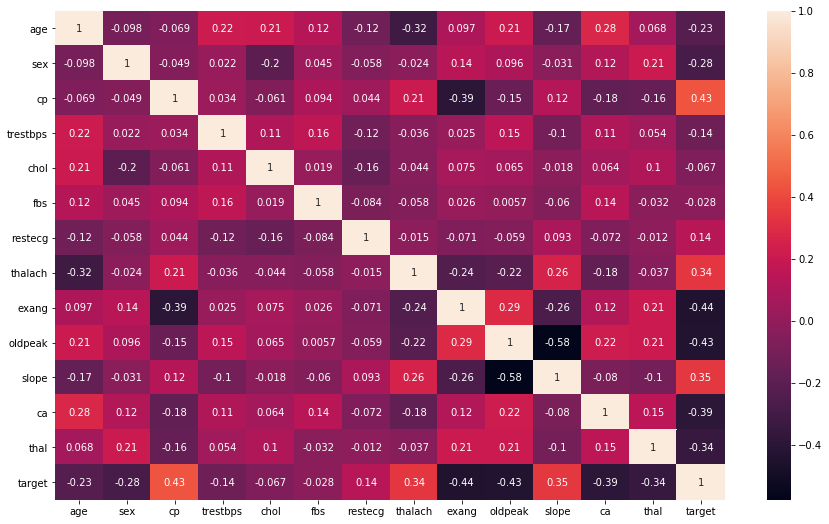

In [99]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

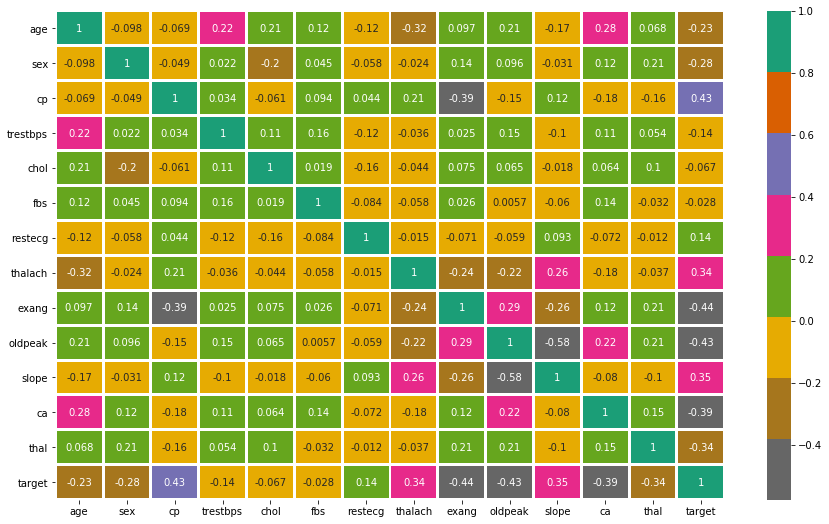

In [100]:
plt.figure(figsize=(15,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

In [101]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

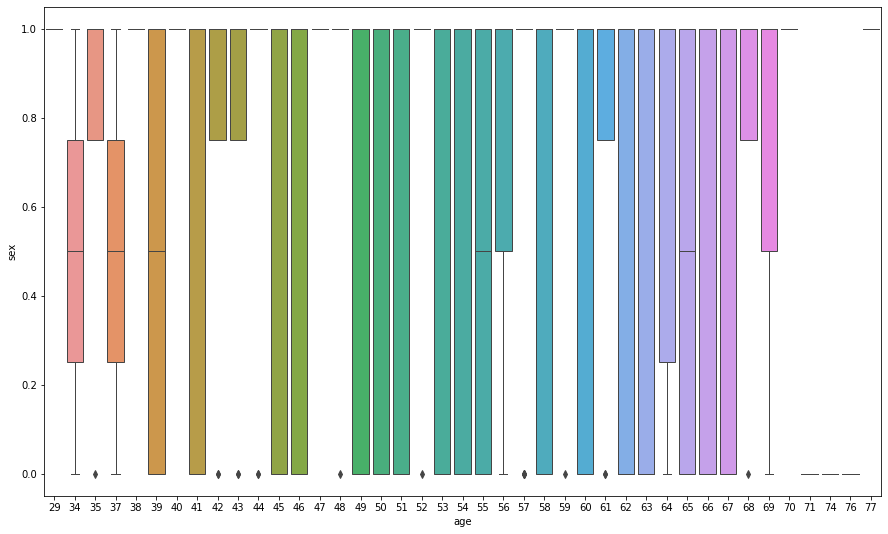

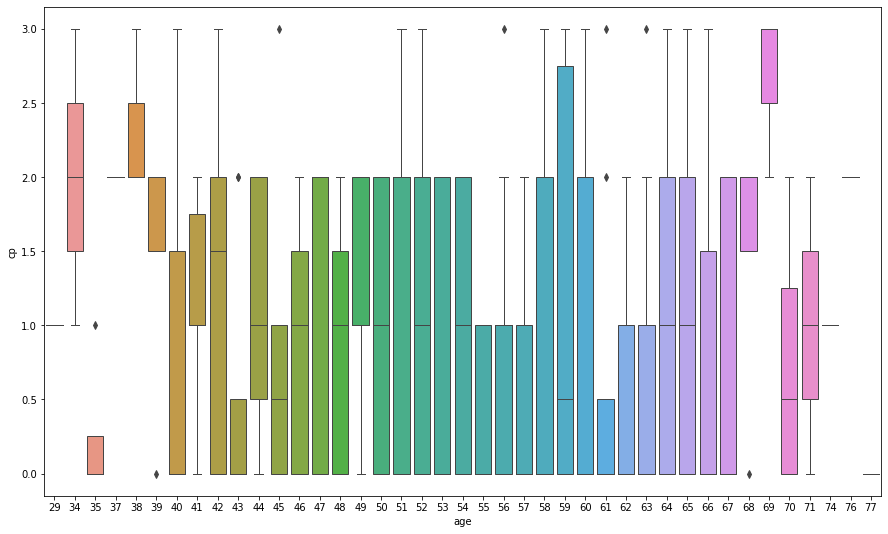

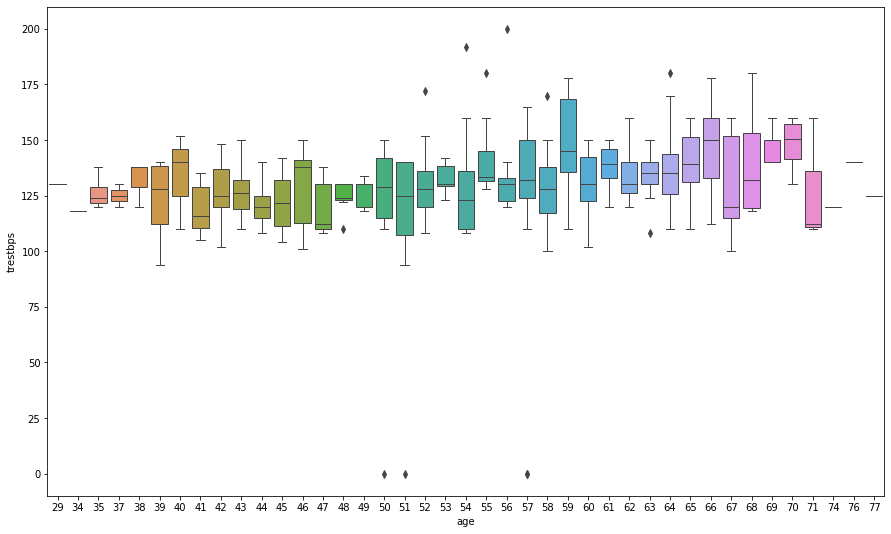

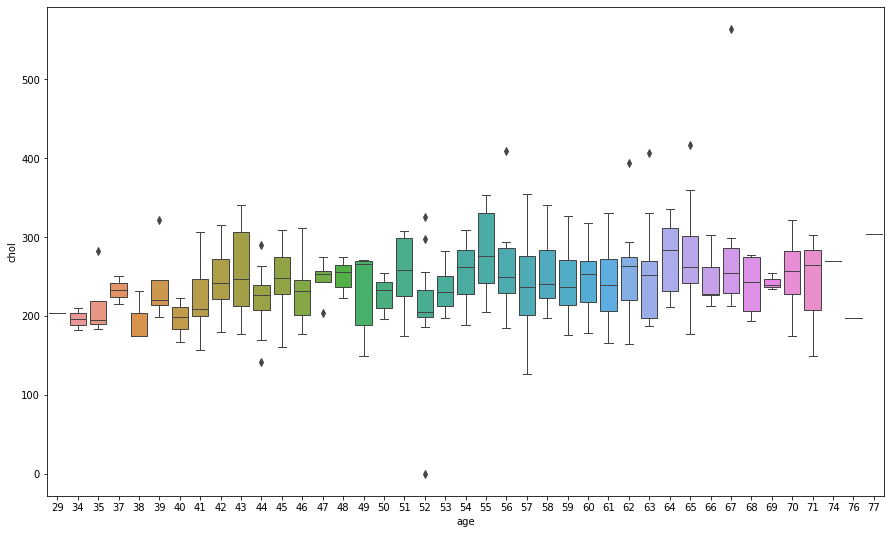

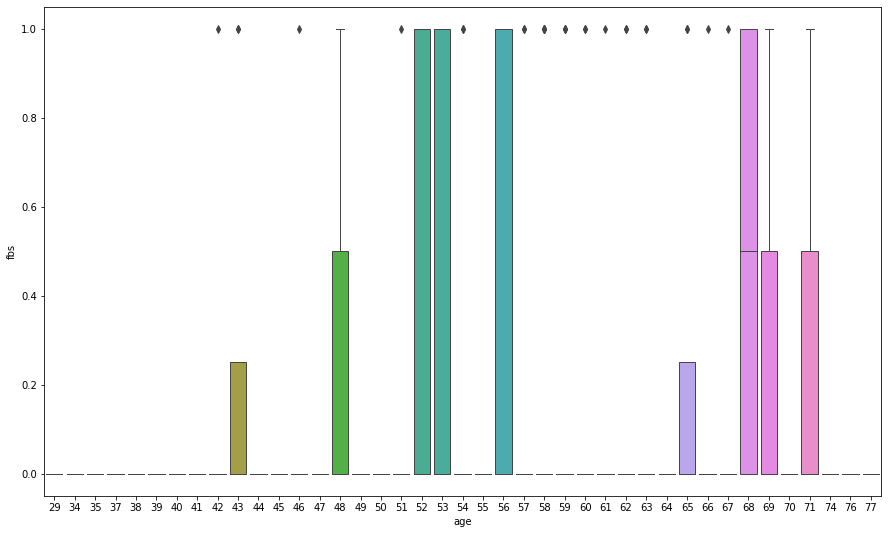

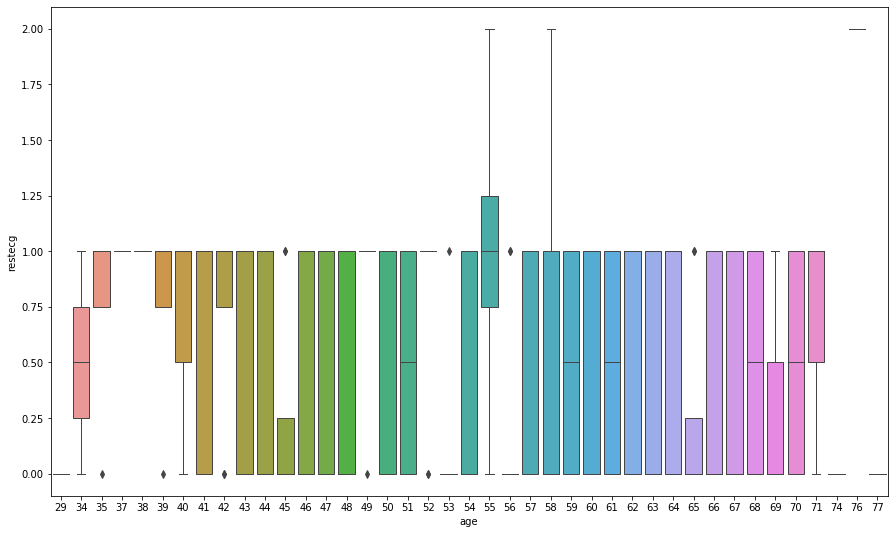

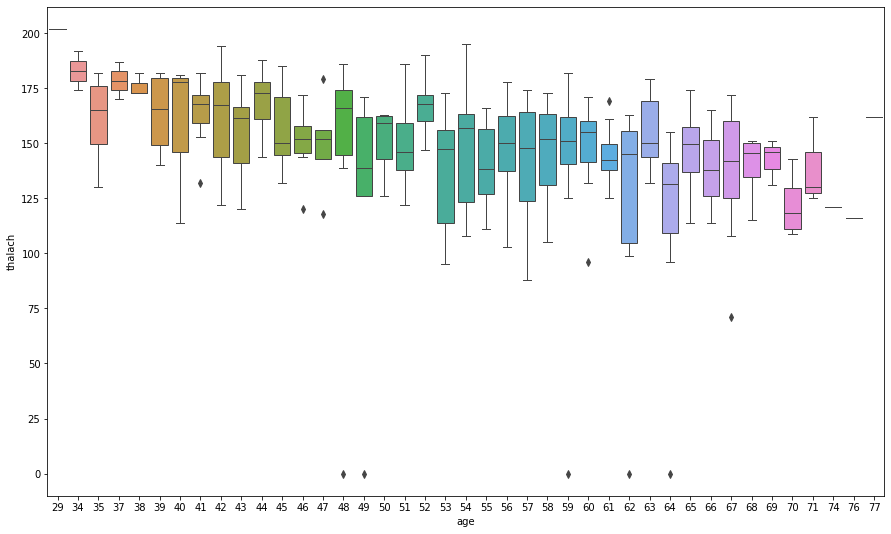

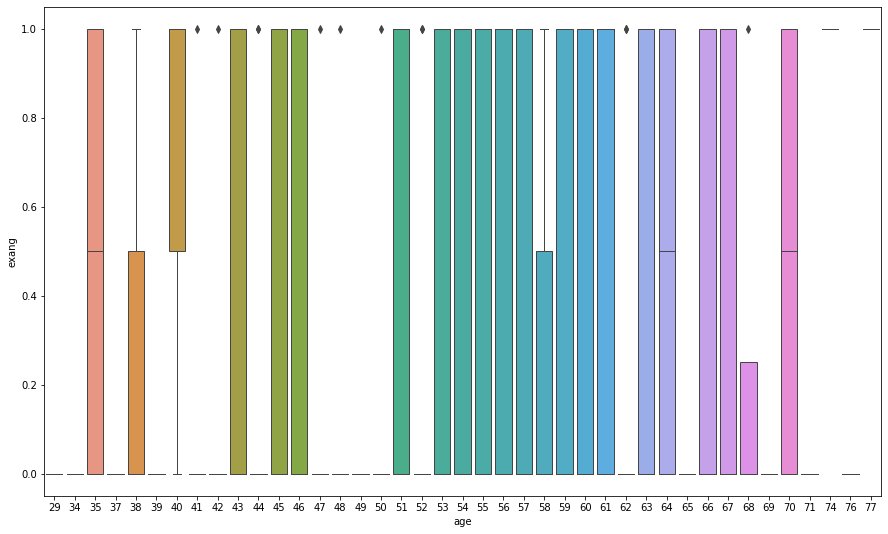

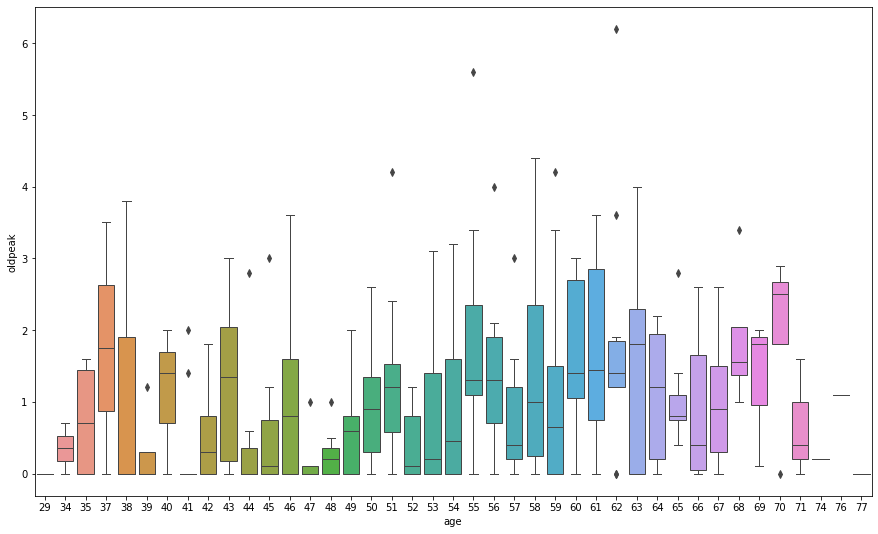

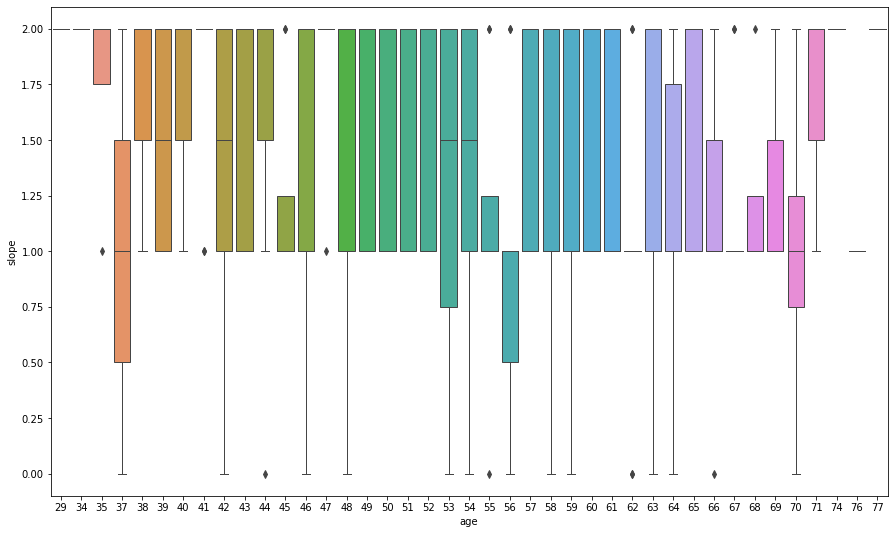

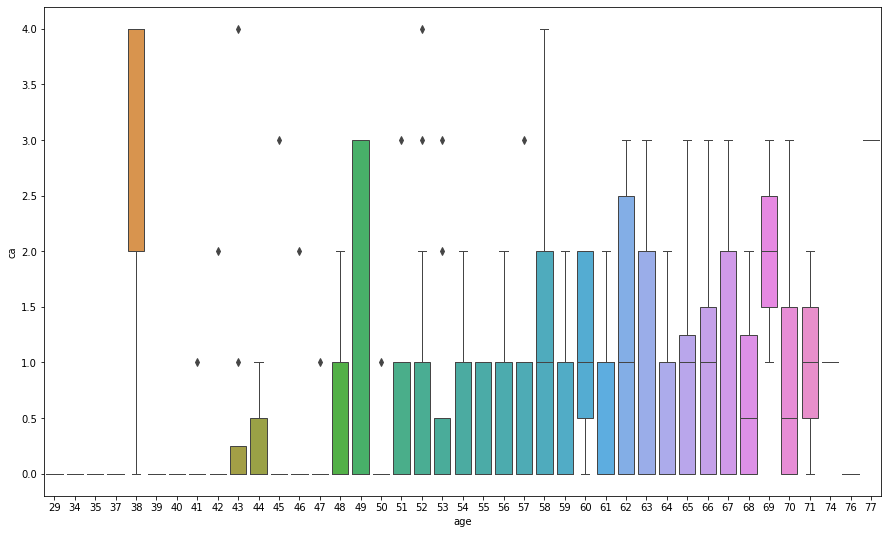

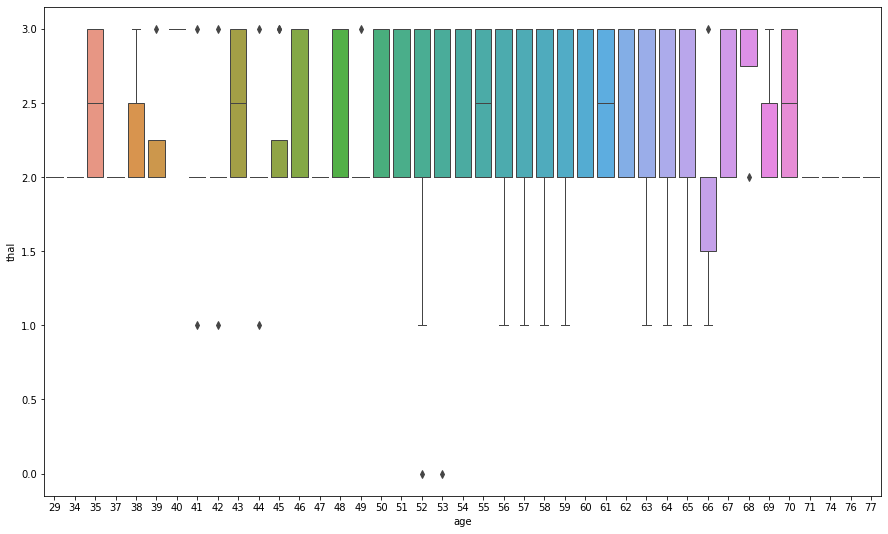

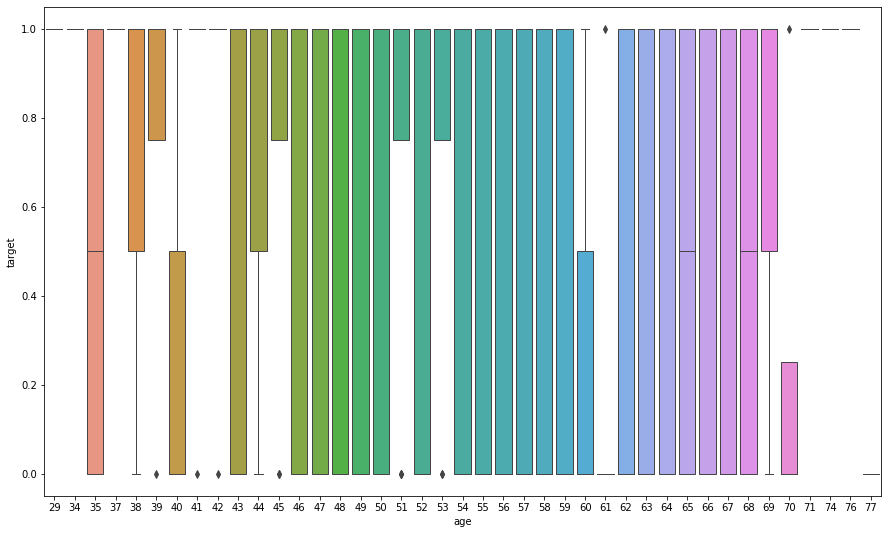

In [103]:
for i in ['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']:
    plt.figure(figsize=(15,9))
    sns.boxplot(x=df.age,y=df[i],data=df,linewidth=1)
    plt.show()

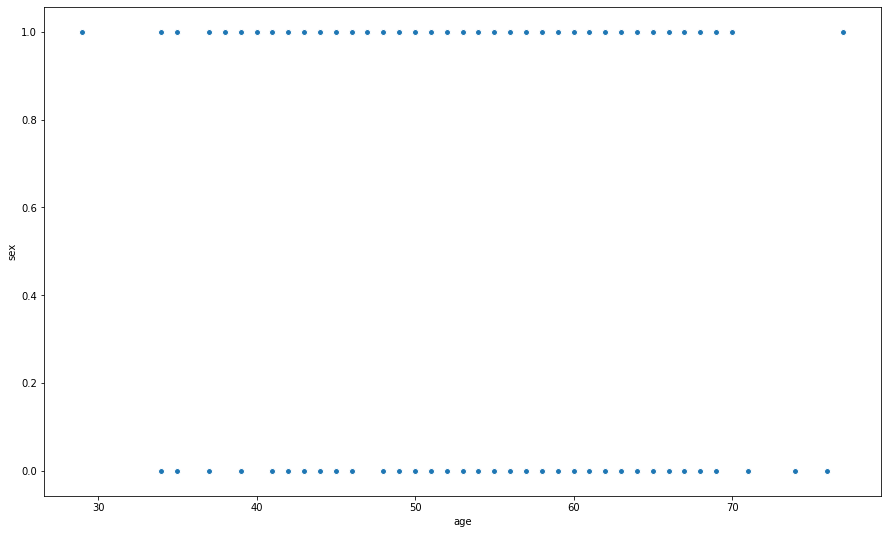

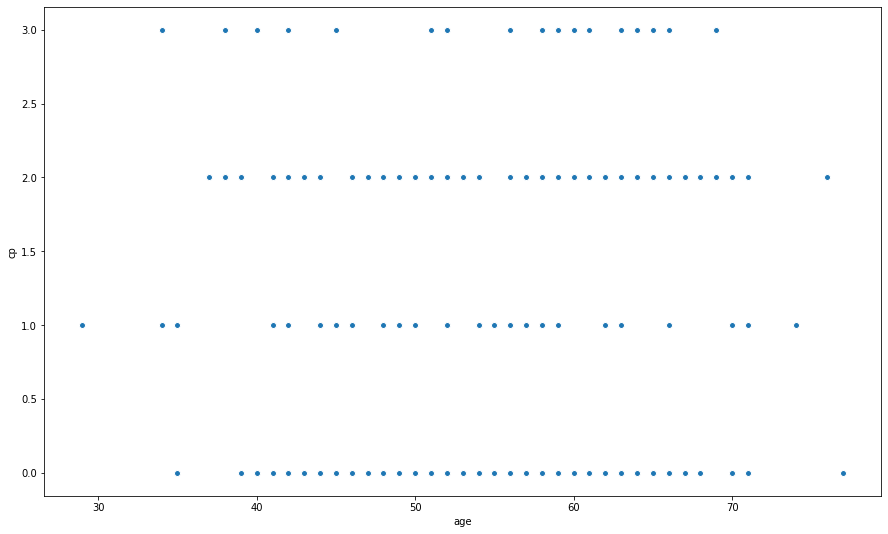

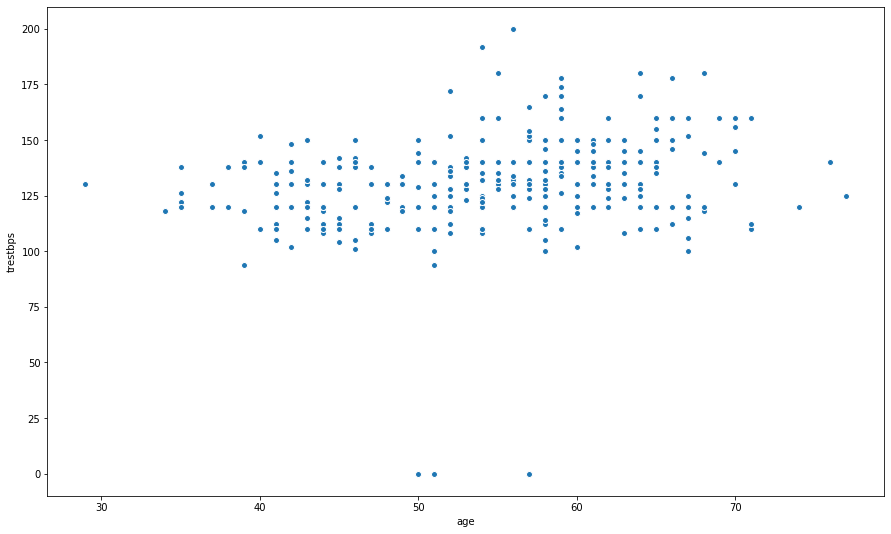

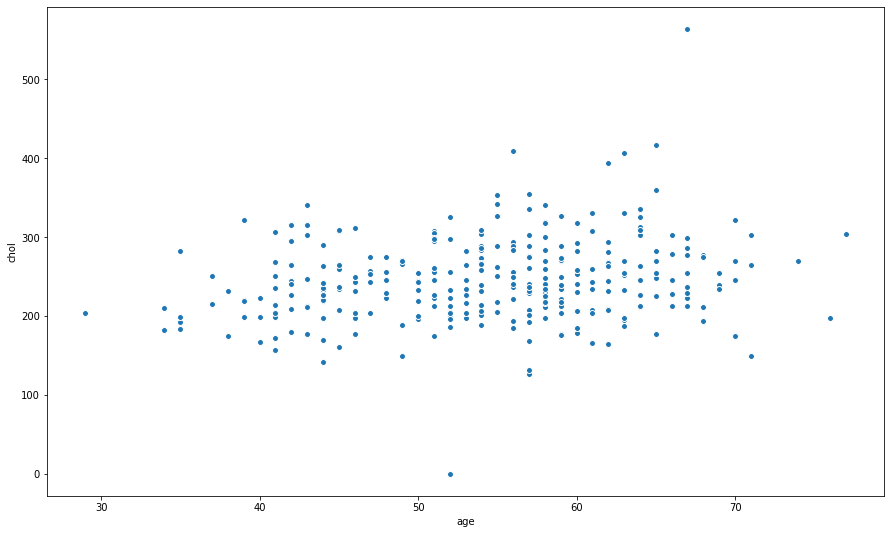

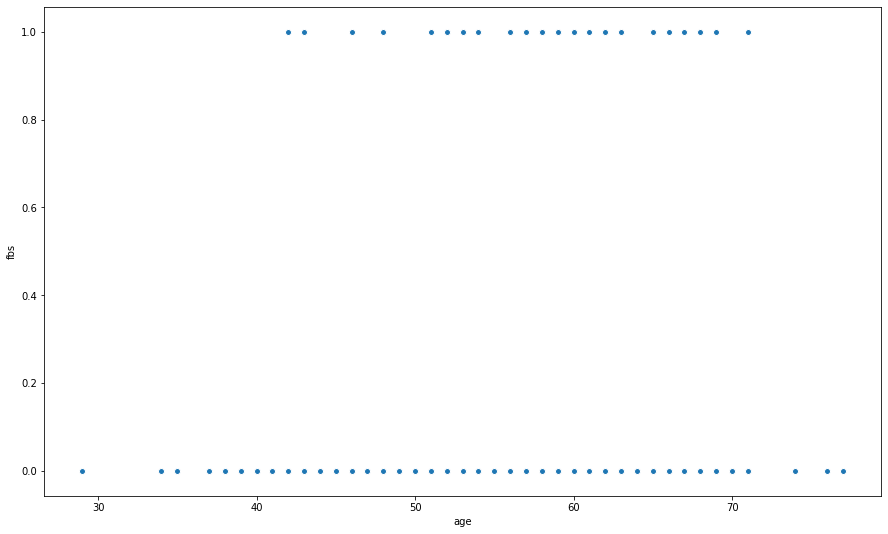

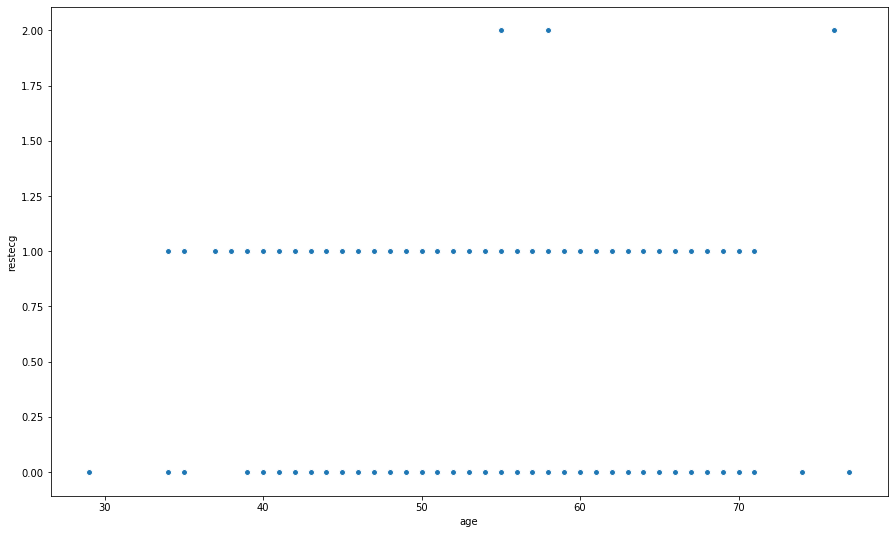

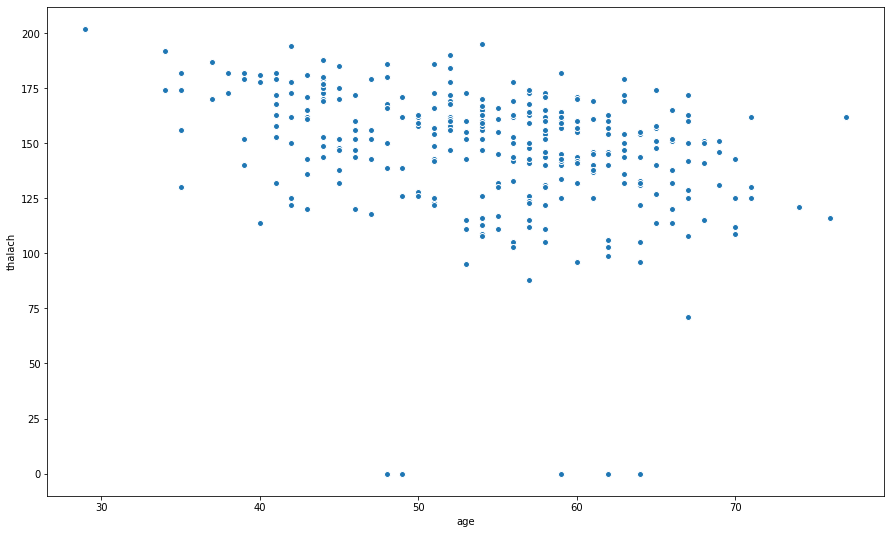

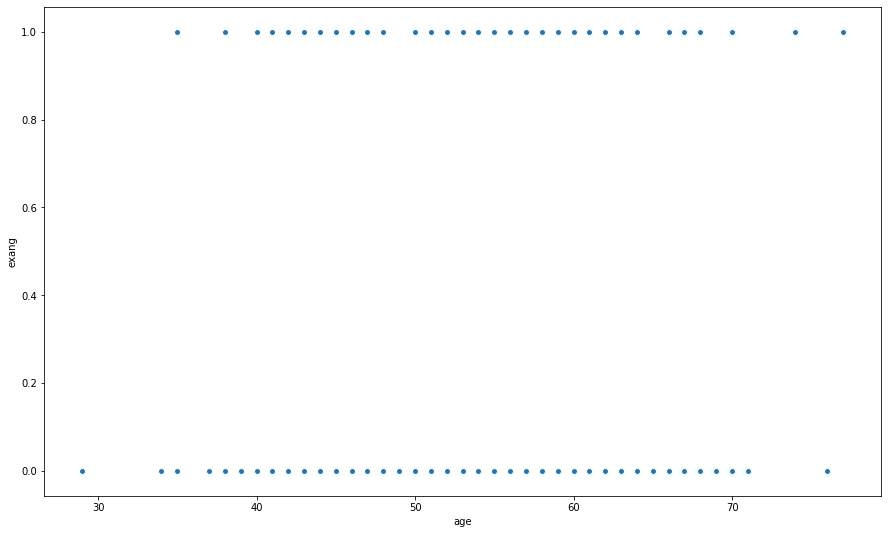

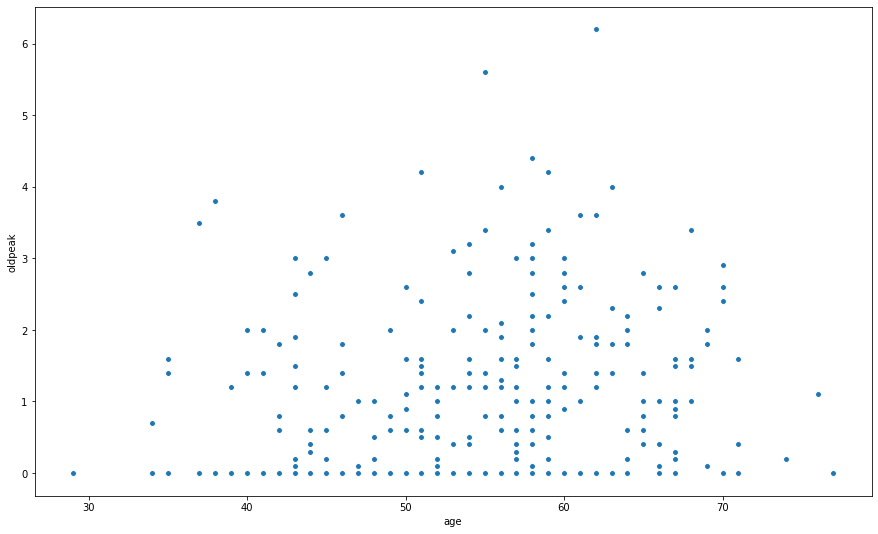

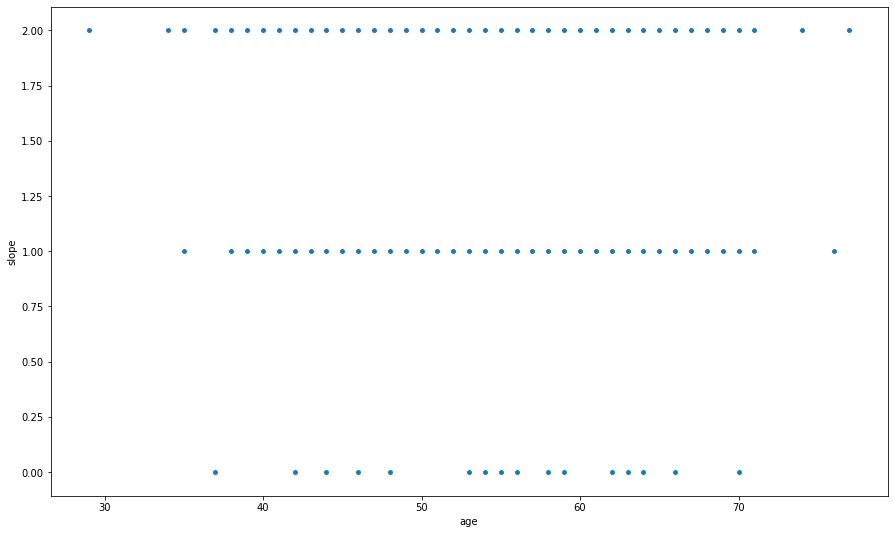

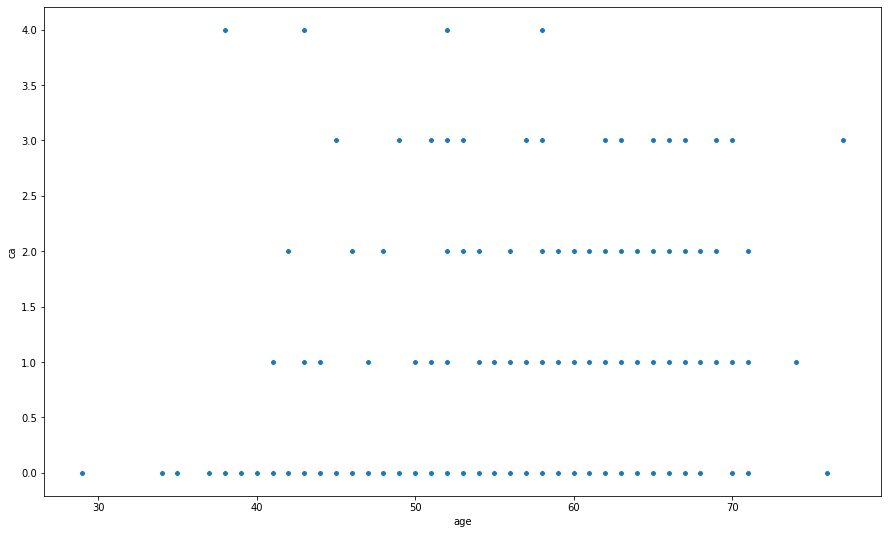

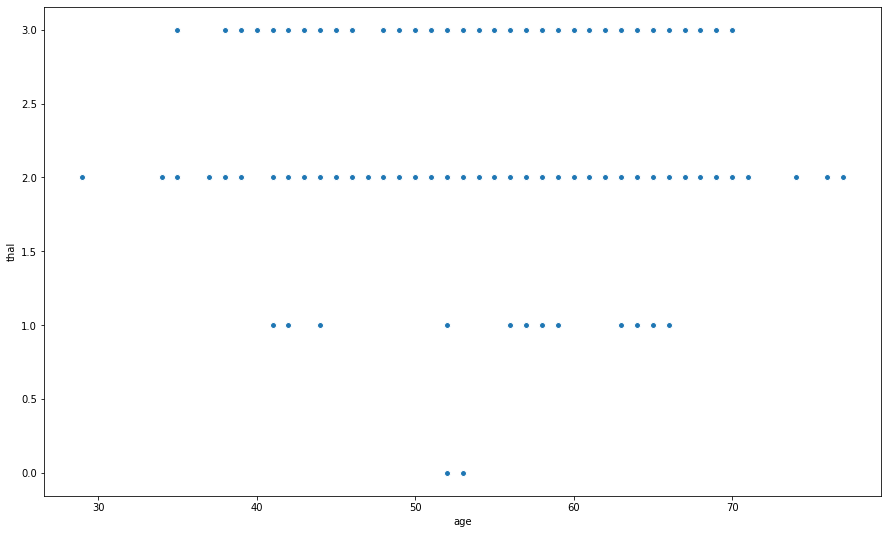

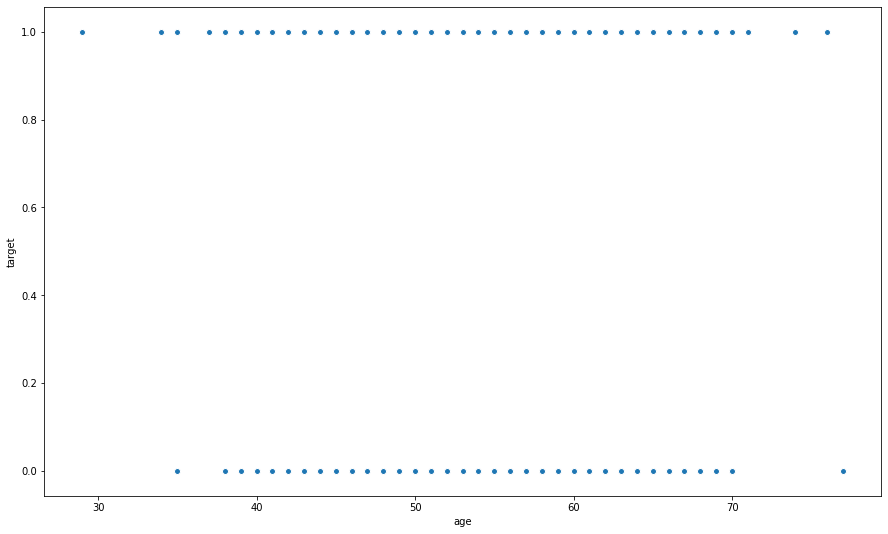

In [104]:
for i in ['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']:
    plt.figure(figsize=(15,9))
    sns.scatterplot(x=df.age,y=df[i],data=df,linewidth=1)
    plt.show()

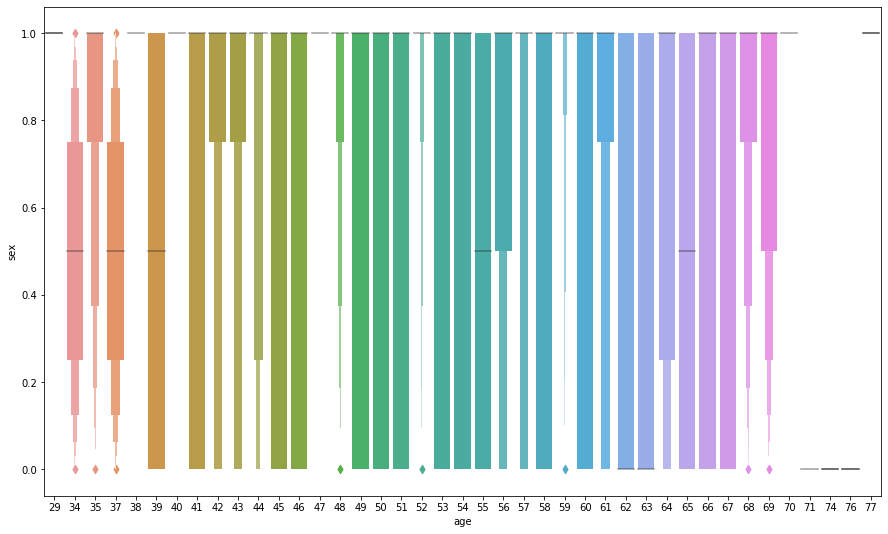

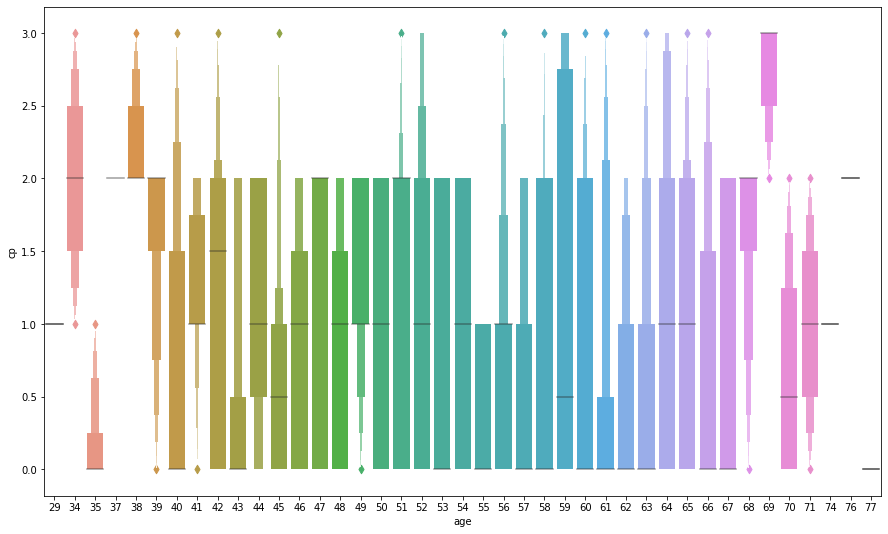

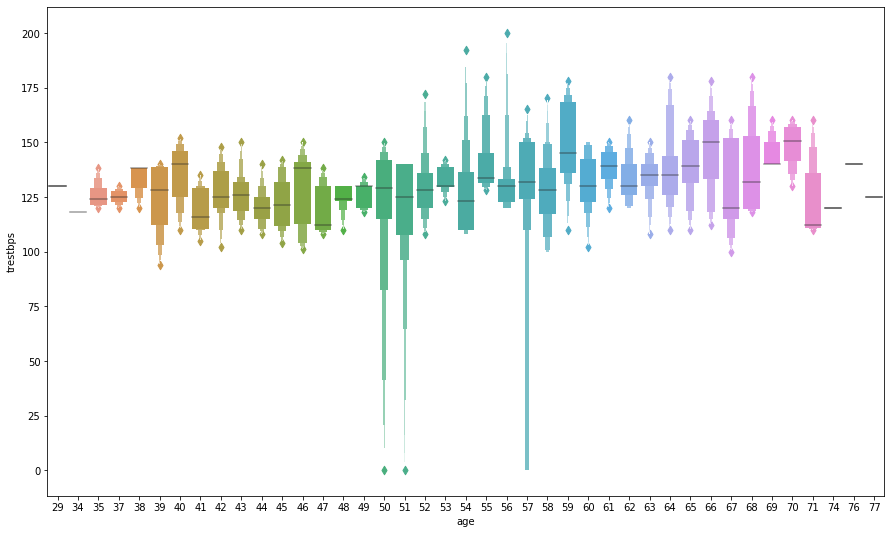

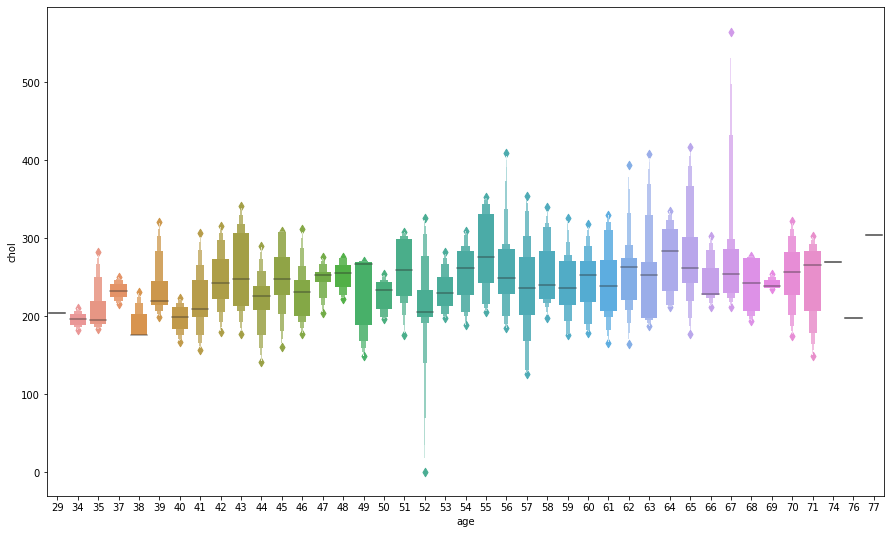

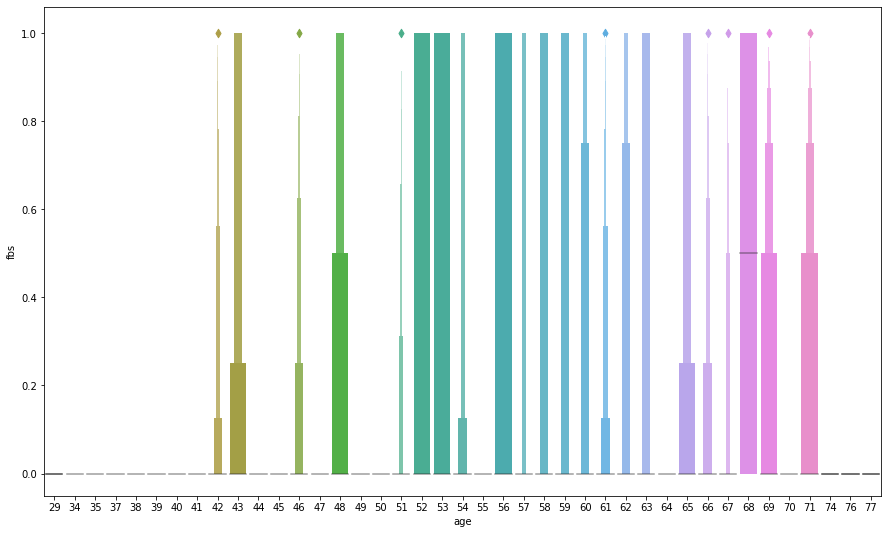

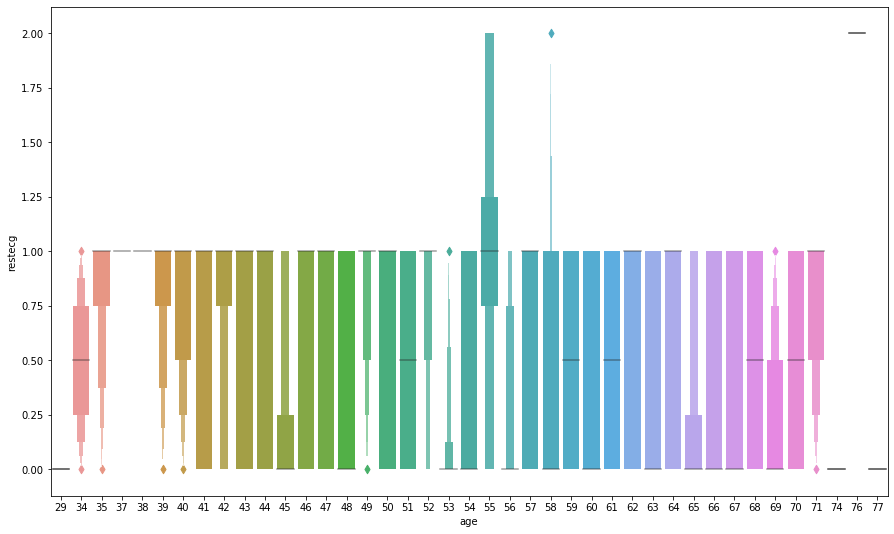

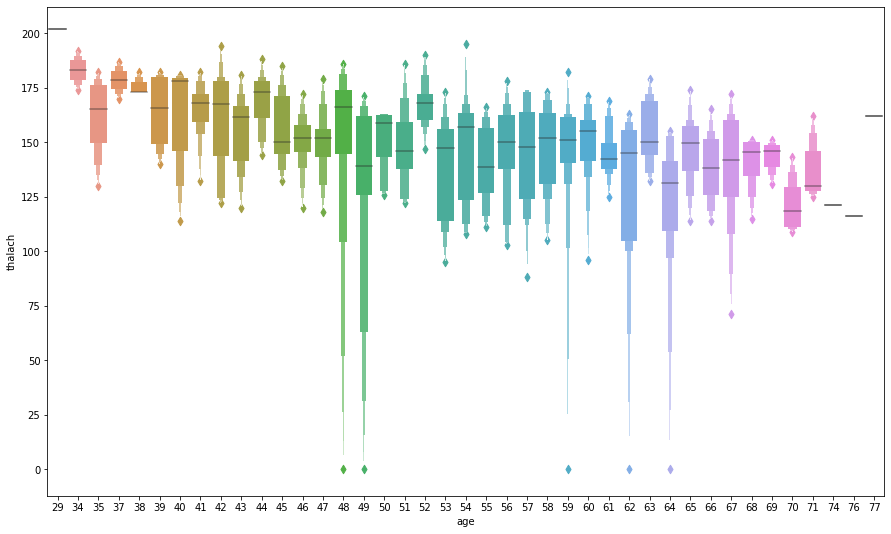

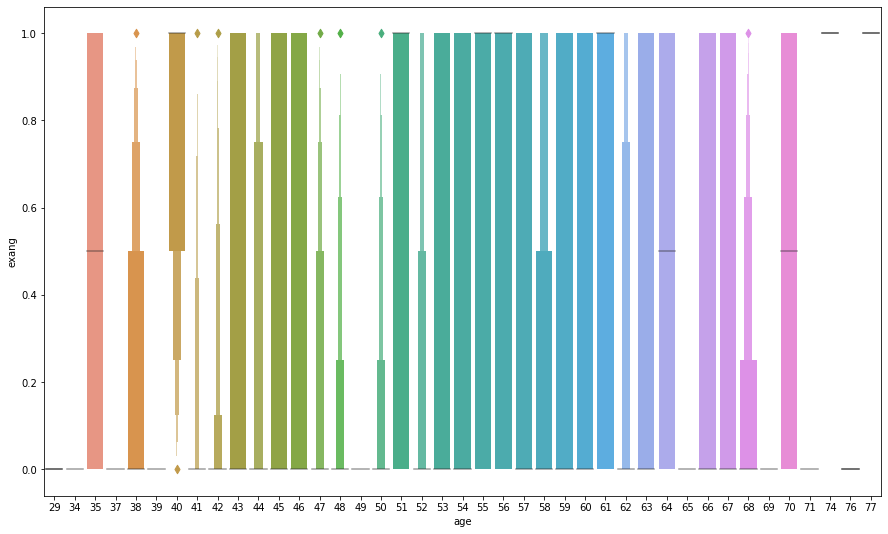

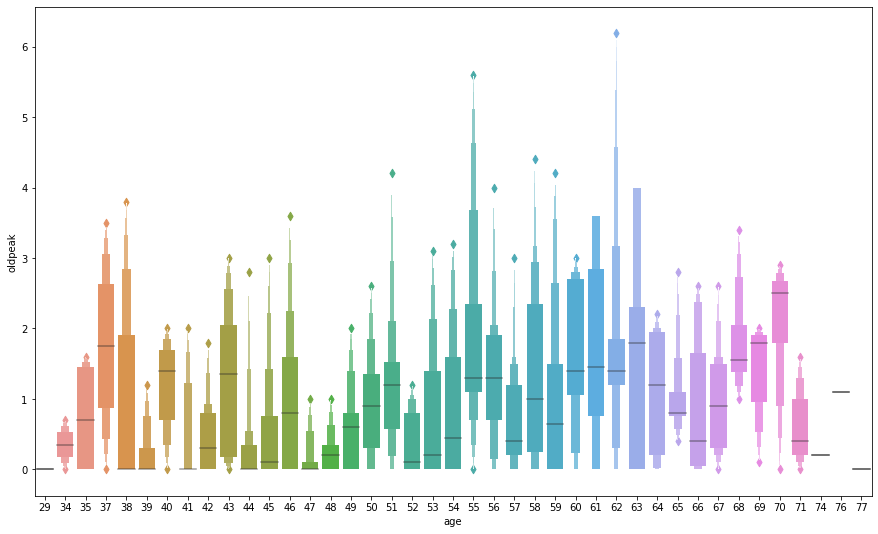

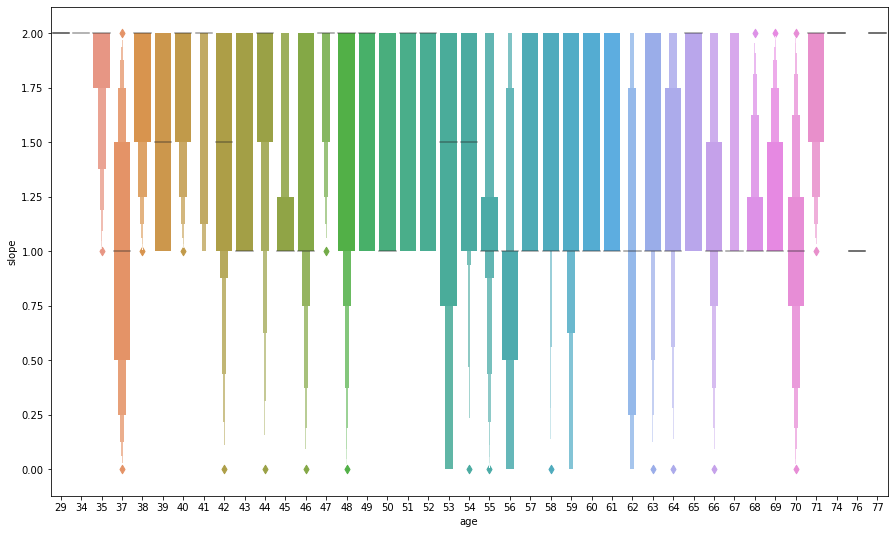

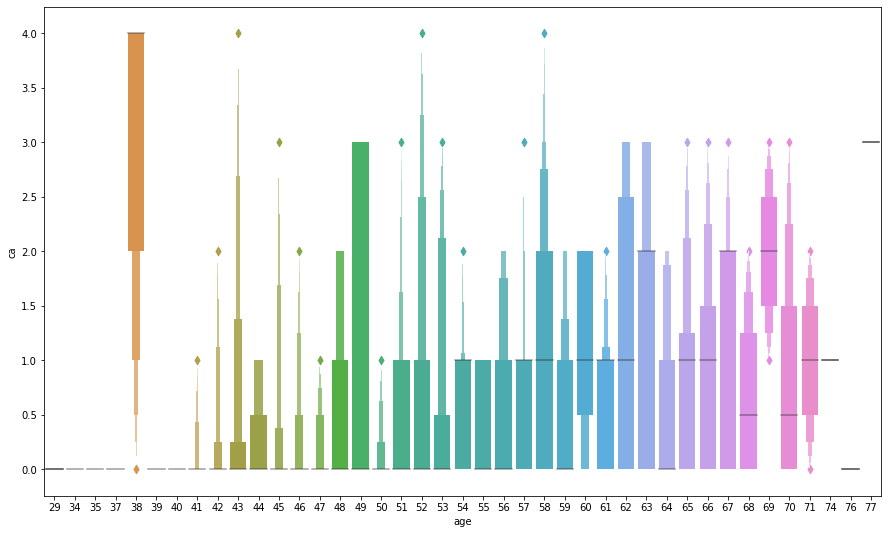

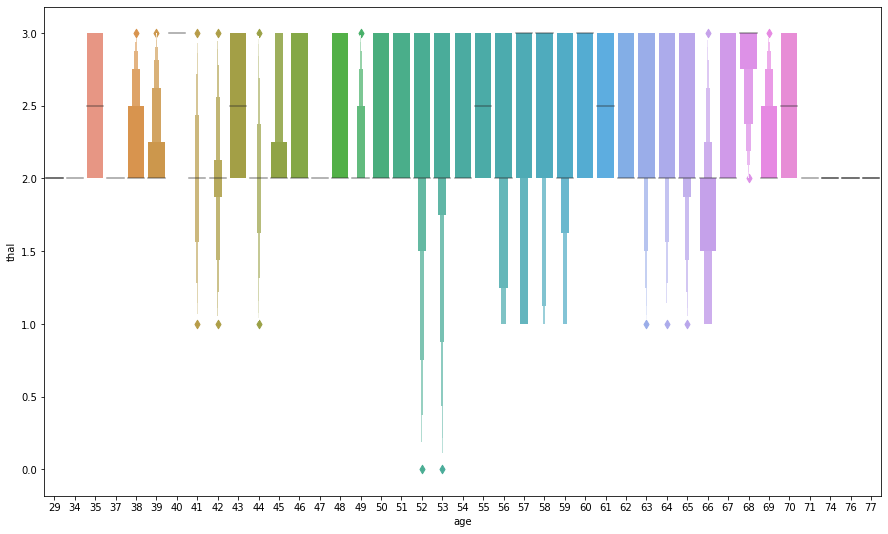

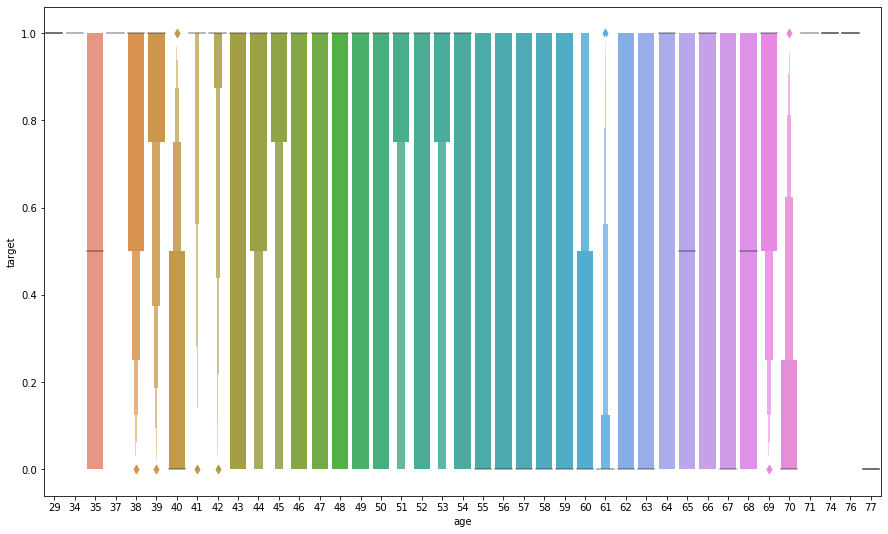

In [105]:
for i in ['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']:
    plt.figure(figsize=(15,9))
    sns.boxenplot(x=df.age,y=df[i],data=df,linewidth=1)
    plt.show()

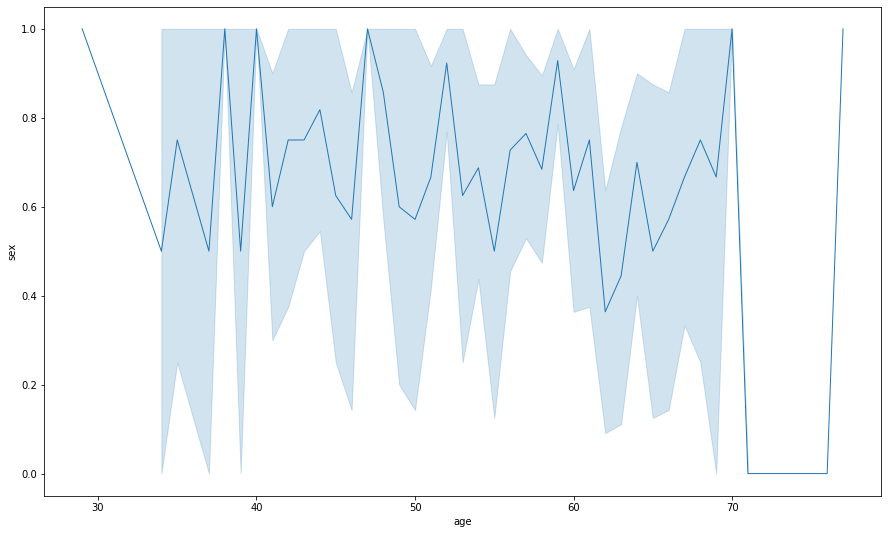

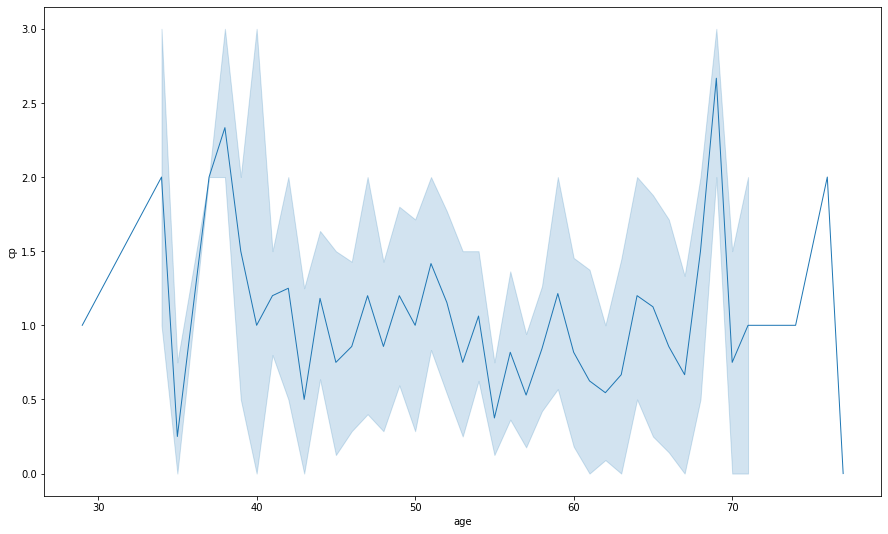

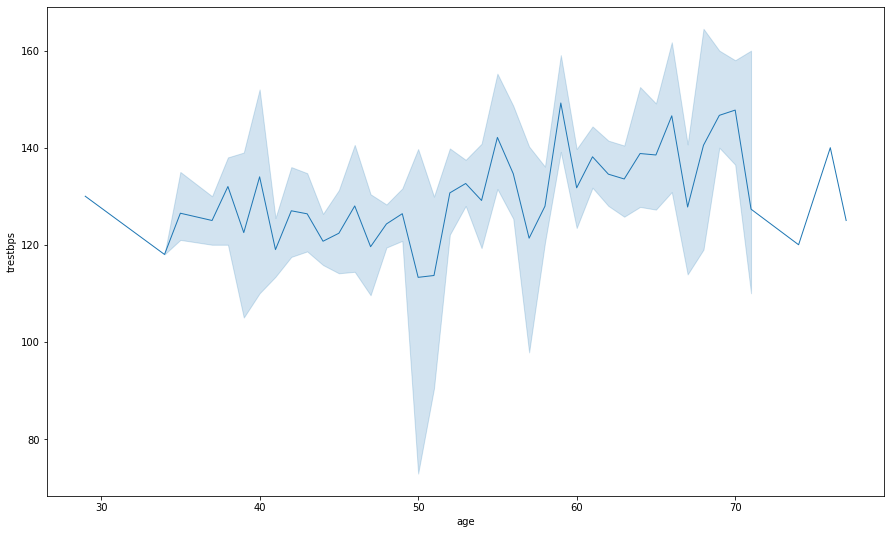

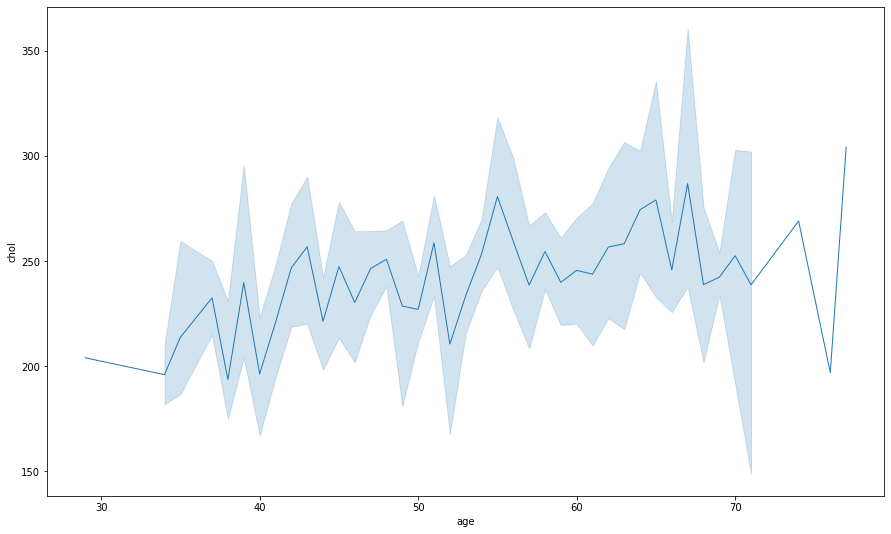

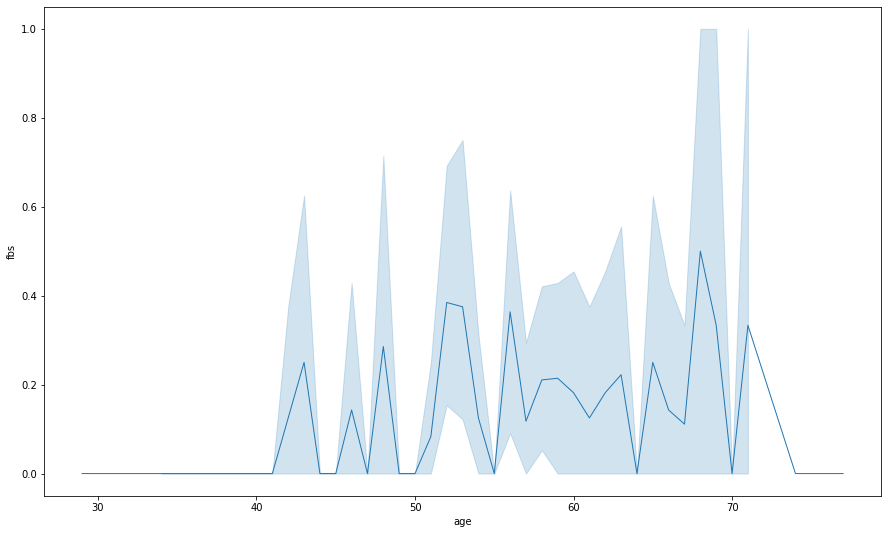

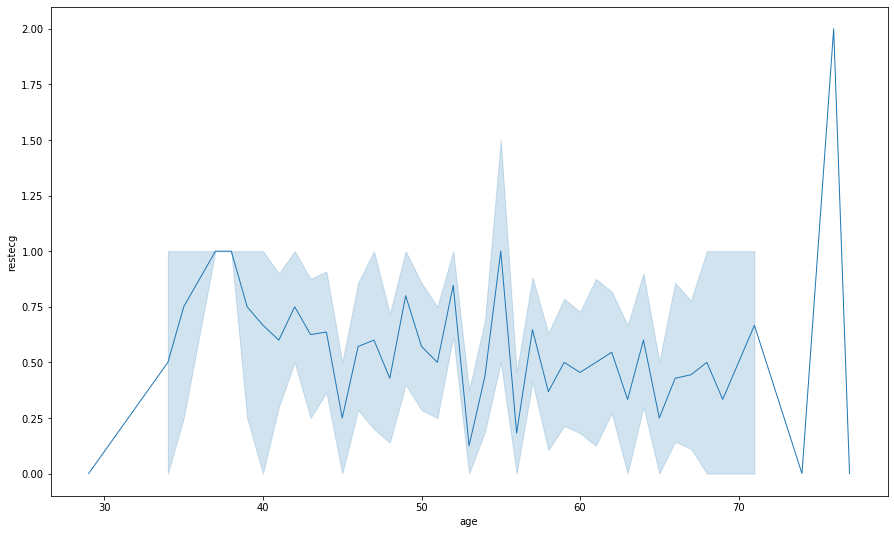

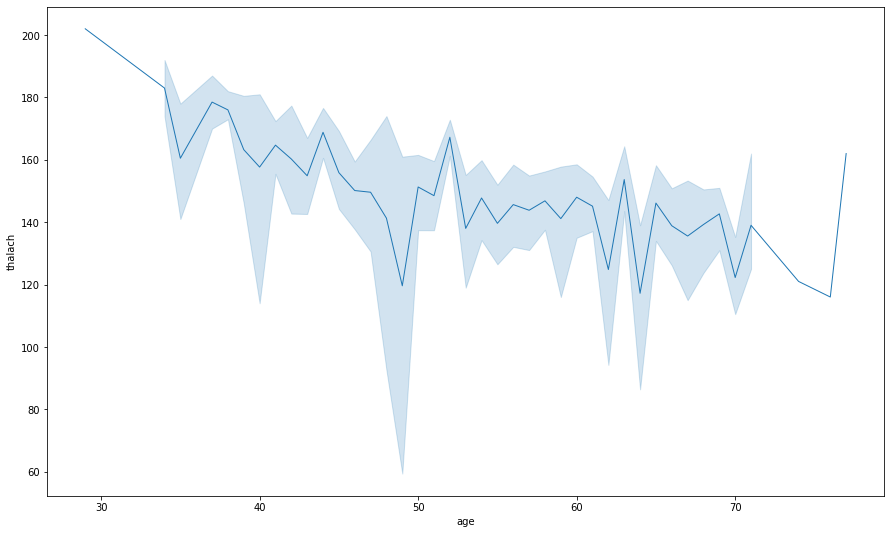

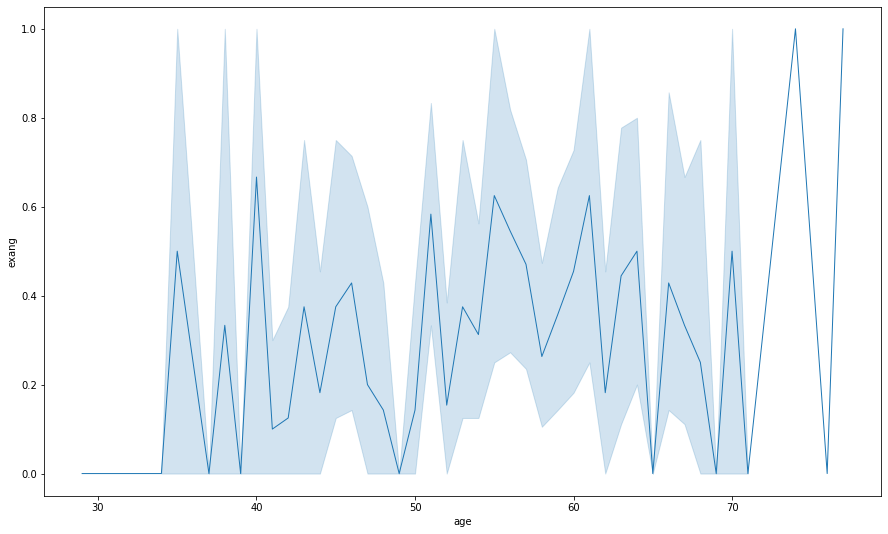

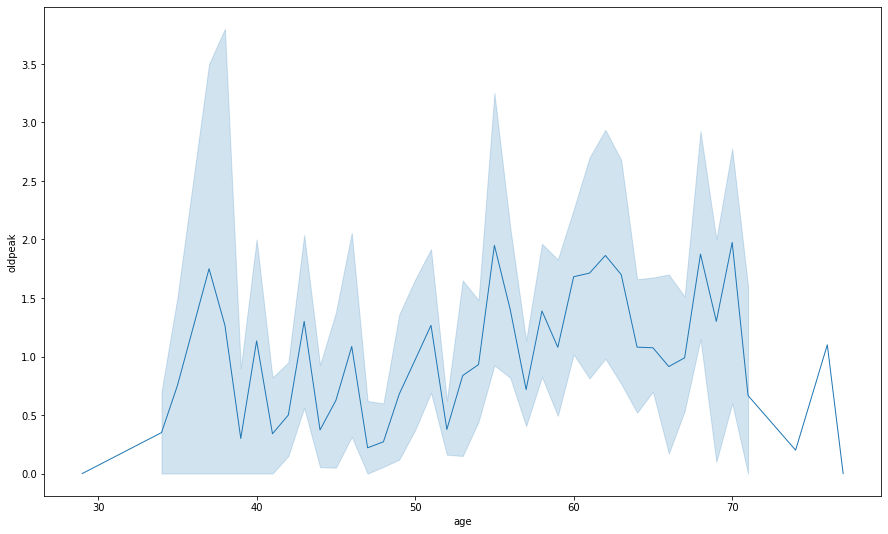

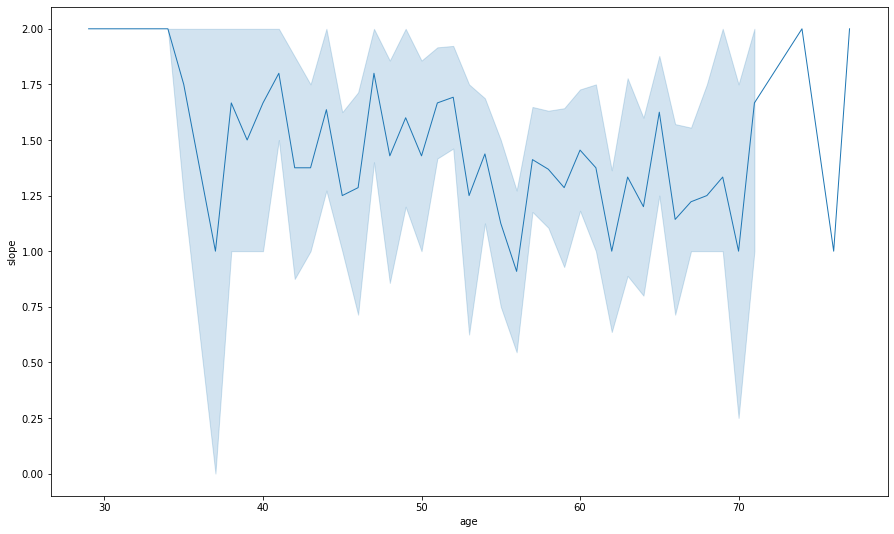

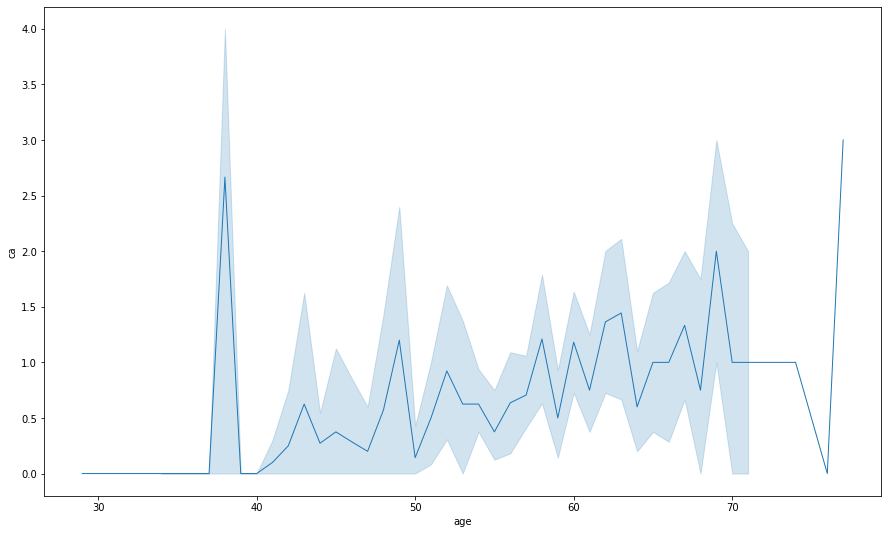

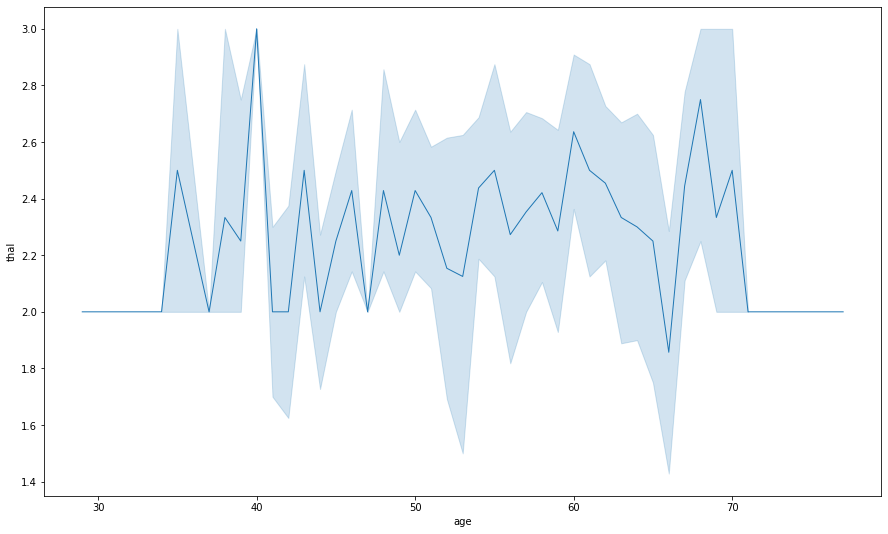

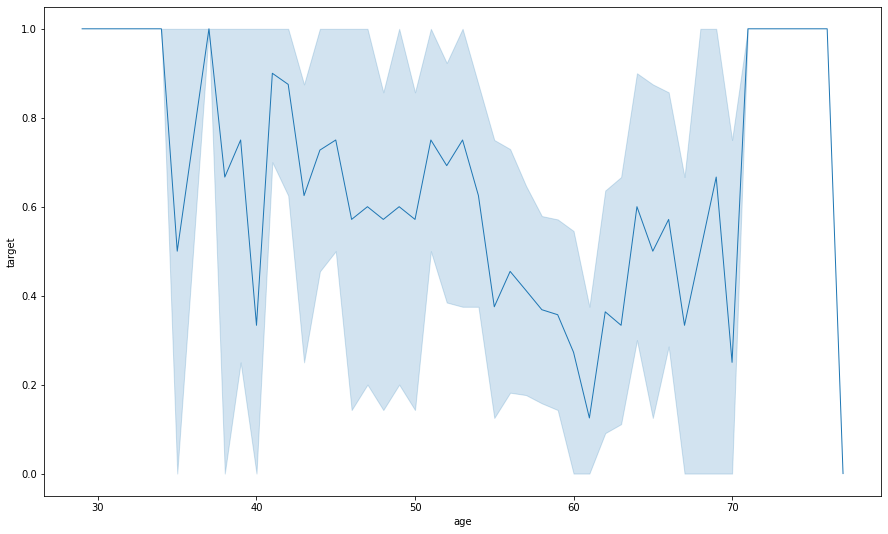

In [107]:
for i in ['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']:
    plt.figure(figsize=(15,9))
    sns.lineplot(x=df.age,y=df[i],data=df,linewidth=1)
    plt.show()

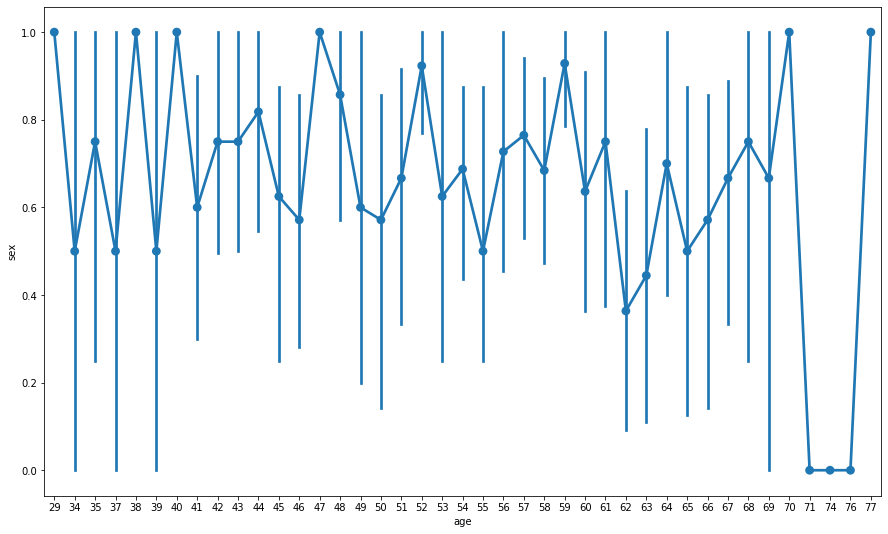

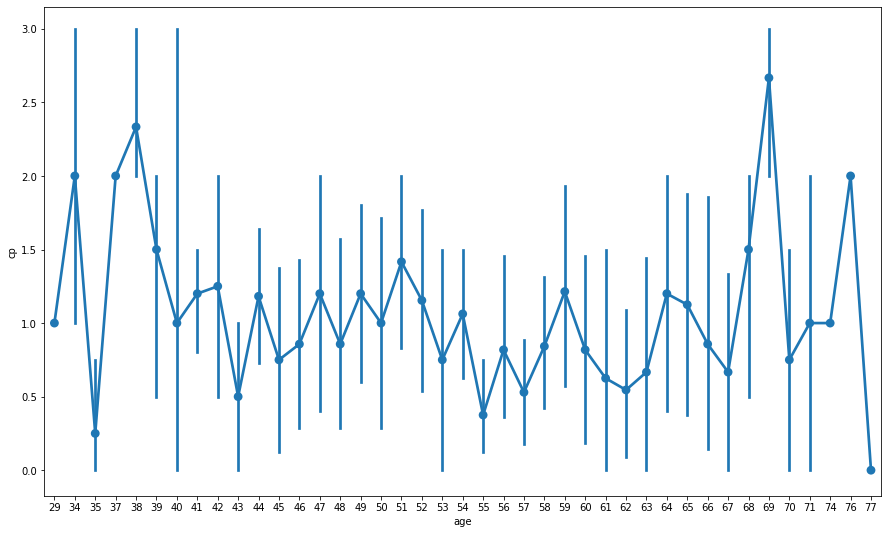

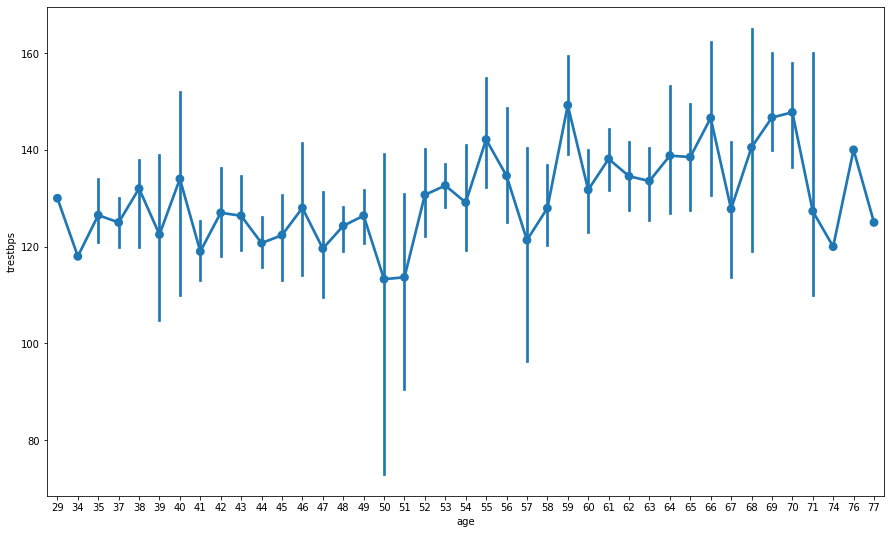

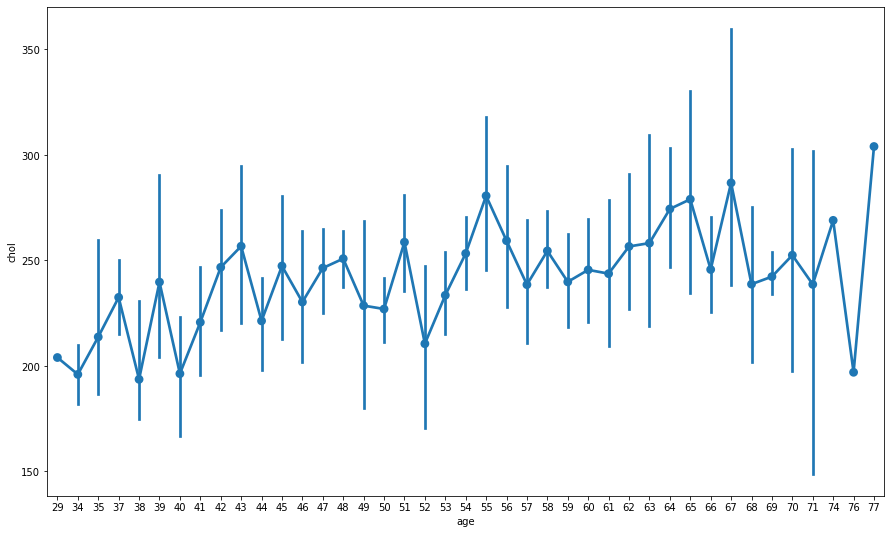

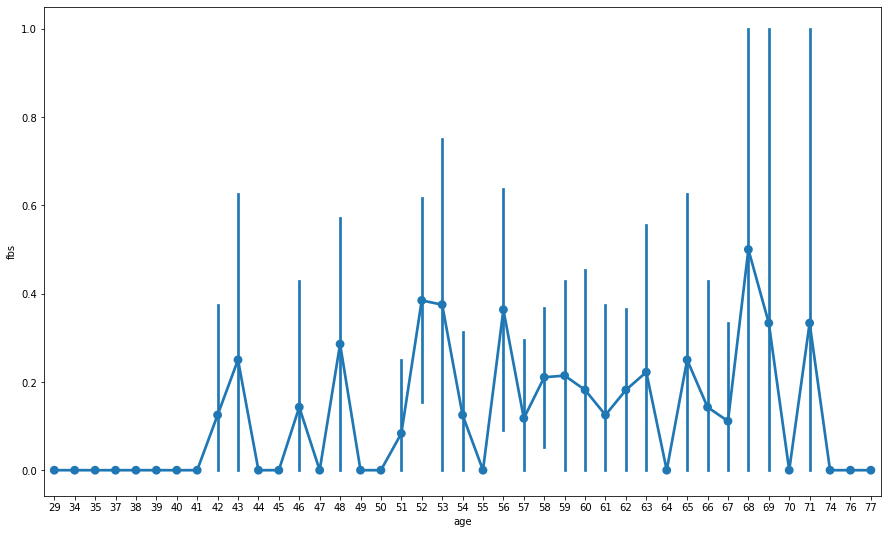

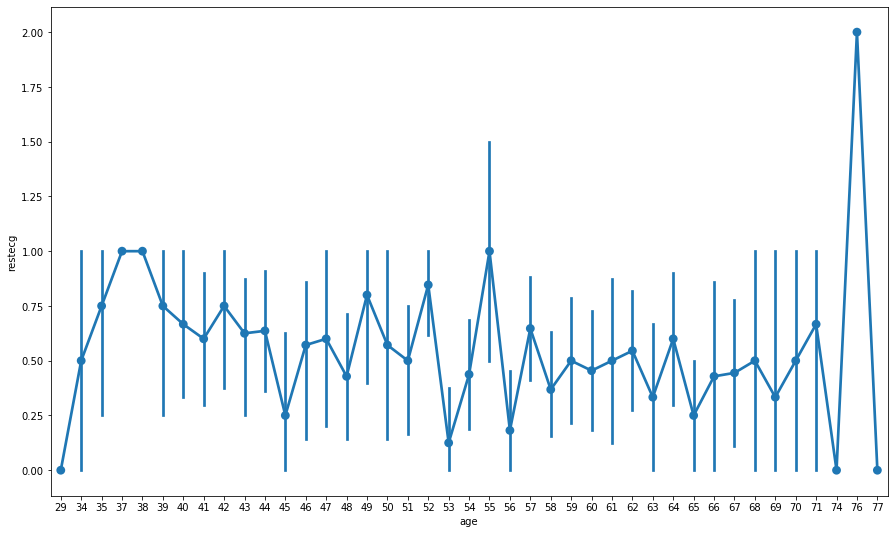

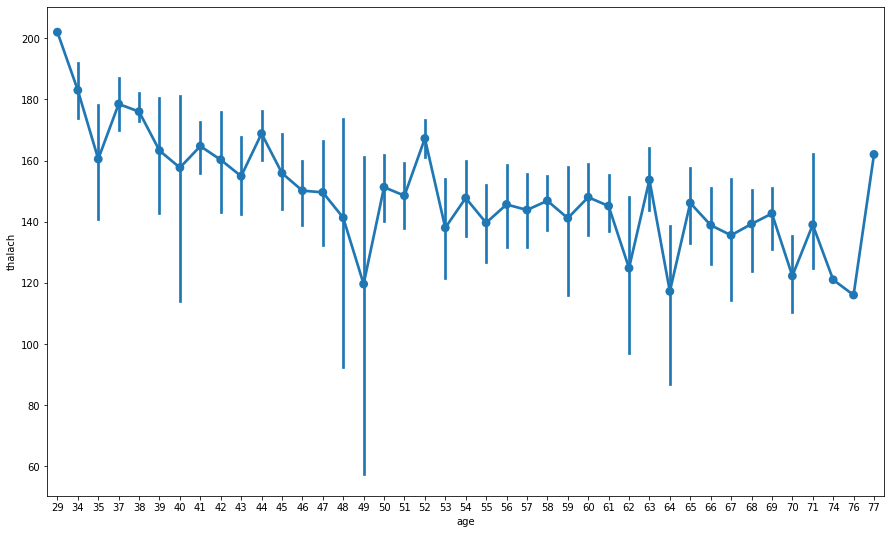

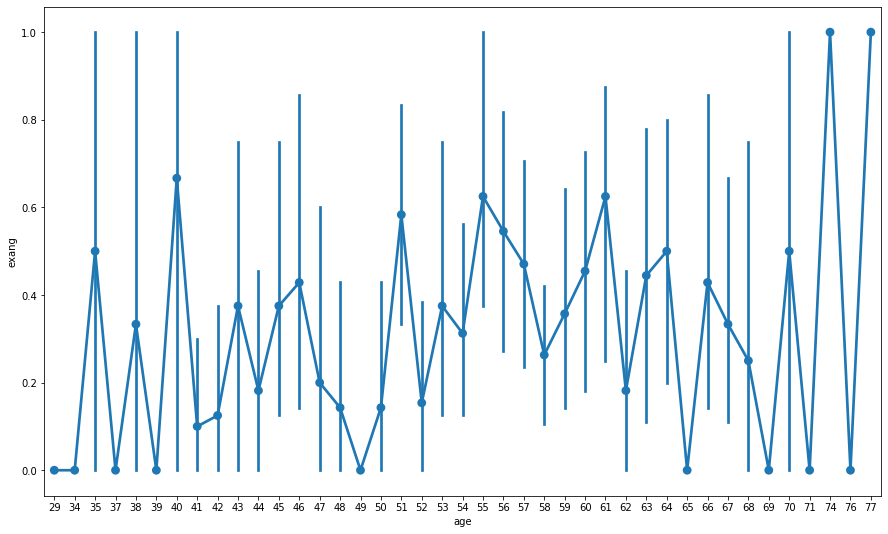

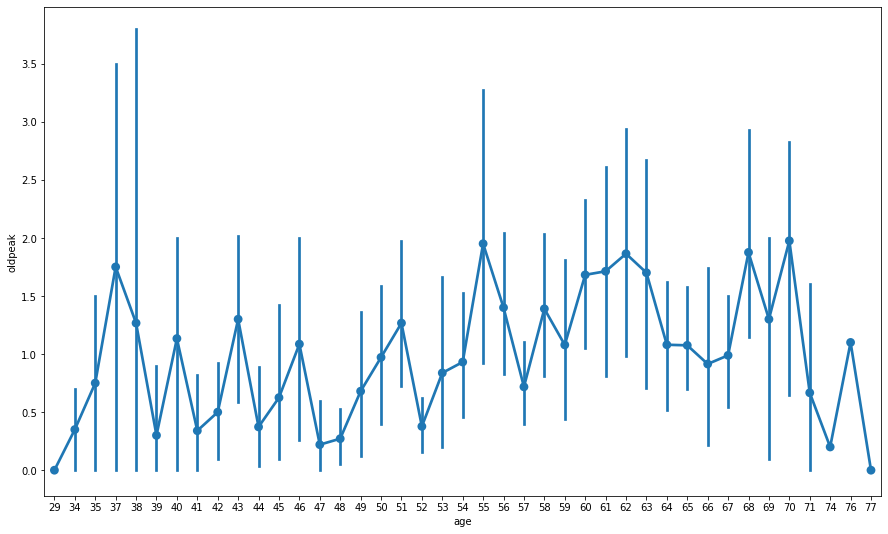

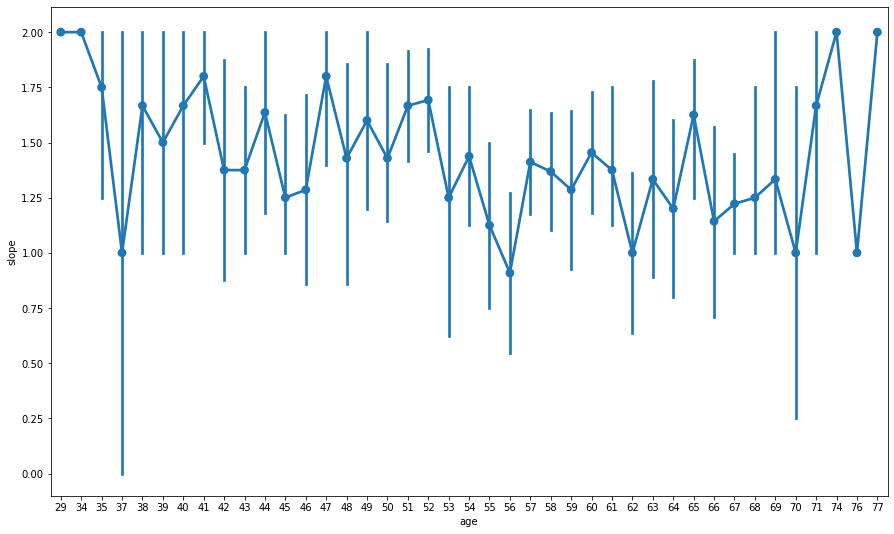

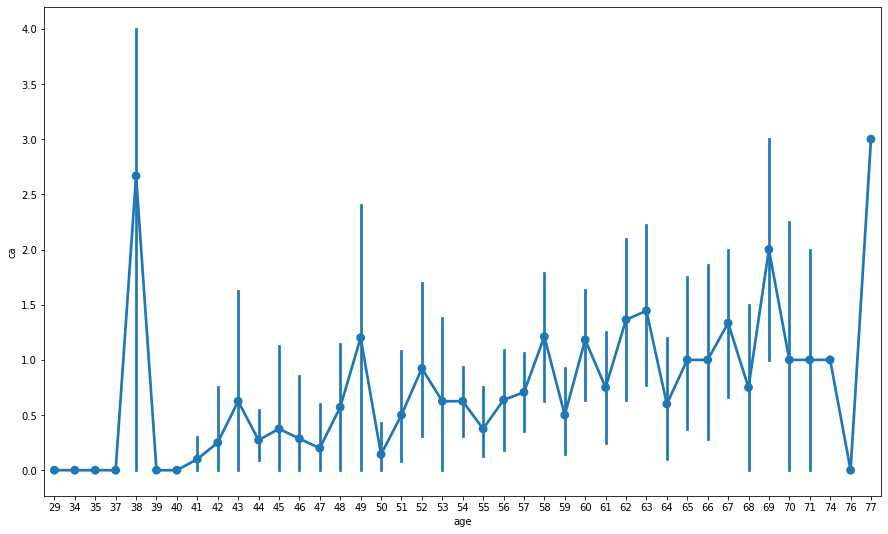

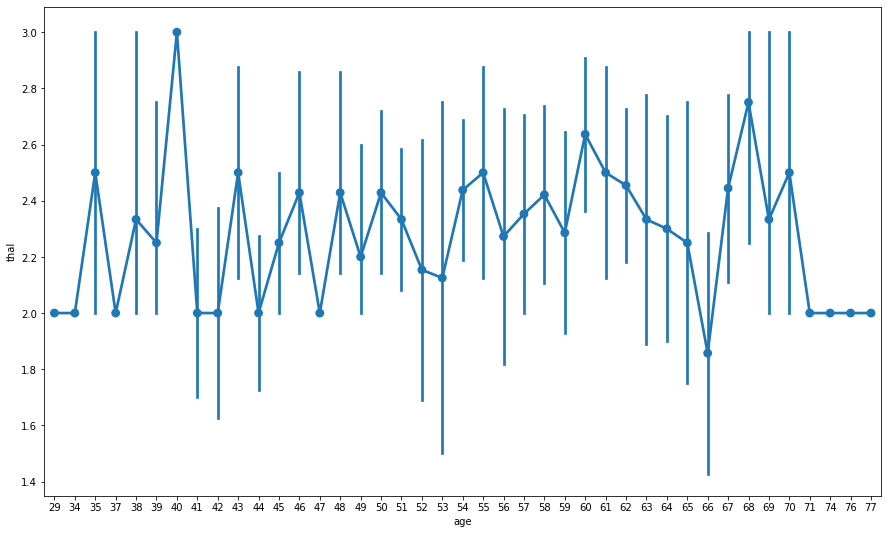

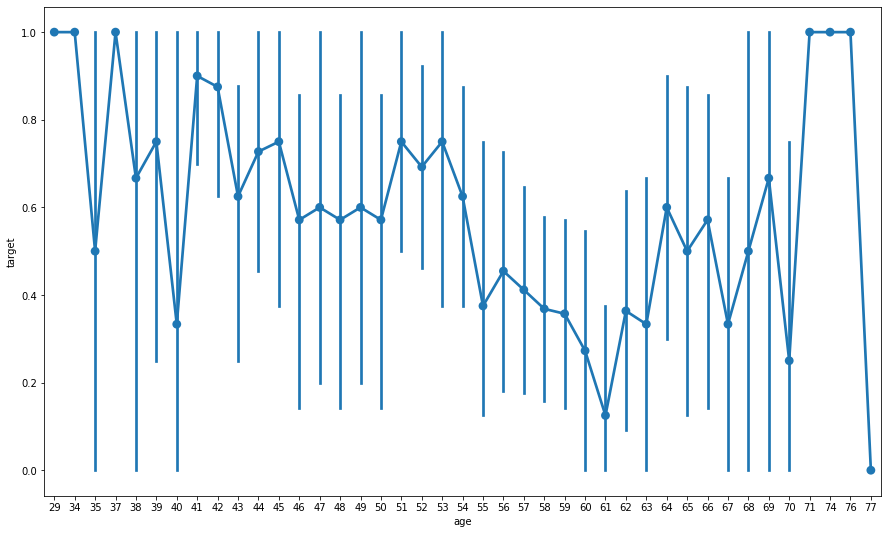

In [108]:
for i in ['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']:
    plt.figure(figsize=(15,9))
    sns.pointplot(x=df.age,y=df[i],data=df,linewidth=1)
    plt.show()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


<Figure size 1080x648 with 0 Axes>

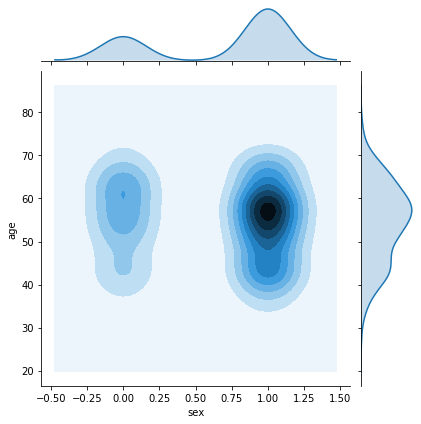

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


<Figure size 1080x648 with 0 Axes>

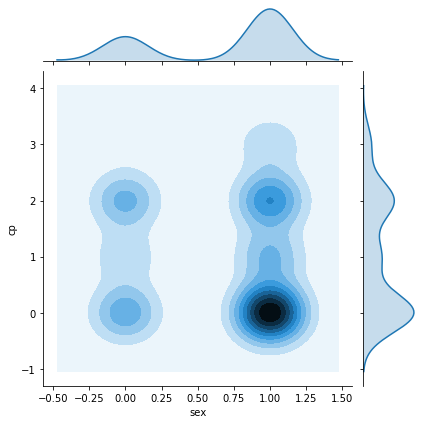

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


<Figure size 1080x648 with 0 Axes>

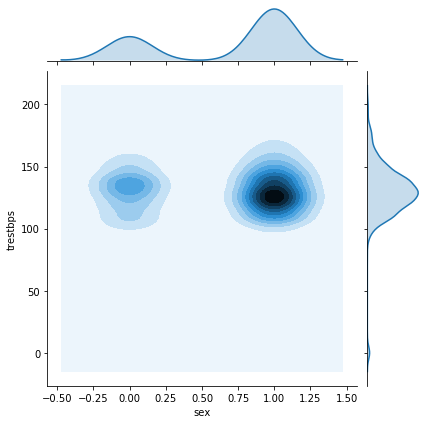

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


<Figure size 1080x648 with 0 Axes>

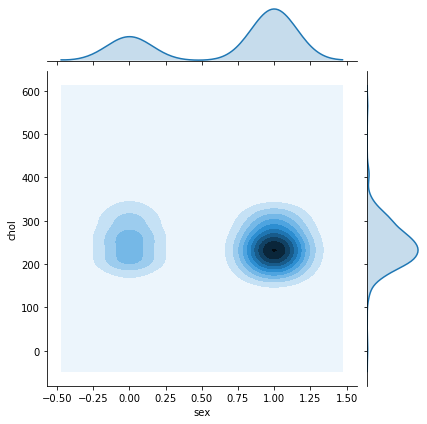

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:125: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:125: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\statsmodels\nonparametric\_kernel_base.py:514: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\matplotlib\contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\matplotlib\contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Users\Md A

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

<Figure size 1080x648 with 0 Axes>

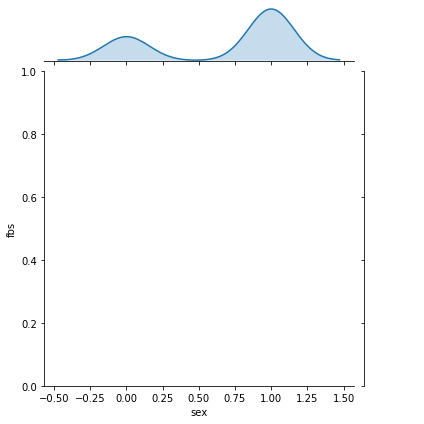

In [113]:
for i in ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']:
    plt.figure(figsize=(15,9))
    sns.jointplot(x=df.sex,y=df[i],data=df,kind='kde',linewidth=1)
    plt.show()

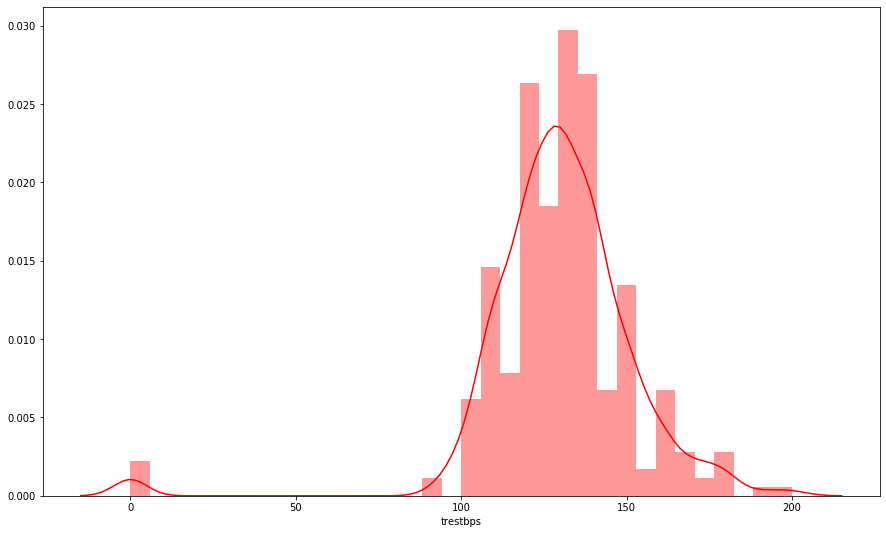

In [114]:
plt.figure(figsize=(15,9))
sns.distplot(df['trestbps'],color='red')

In [115]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

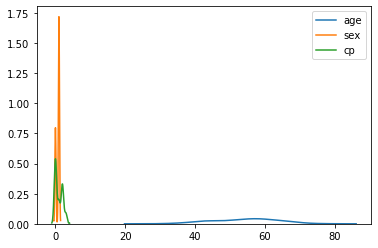

In [119]:
sns.kdeplot(df['age'])
sns.kdeplot(df['sex'])
sns.kdeplot(df['cp'])

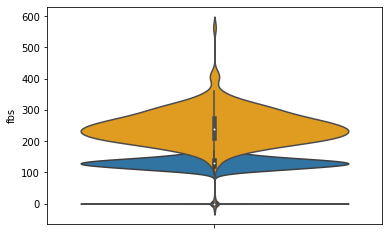

In [117]:
sns.violinplot(y="trestbps",data=df)
sns.violinplot(y="chol",data=df,color='orange')
sns.violinplot(y="fbs",data=df,color='red')

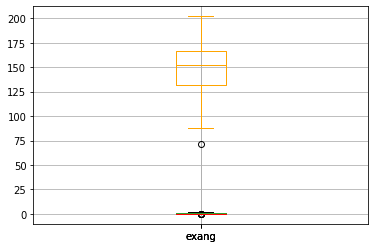

In [118]:
df.boxplot(column="restecg")
df.boxplot(column="thalach",color='orange')
df.boxplot(column="exang",color='red')

In [120]:
import sweetviz as sv

In [121]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [122]:
from IPython.display import IFrame

In [123]:
IFrame(src='Analyze.html',width=1000,height=600)

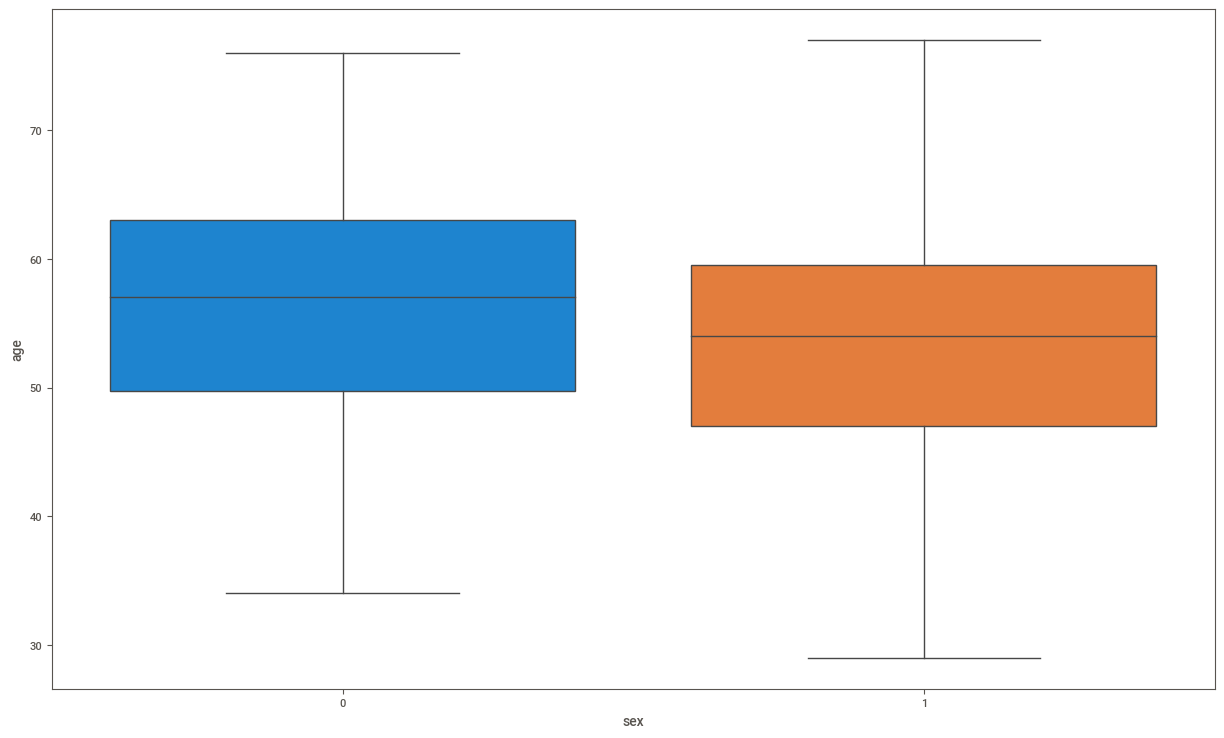

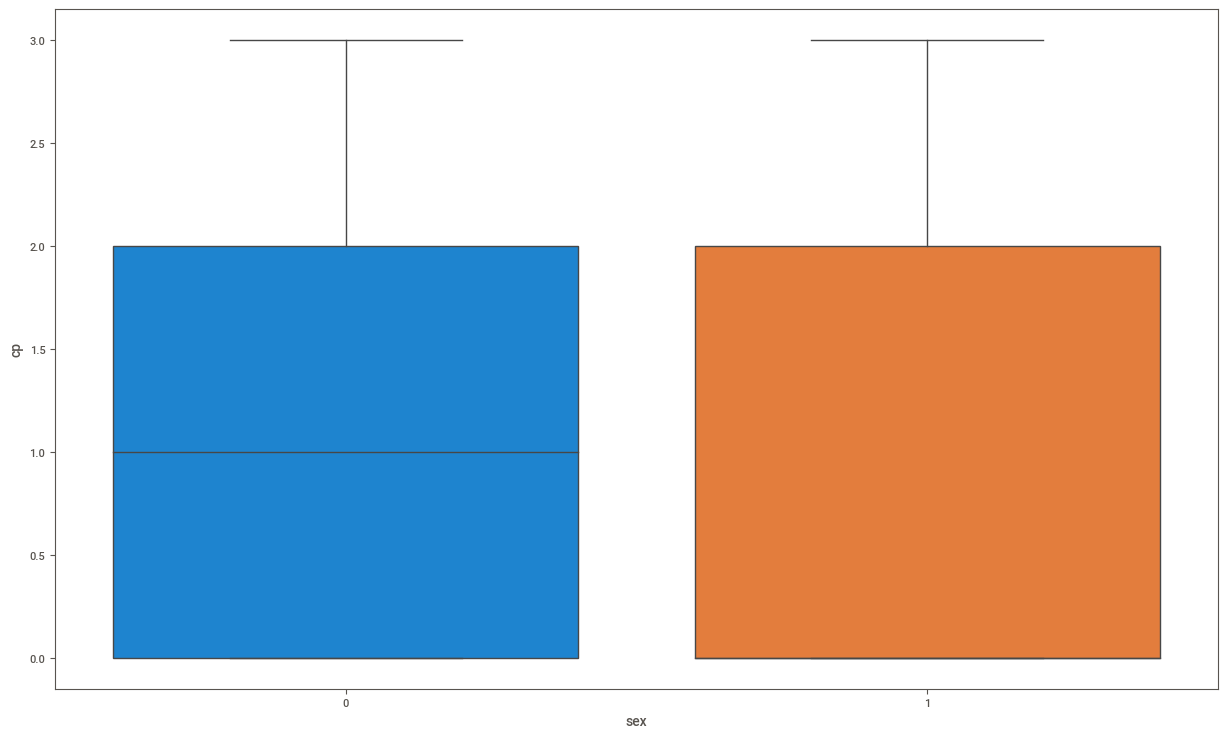

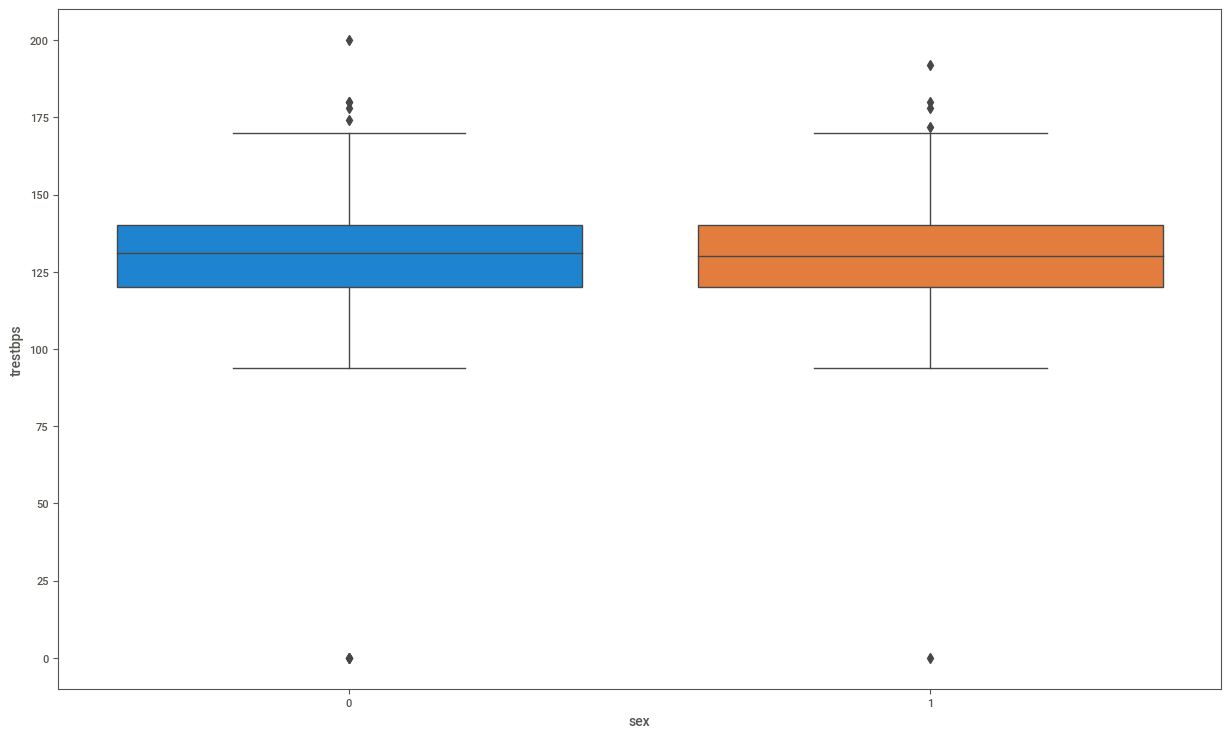

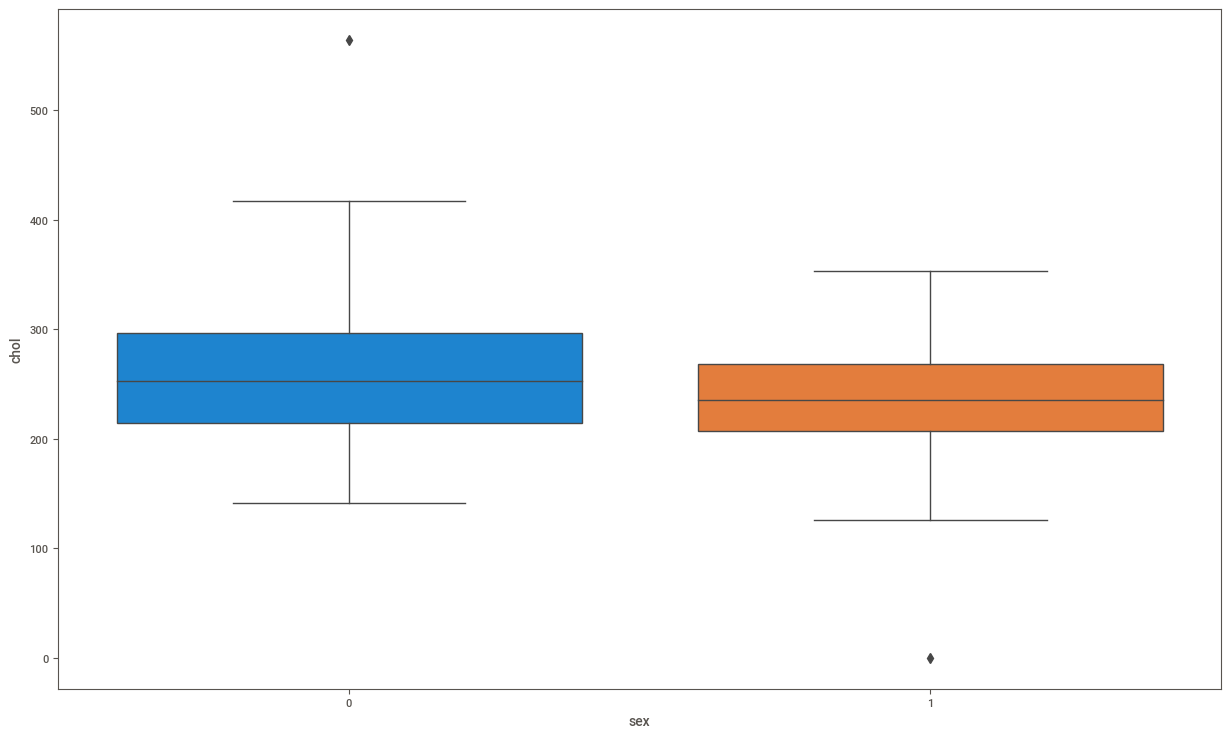

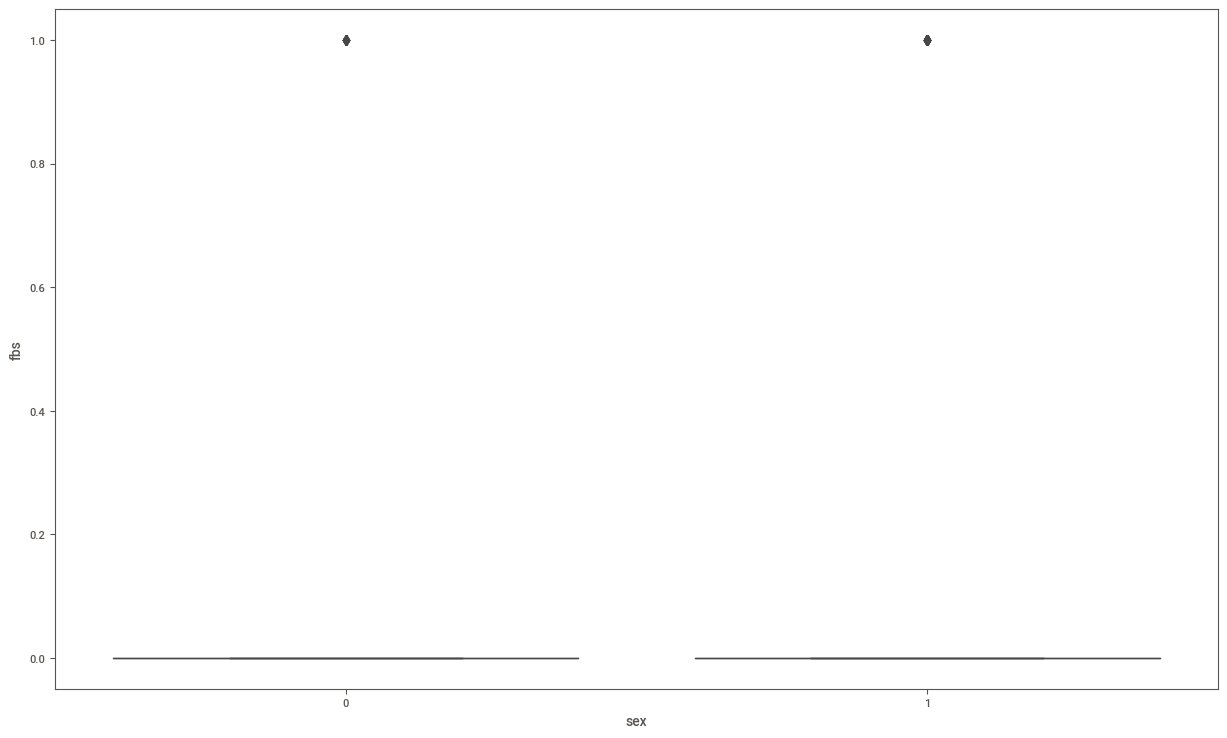

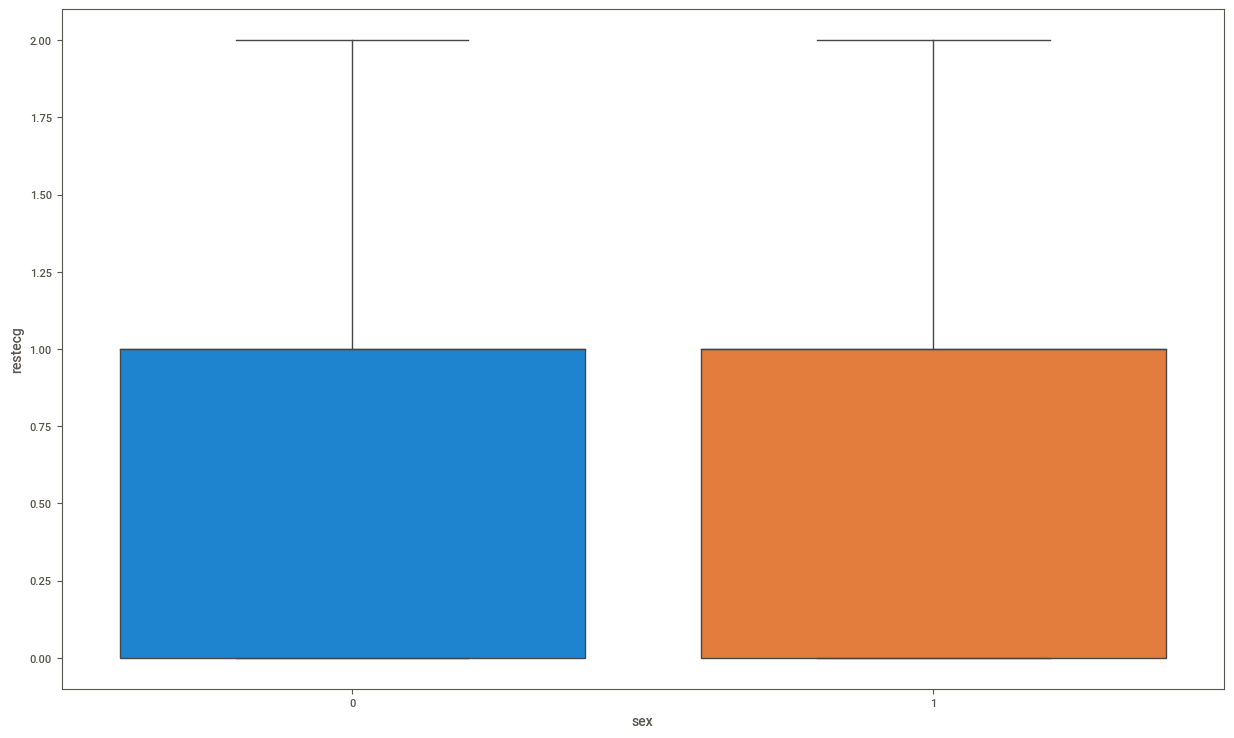

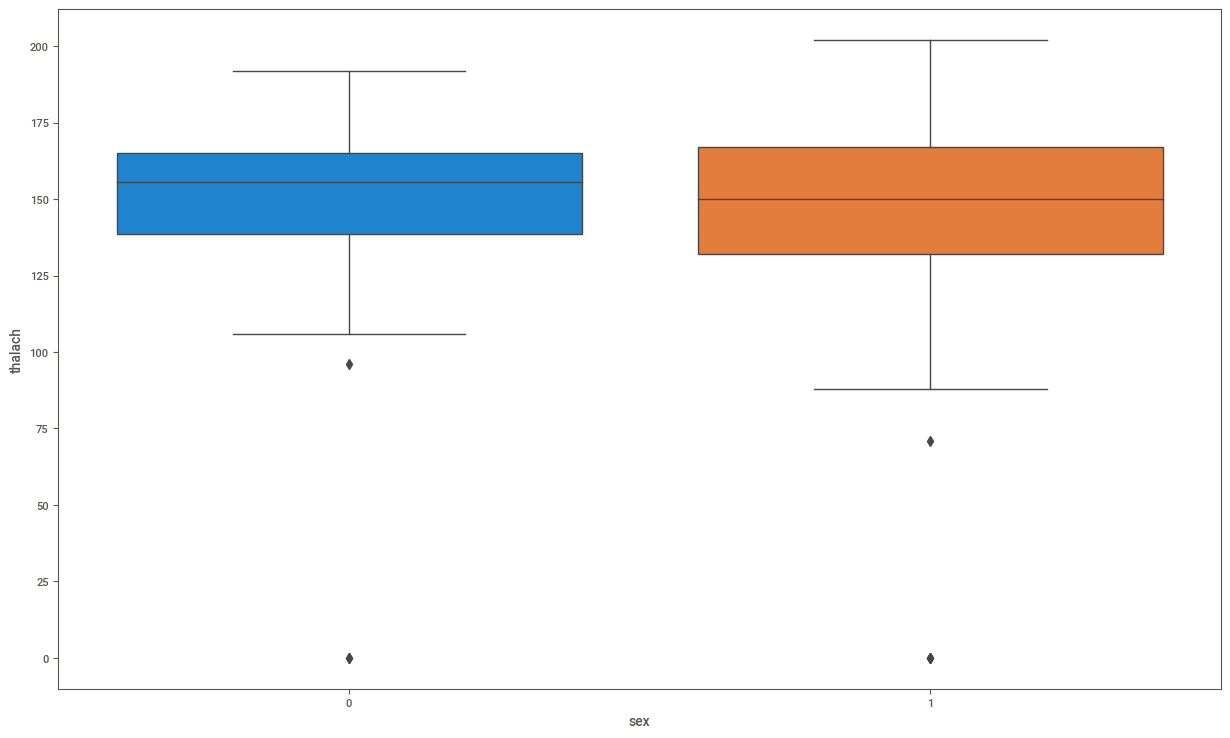

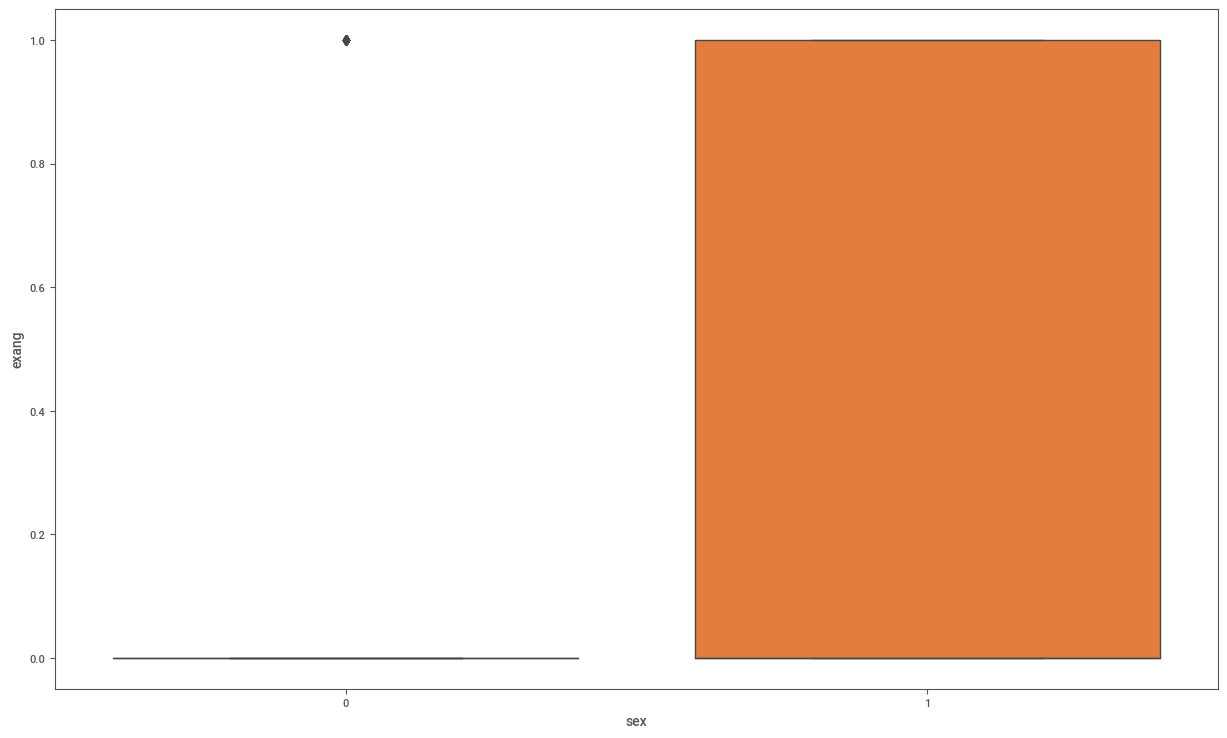

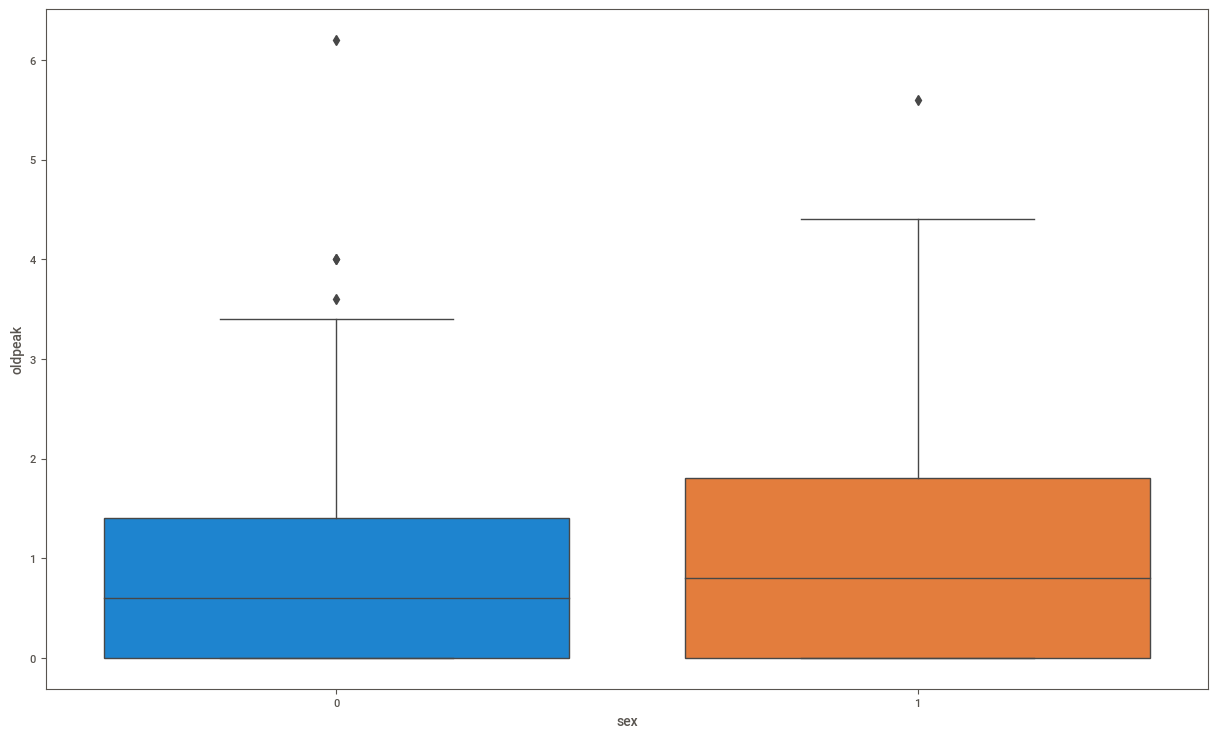

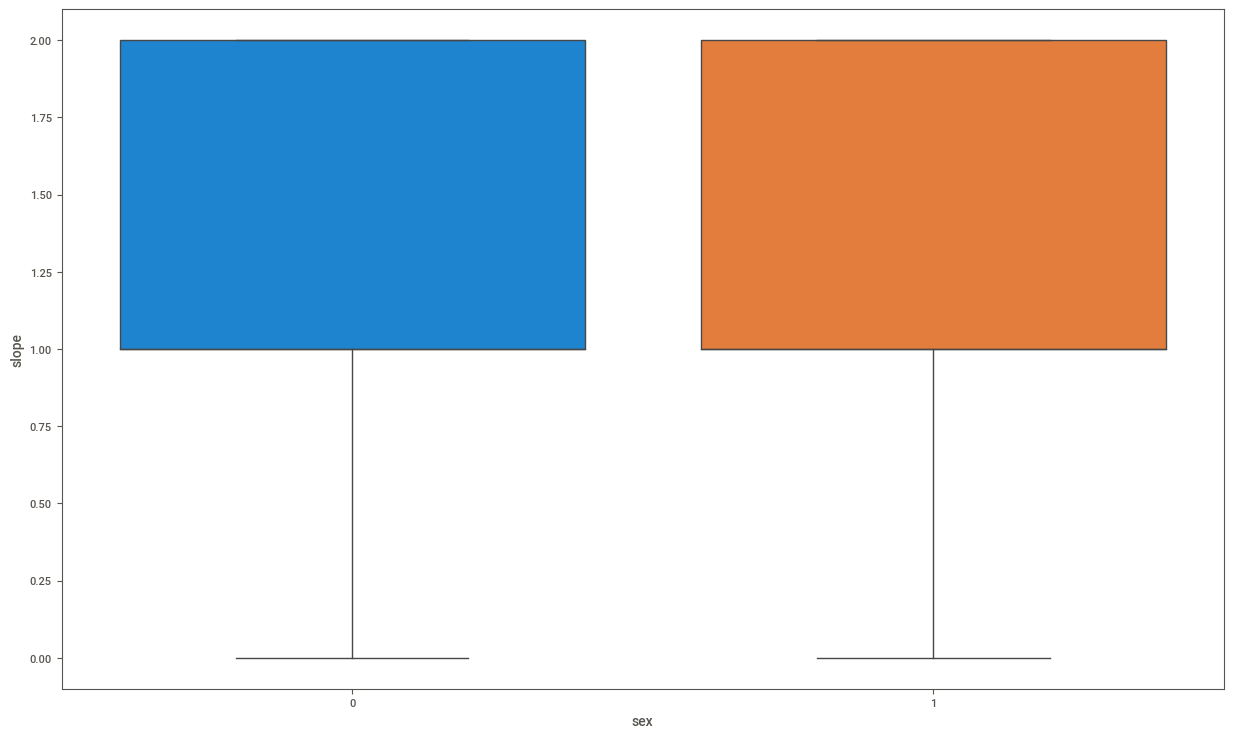

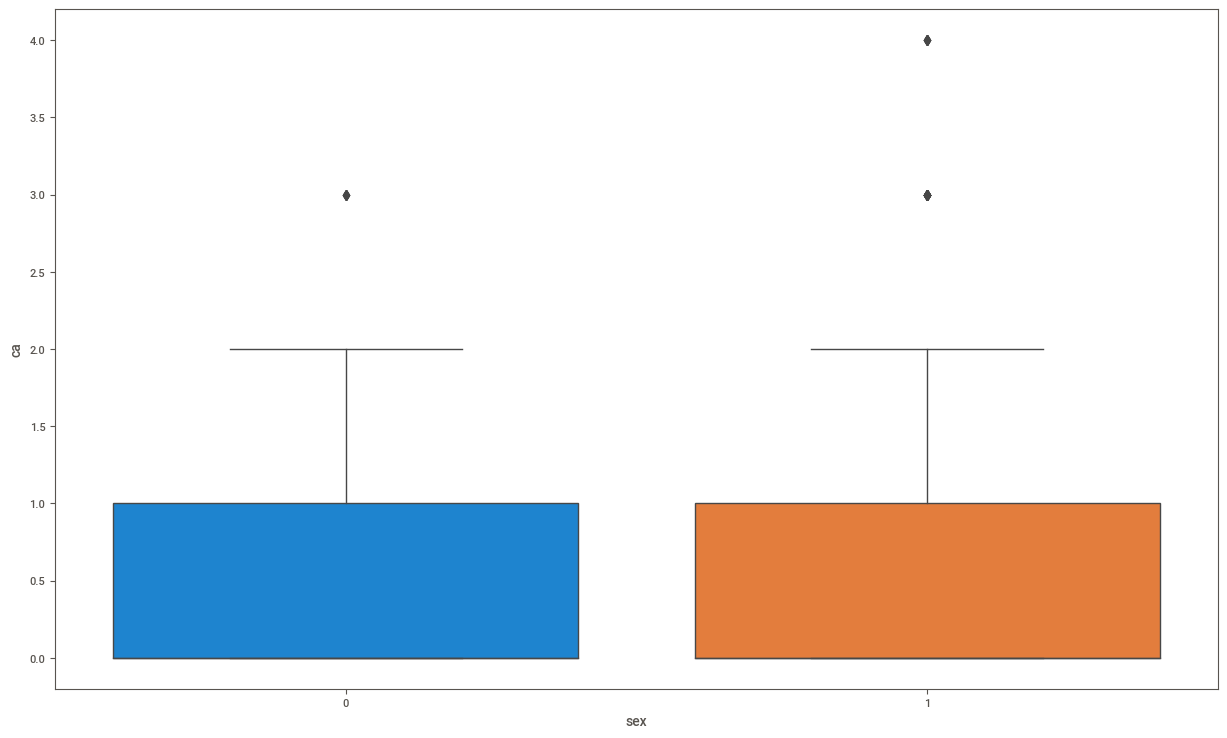

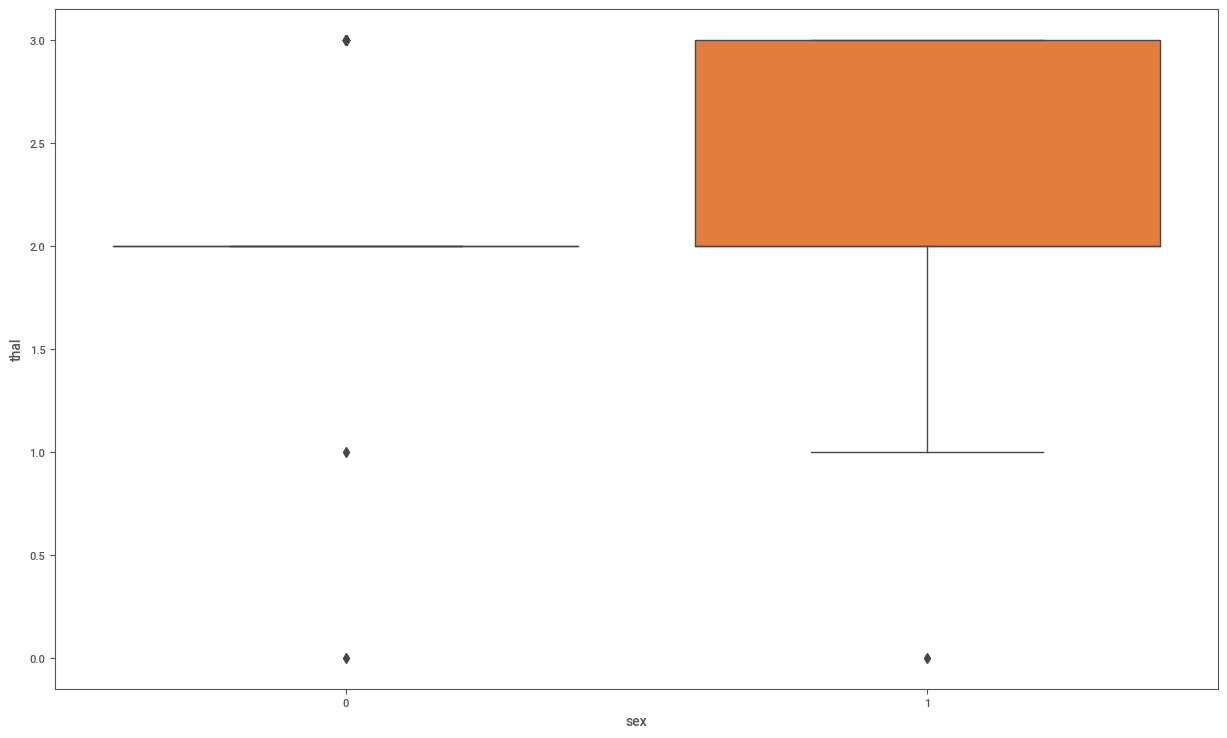

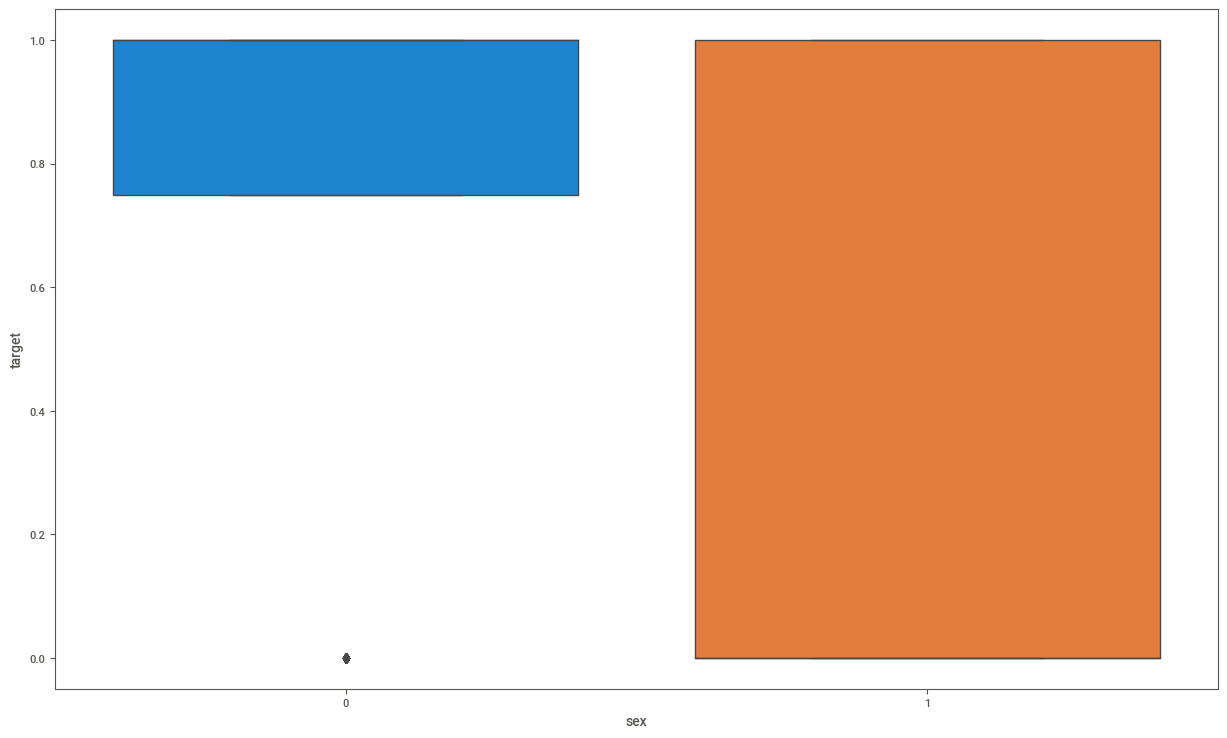

In [124]:
for i in ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']:
    plt.figure(figsize=(15,9))
    sns.boxplot(x=df.sex,y=df[i],data=df,linewidth=1)
    plt.show()

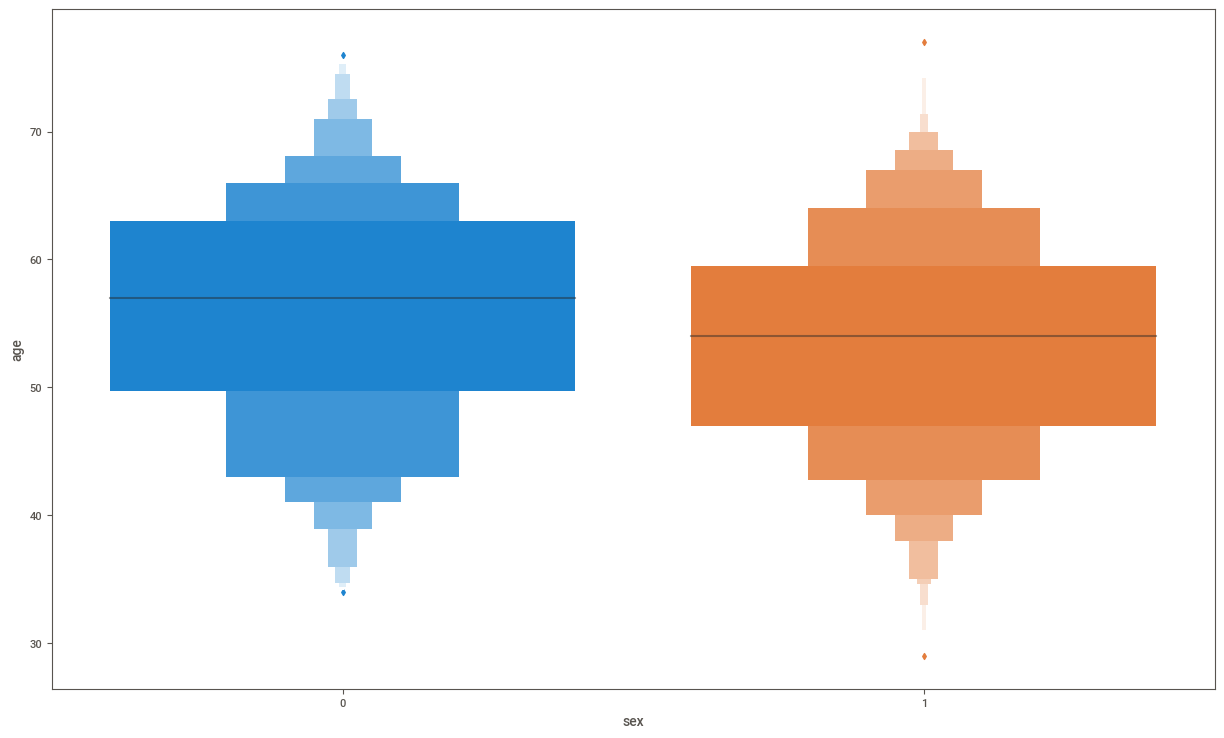

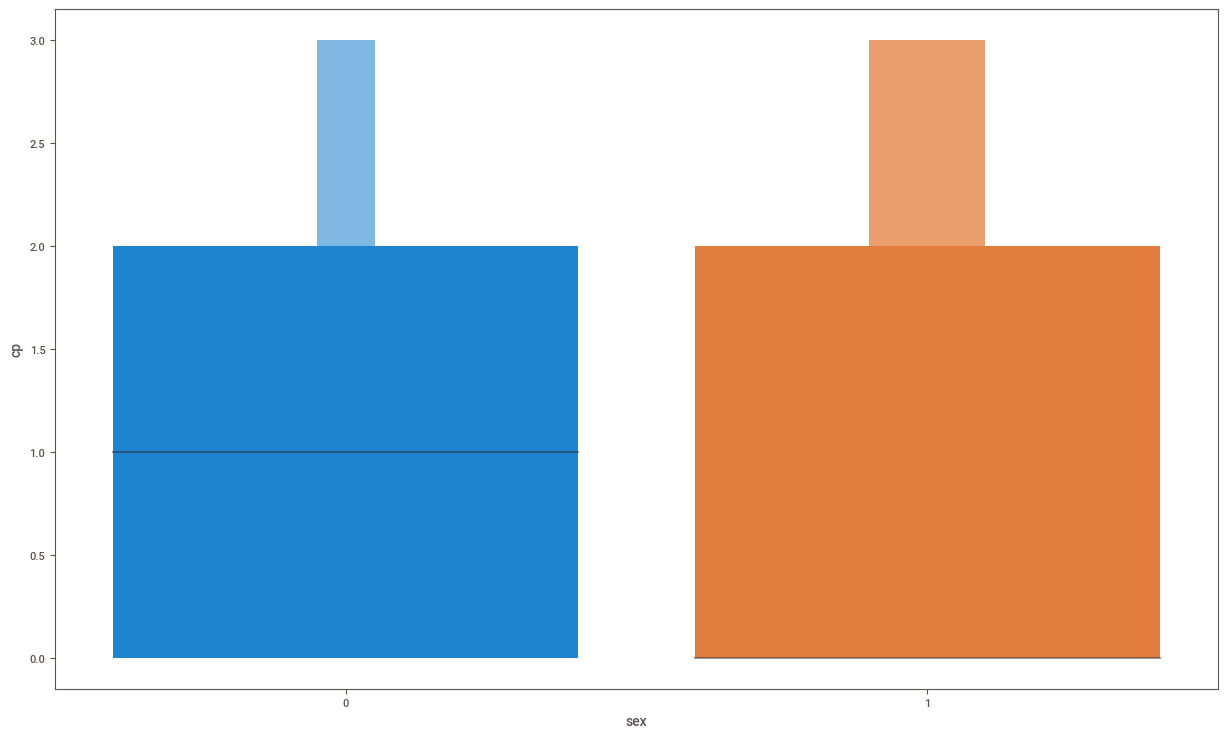

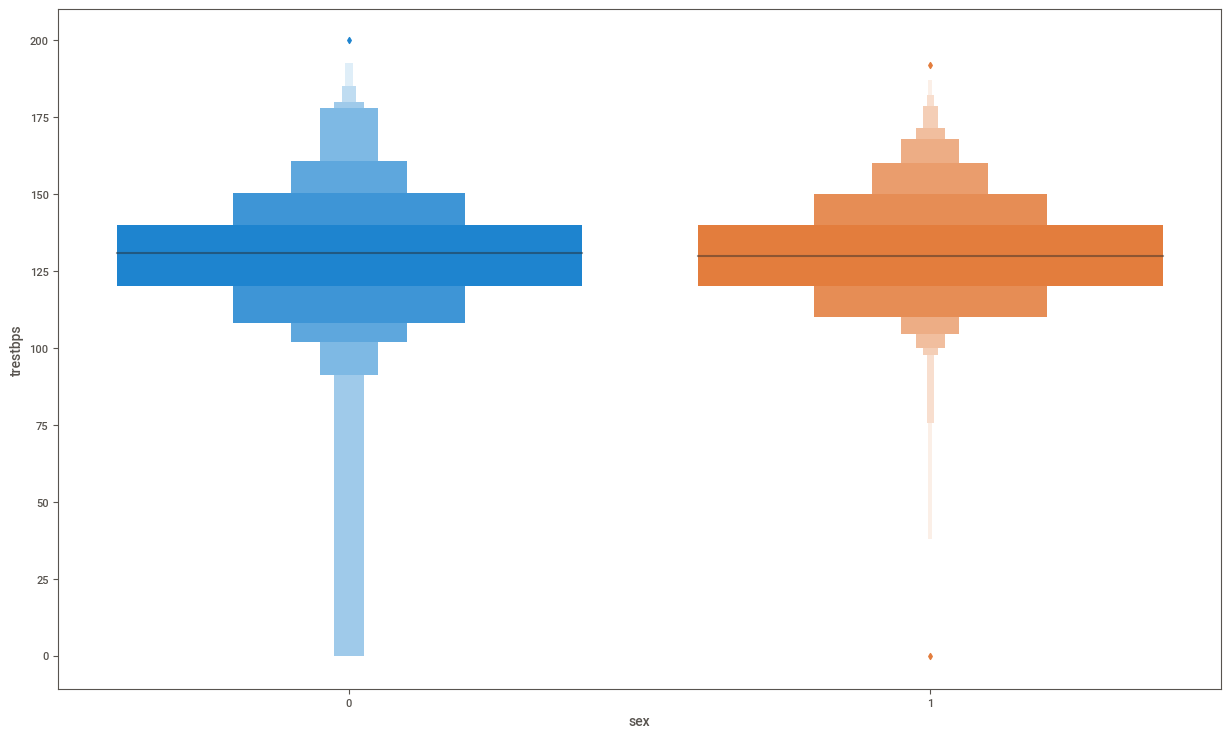

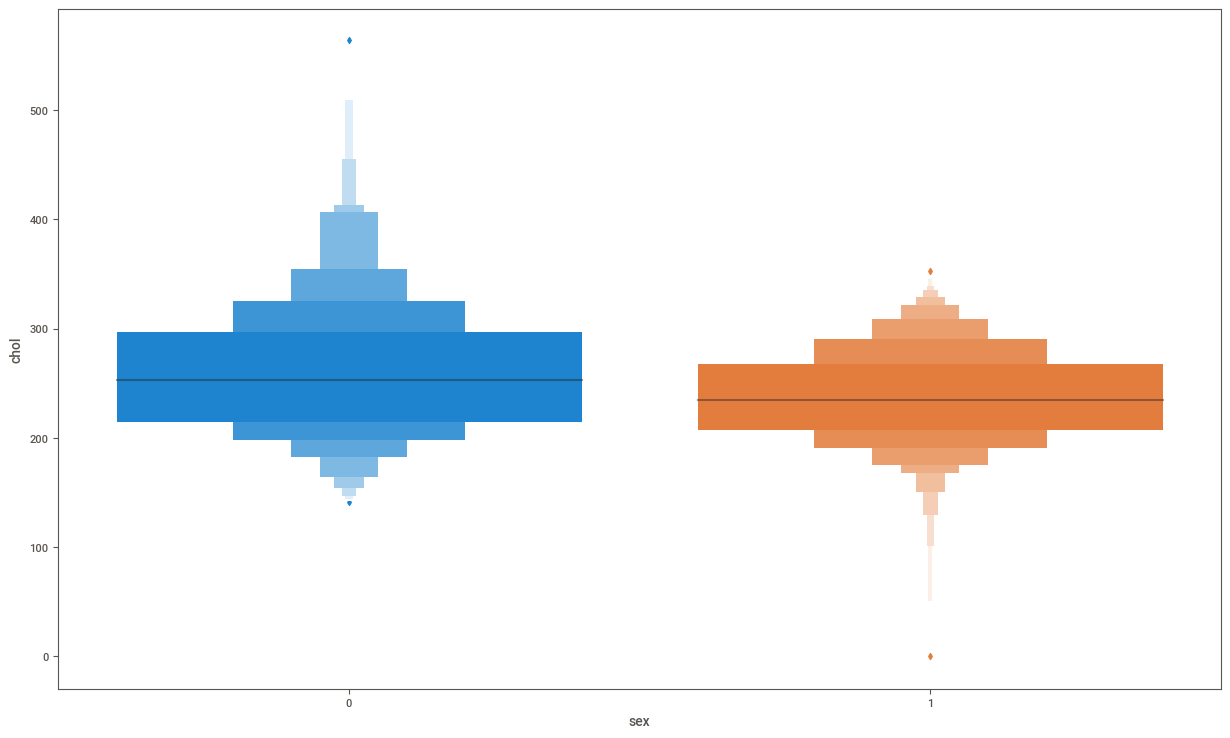

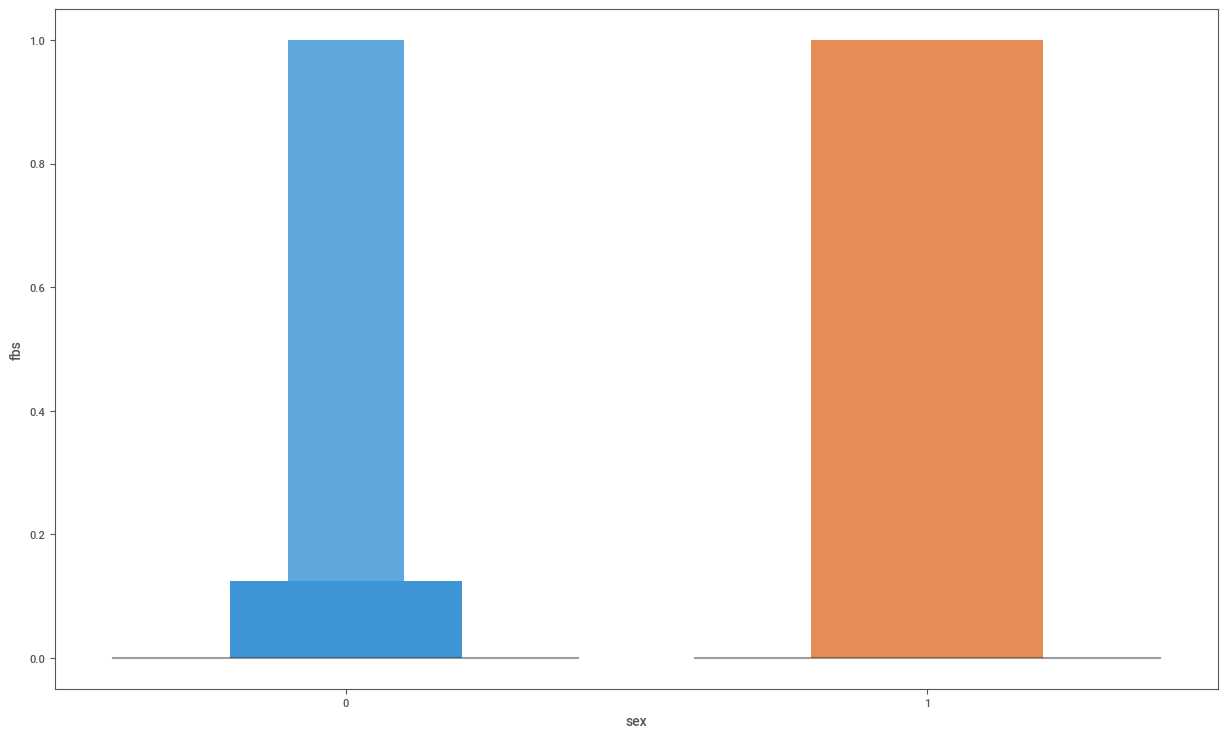

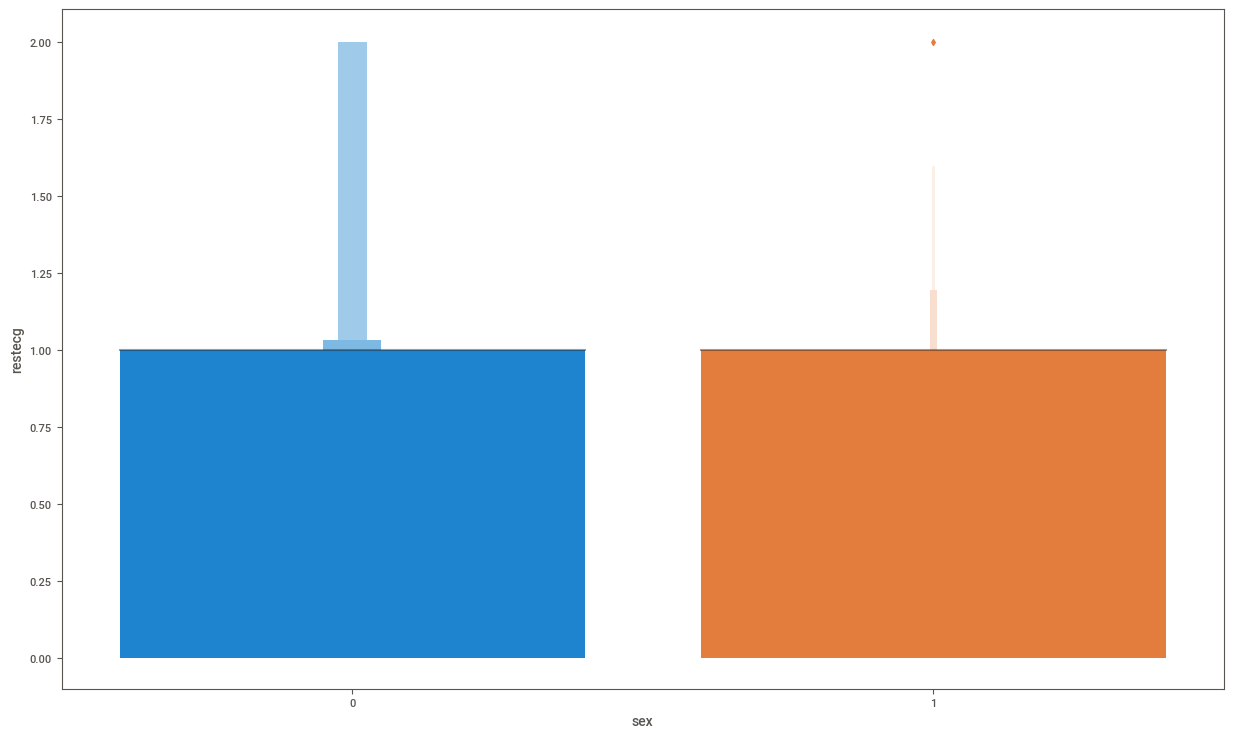

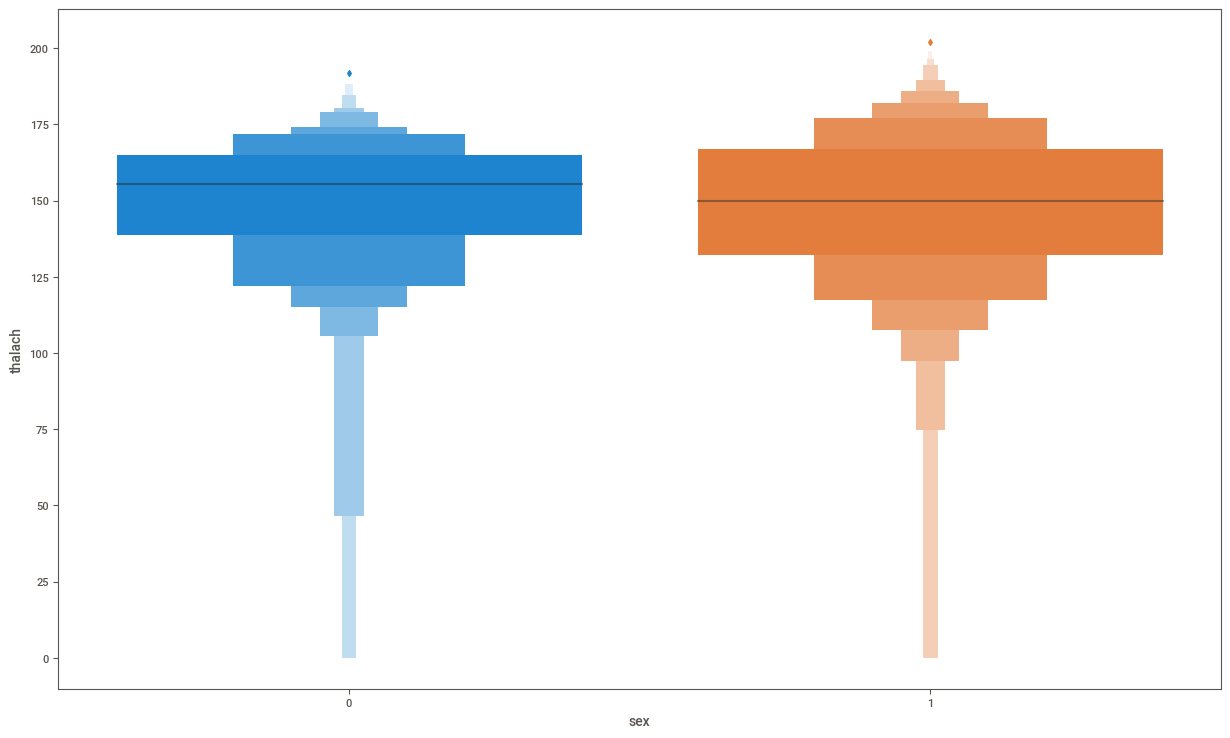

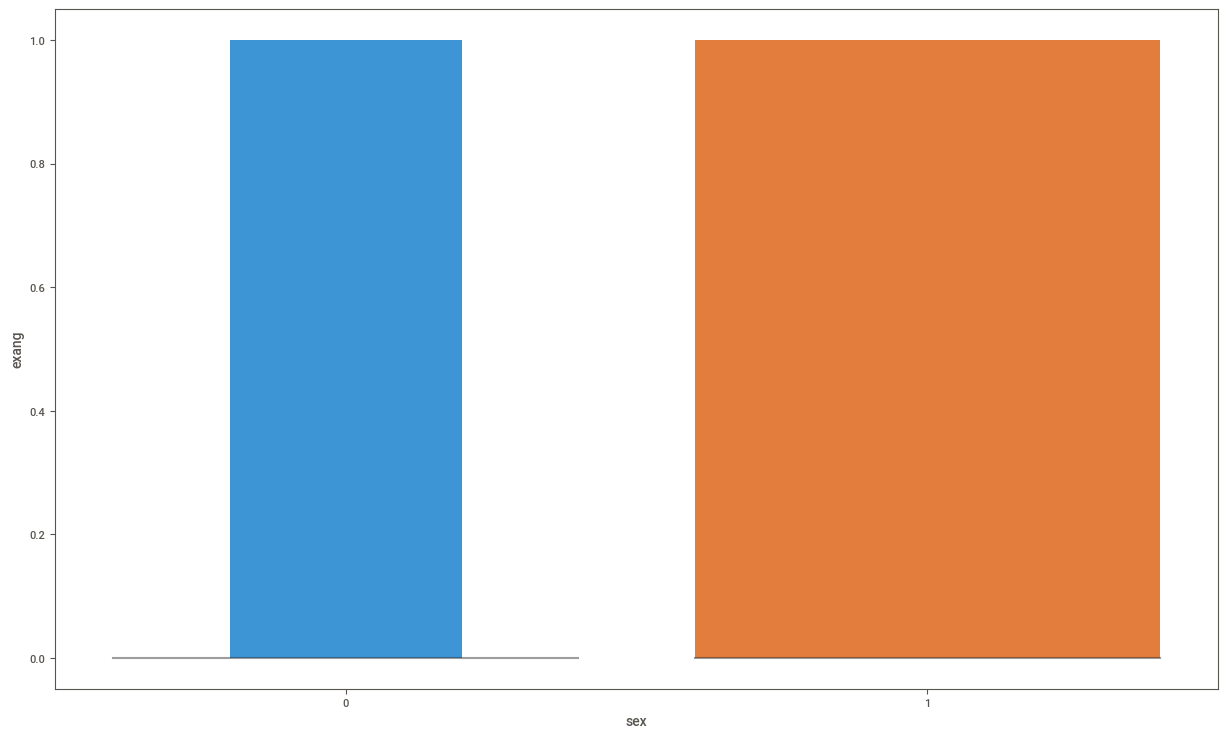

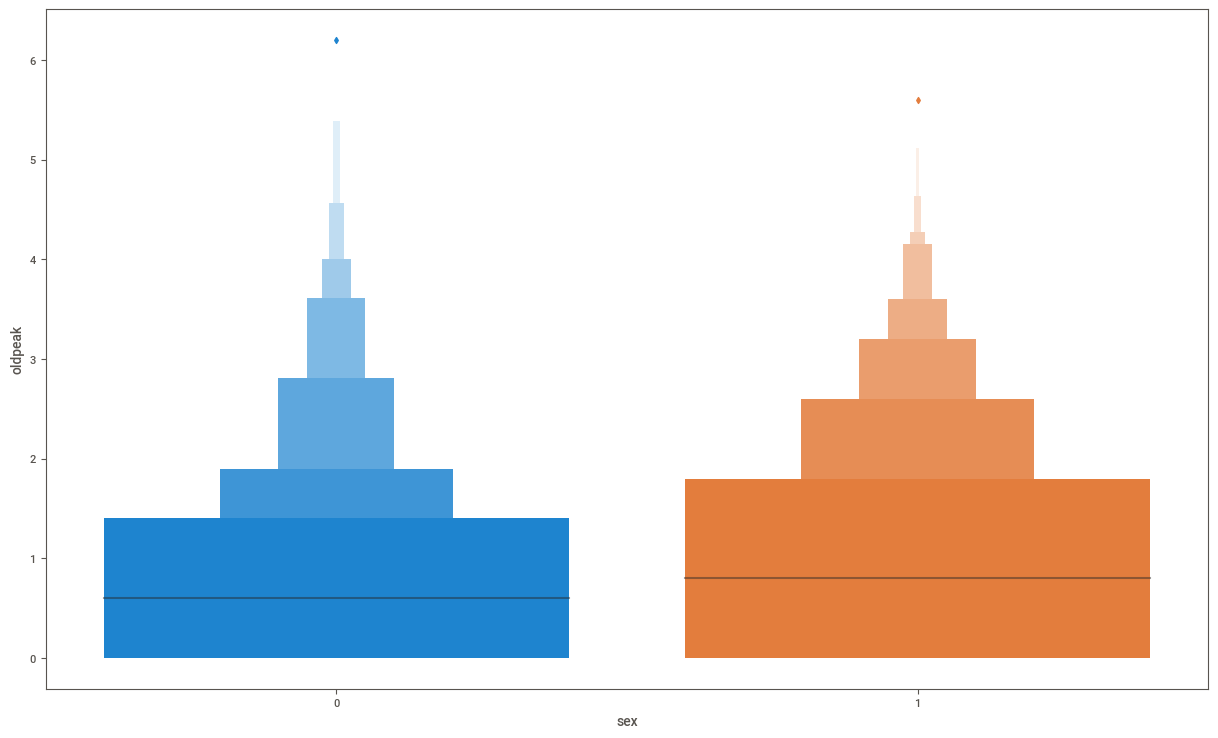

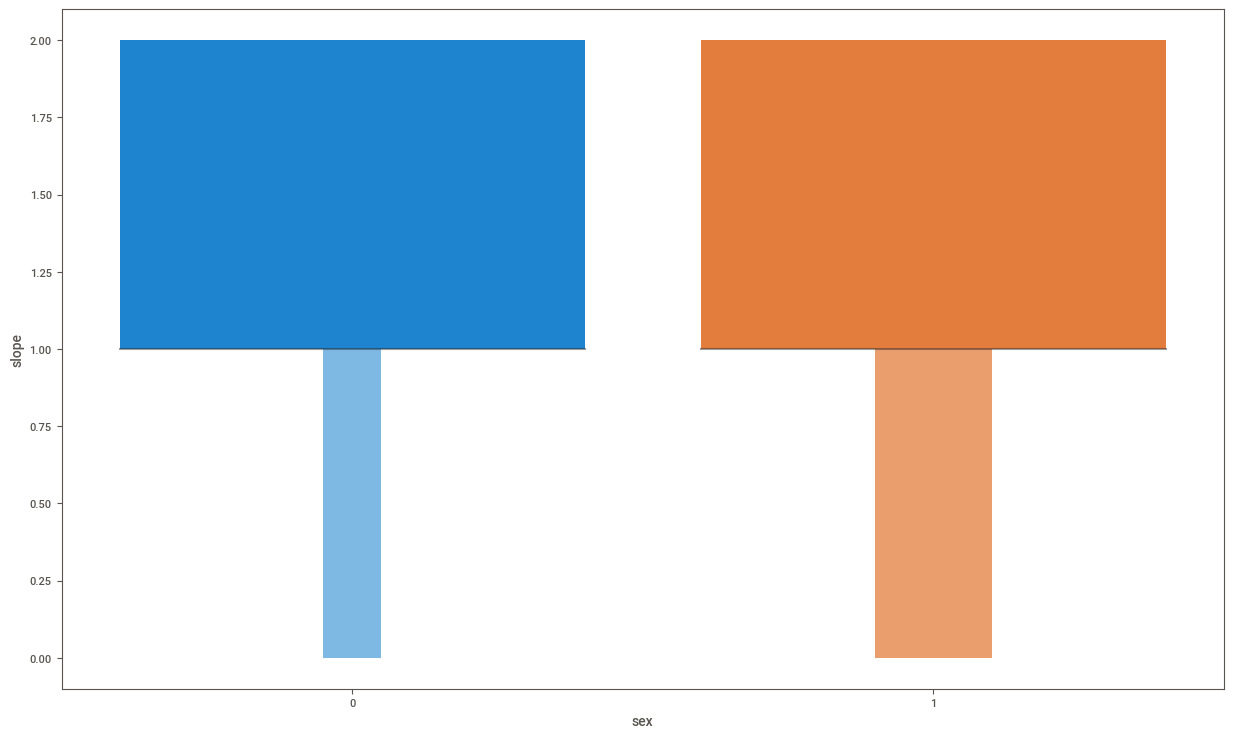

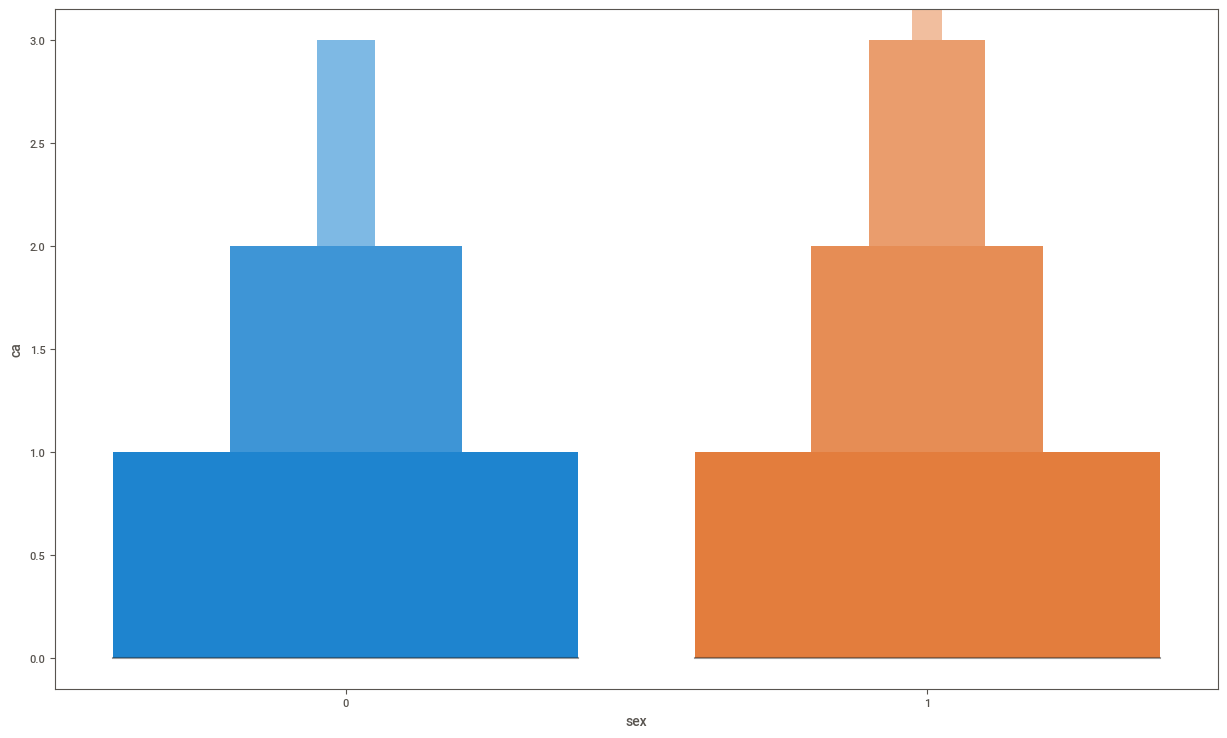

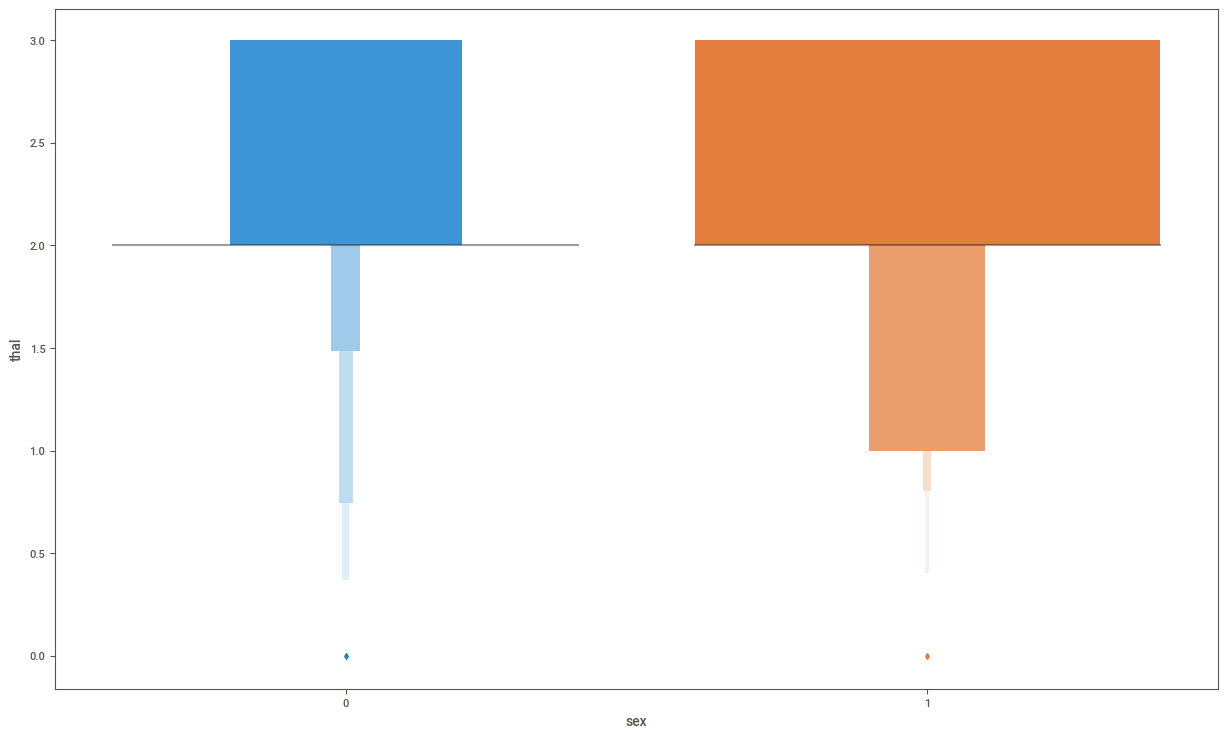

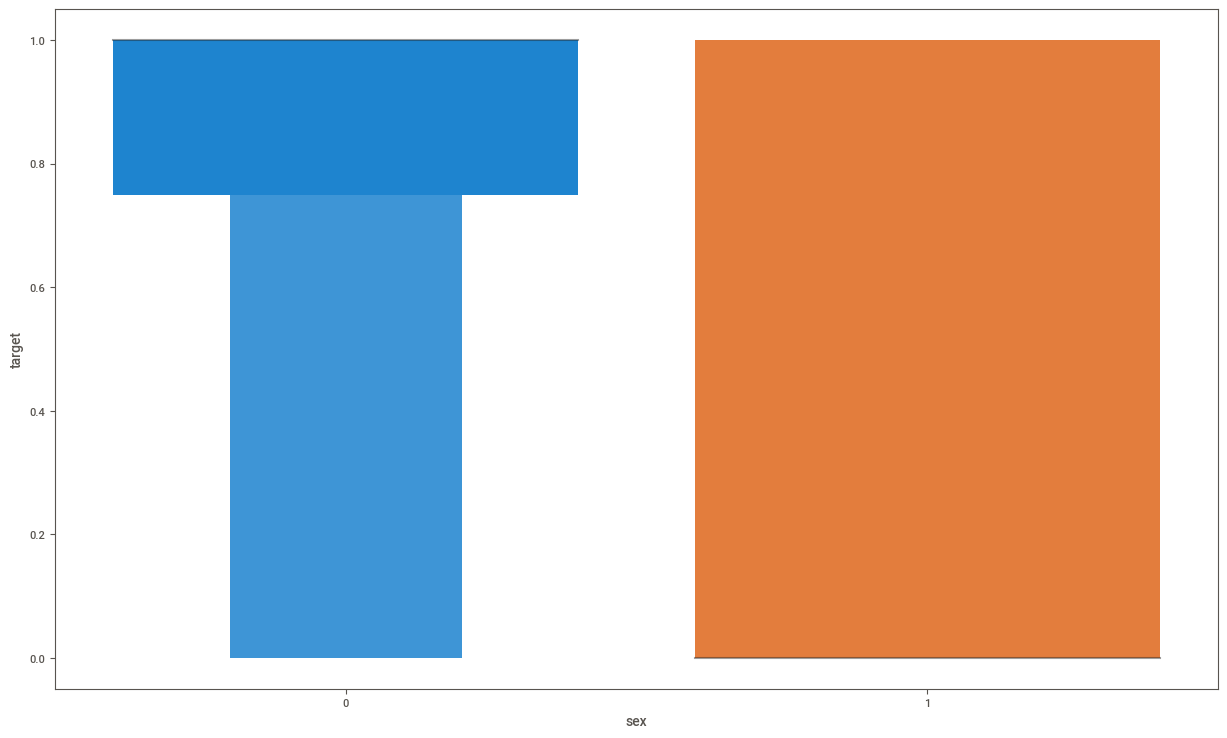

In [125]:
for i in ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']:
    plt.figure(figsize=(15,9))
    sns.boxenplot(x=df.sex,y=df[i],data=df,linewidth=1)
    plt.show()

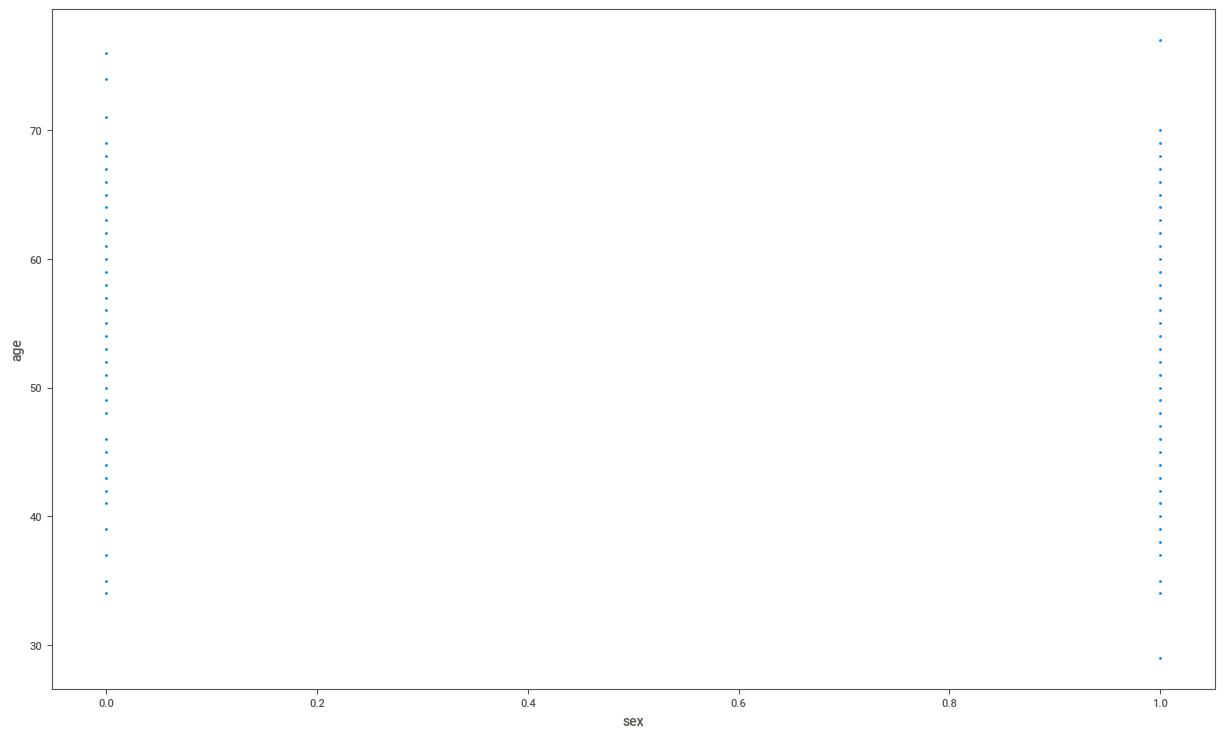

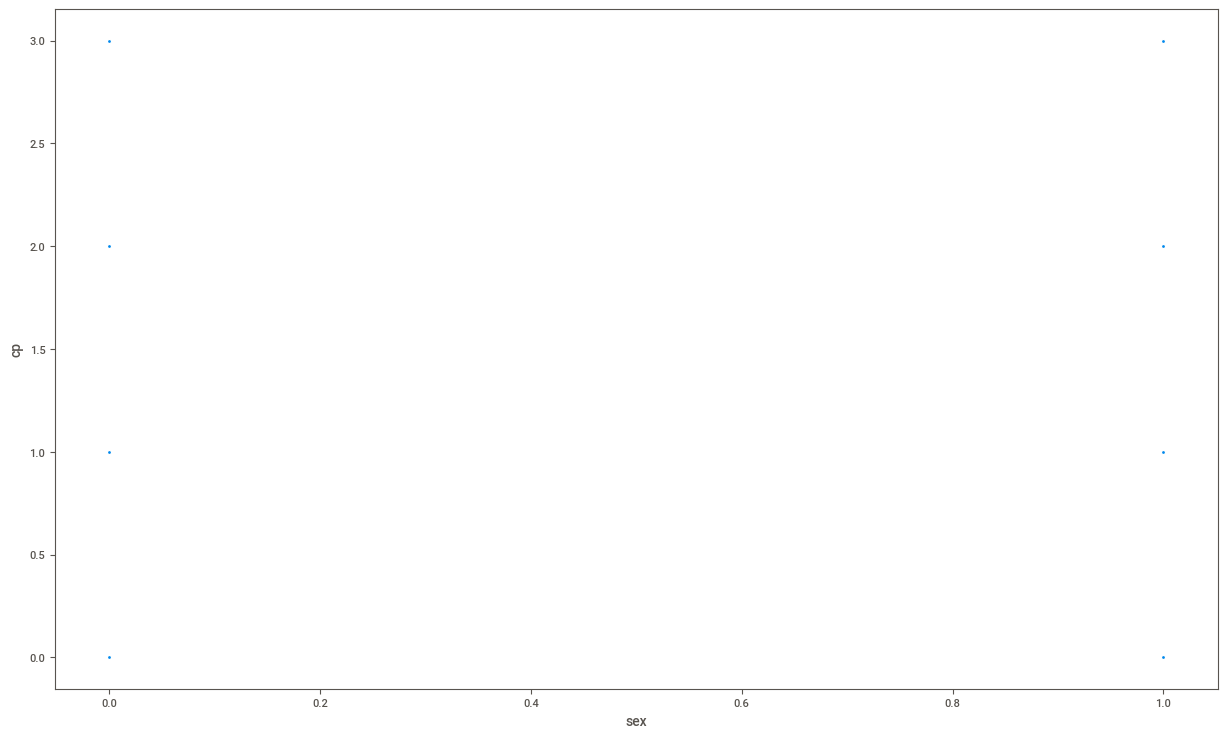

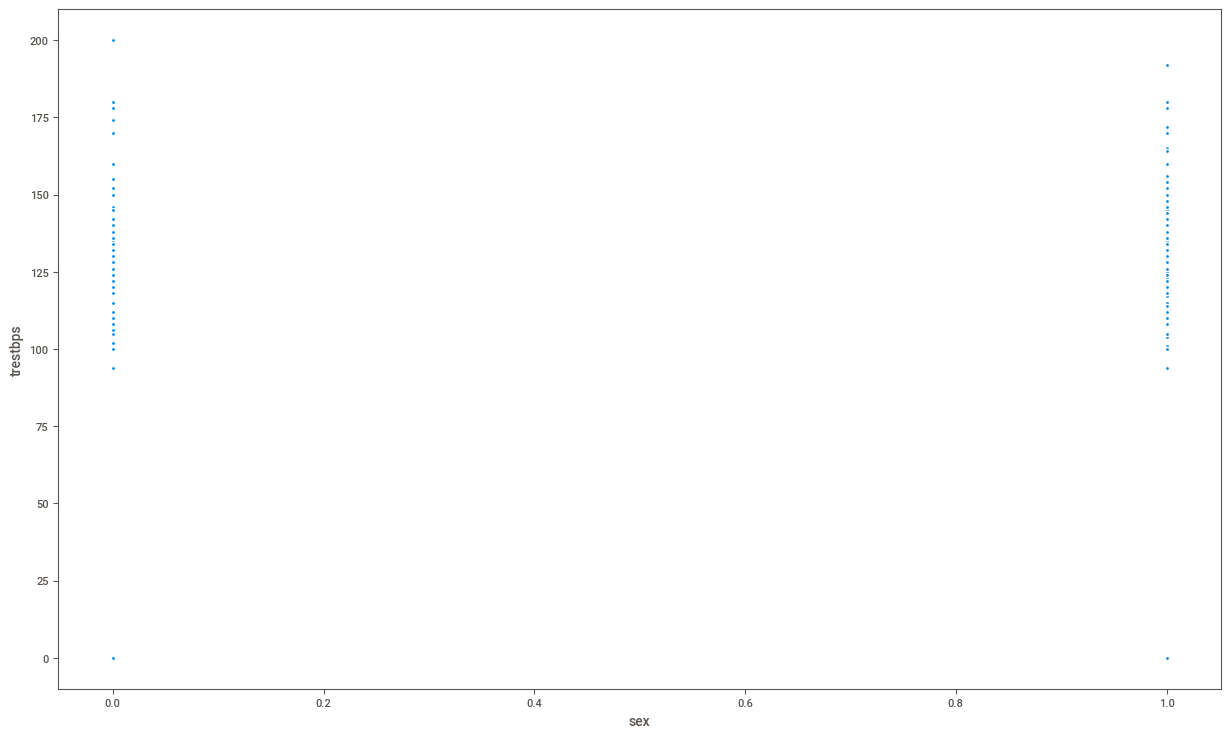

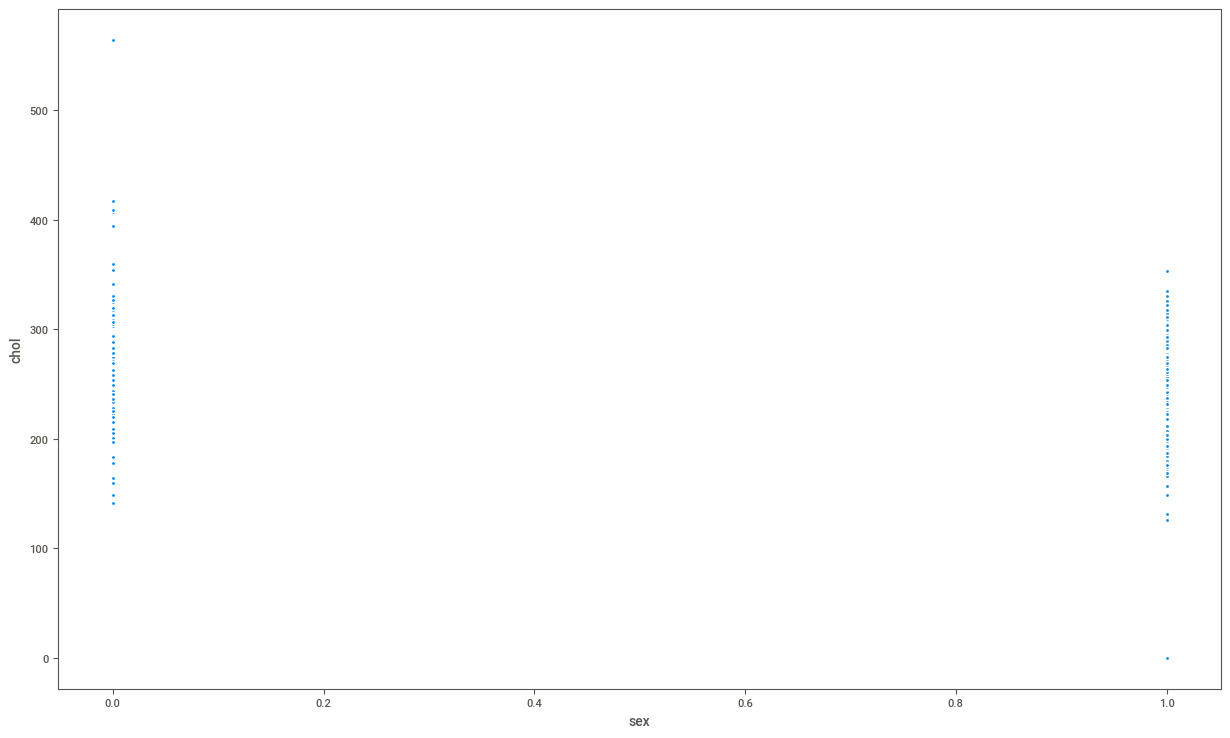

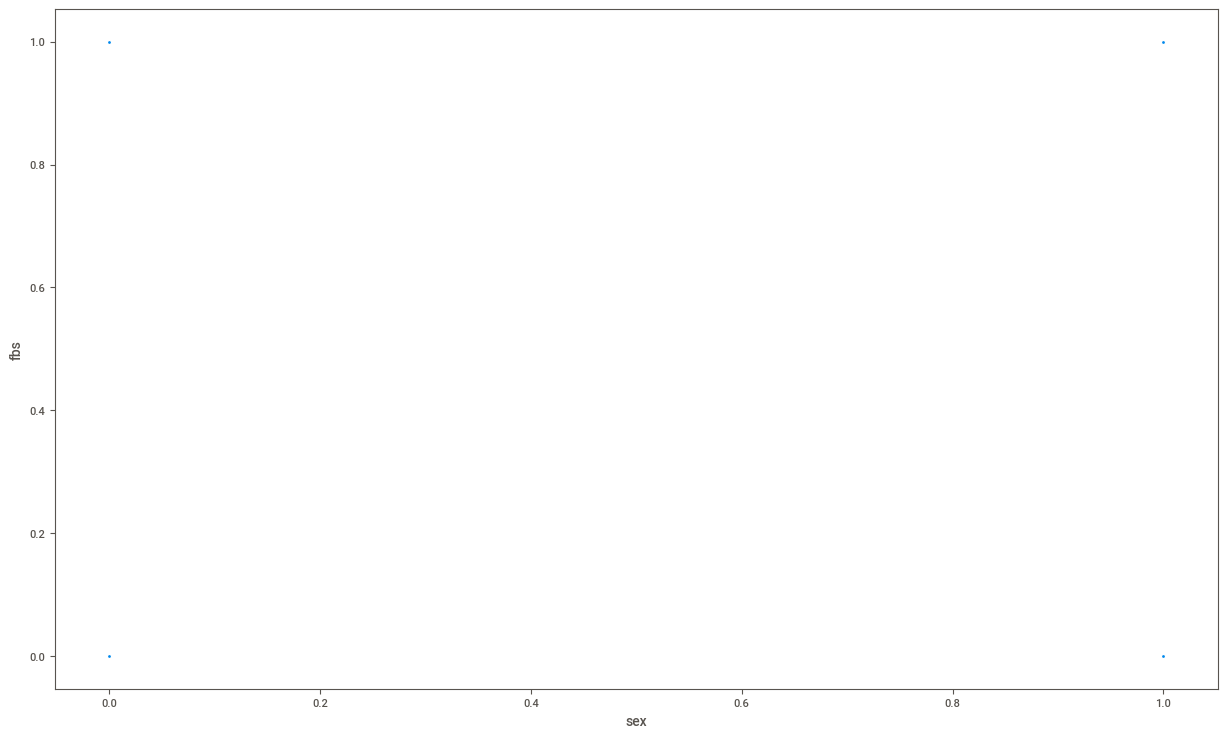

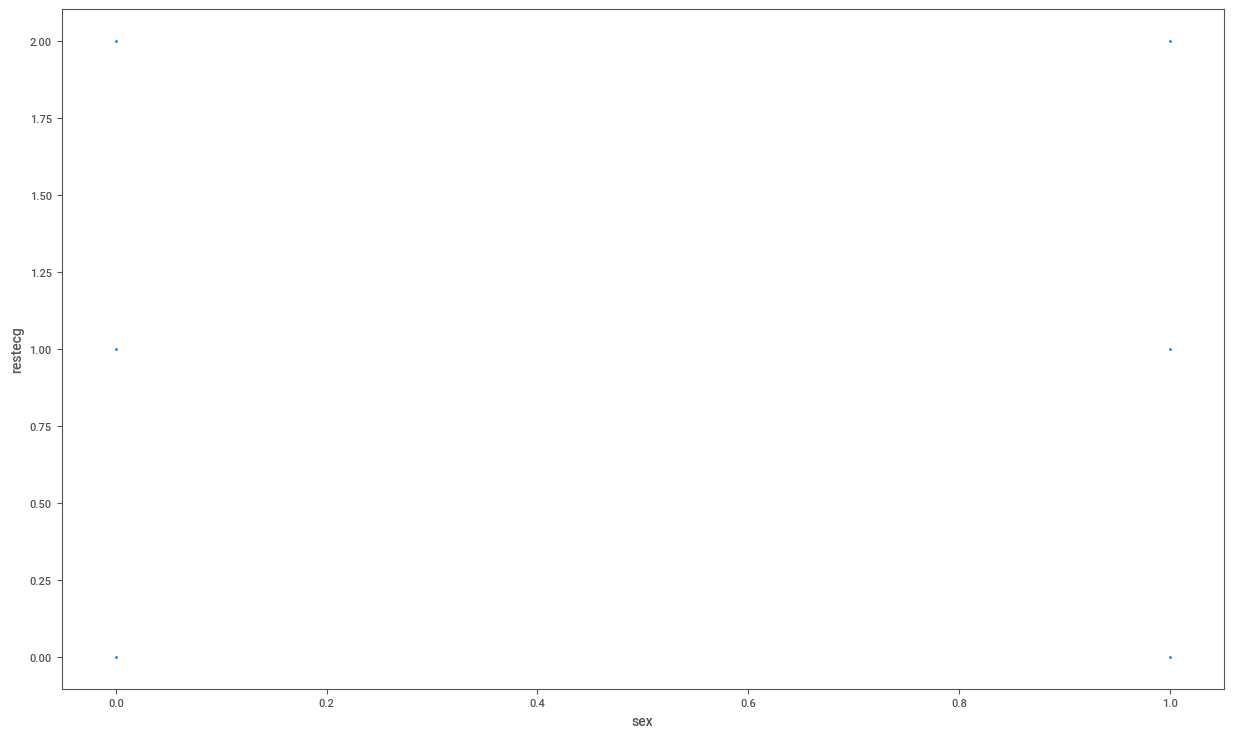

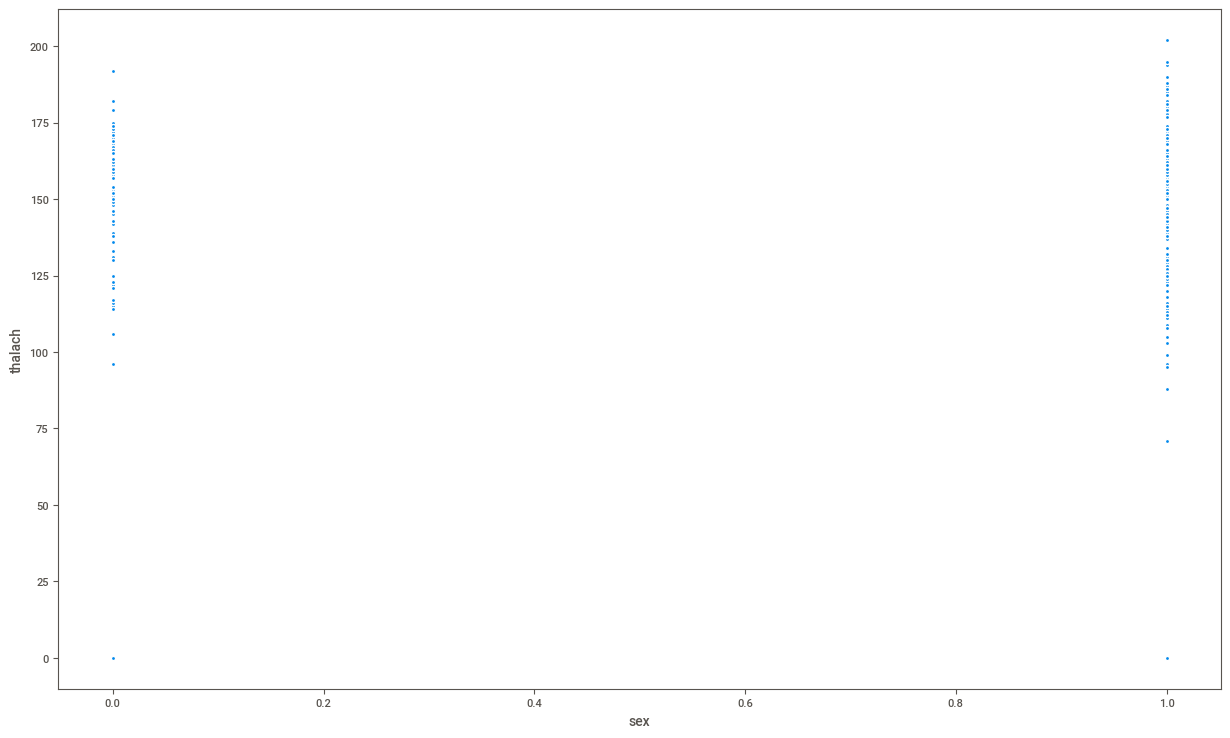

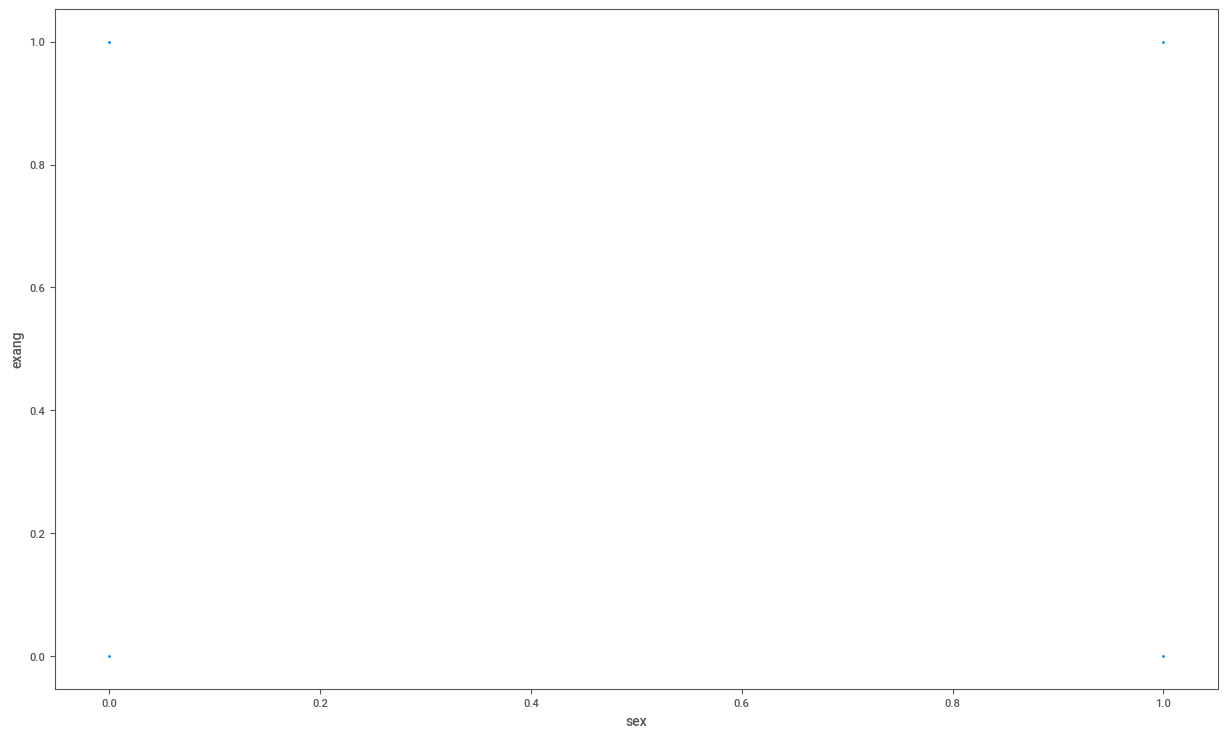

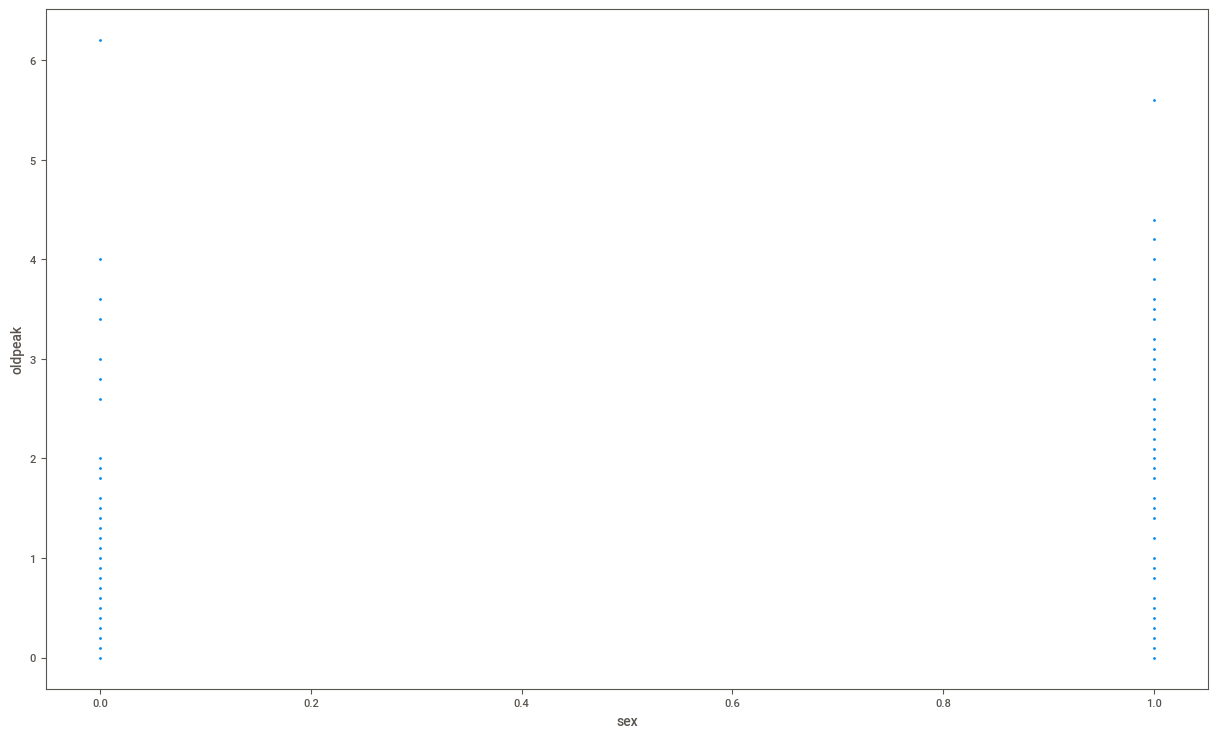

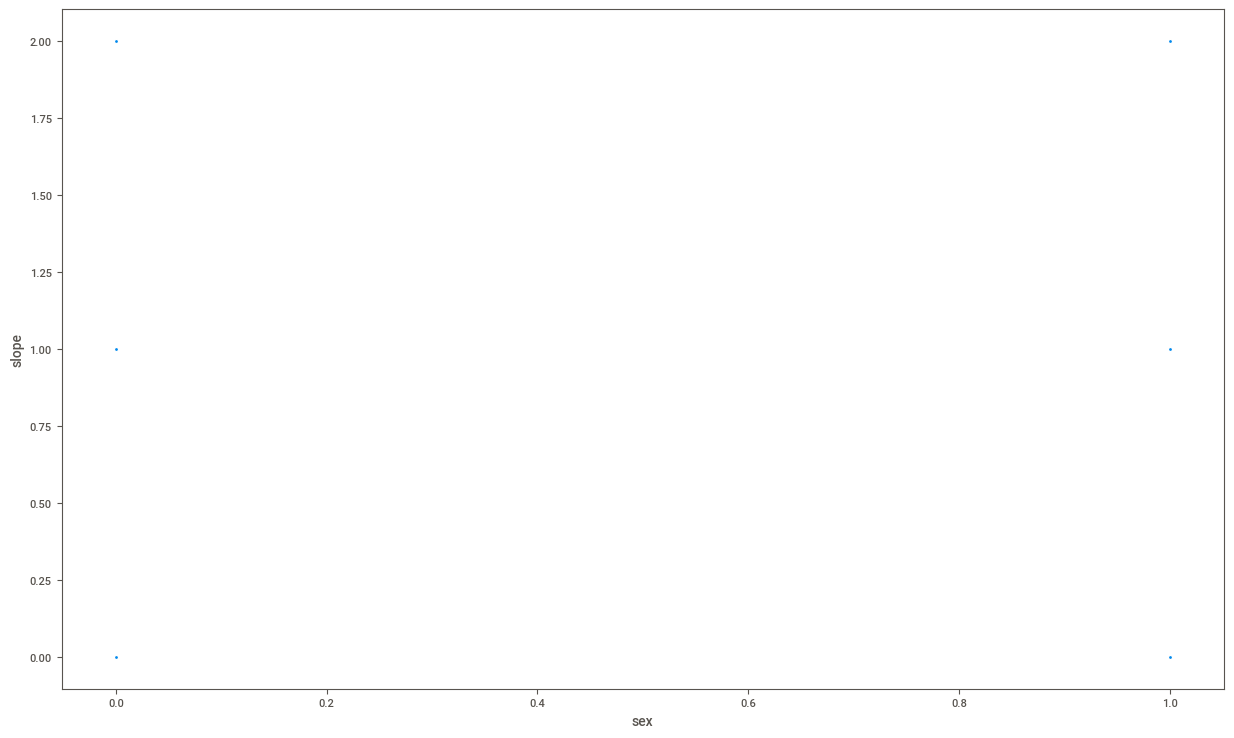

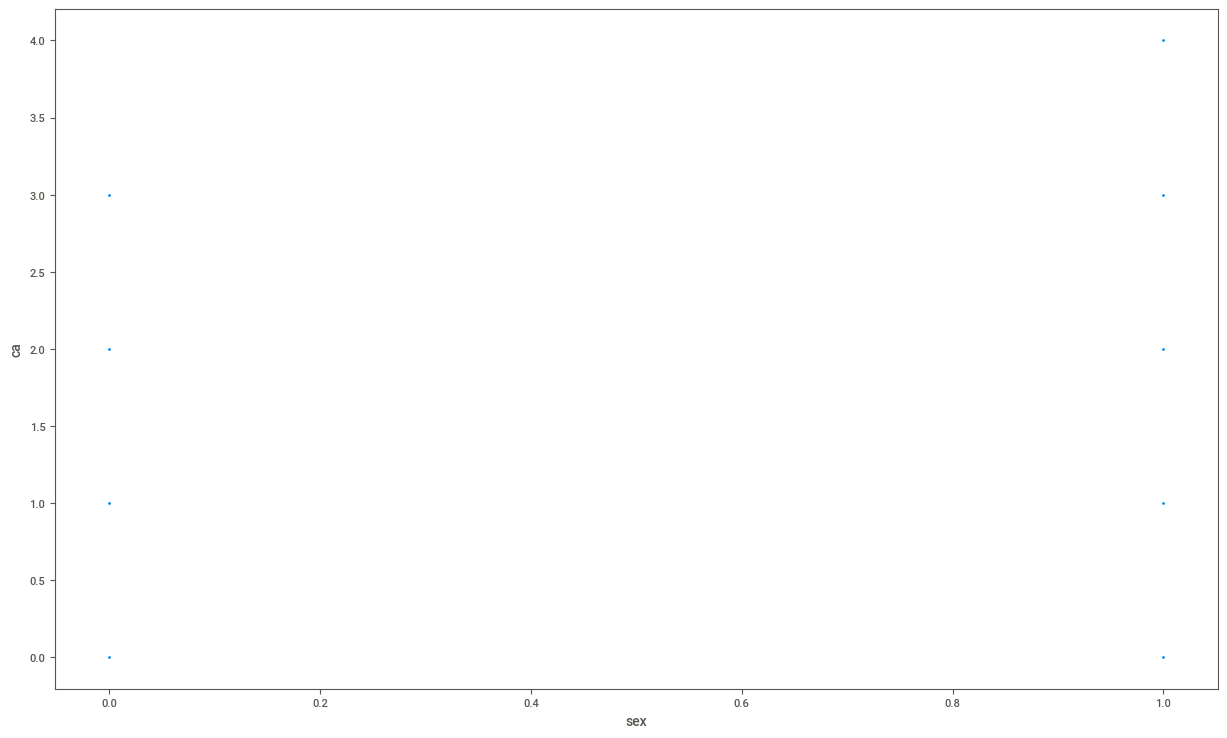

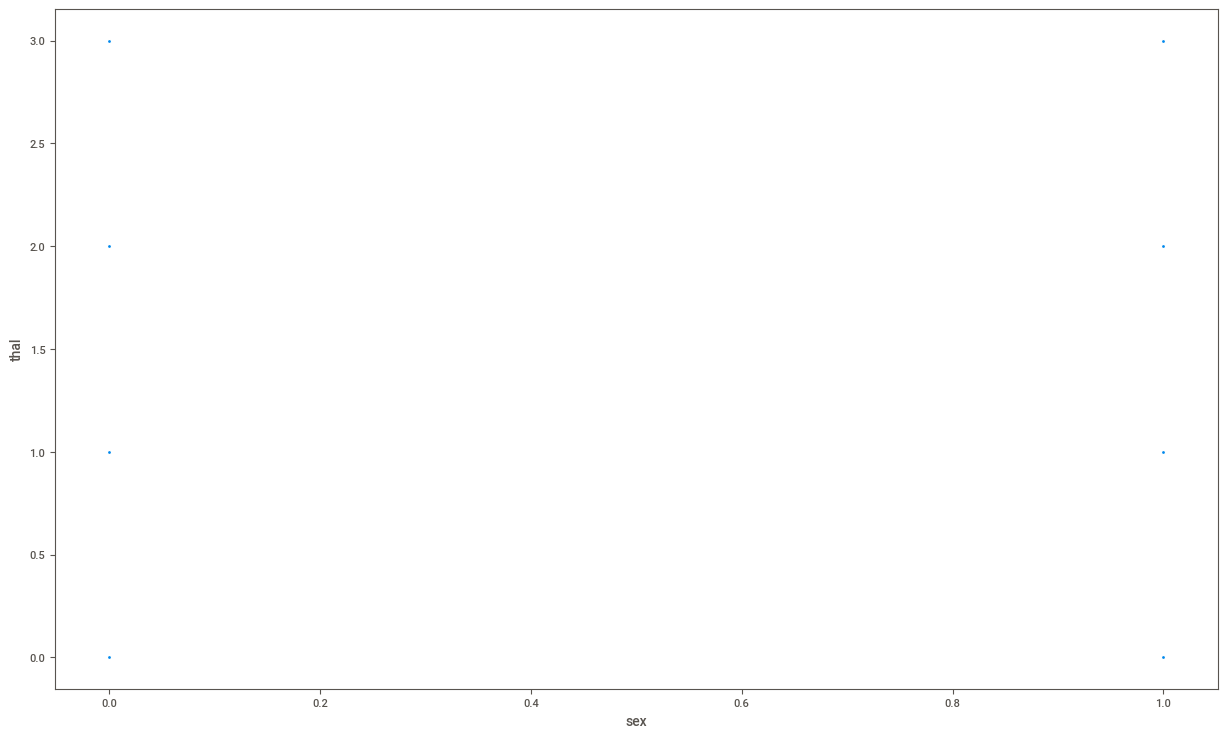

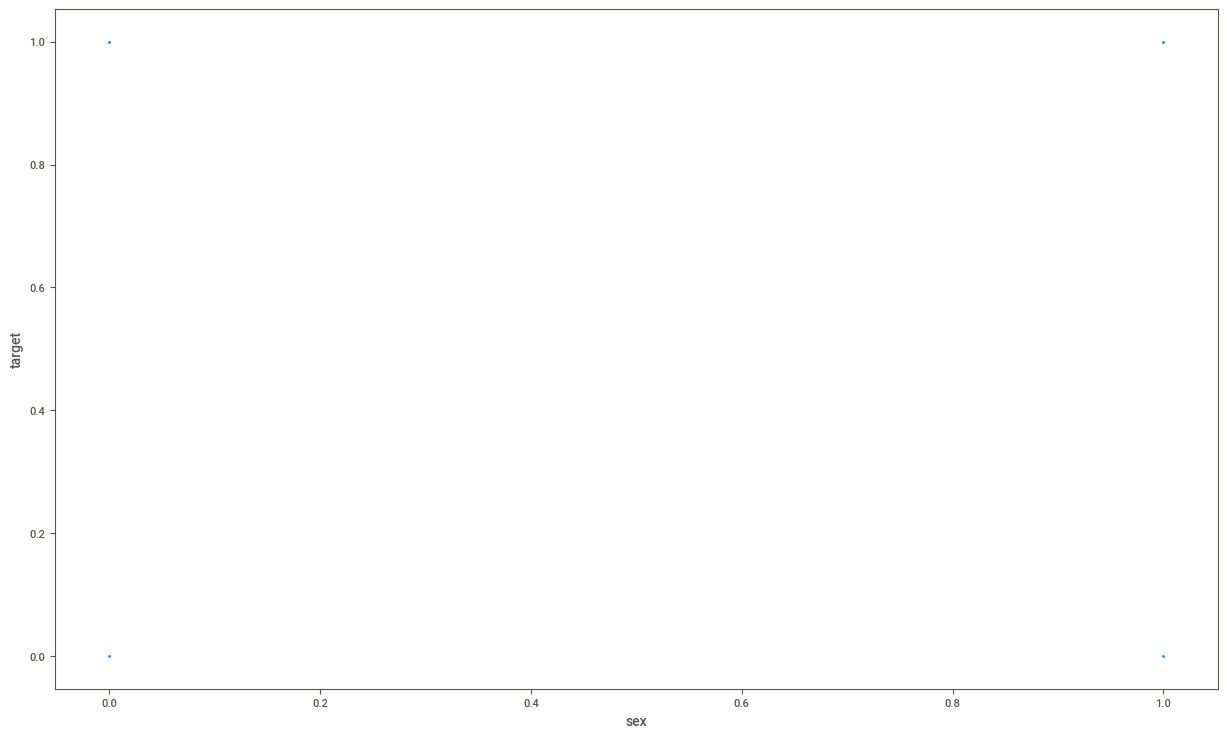

In [126]:
for i in ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']:
    plt.figure(figsize=(15,9))
    sns.scatterplot(x=df.sex,y=df[i],data=df,linewidth=1)
    plt.show()

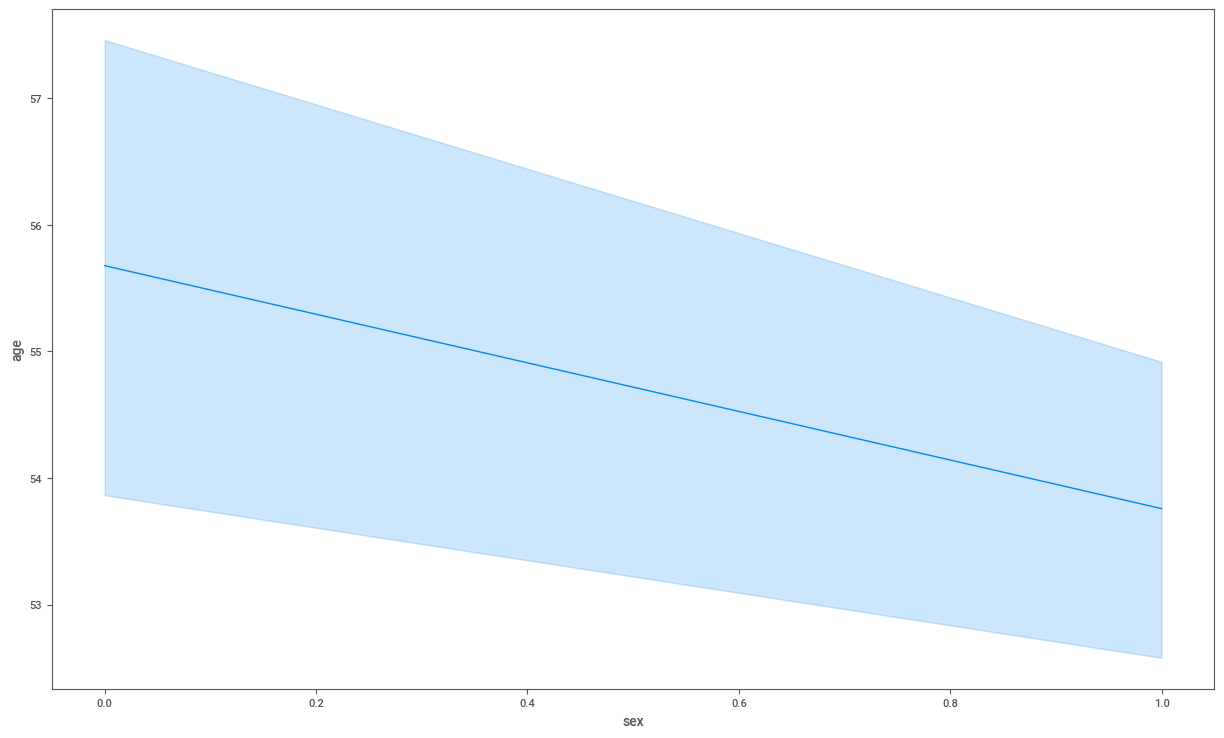

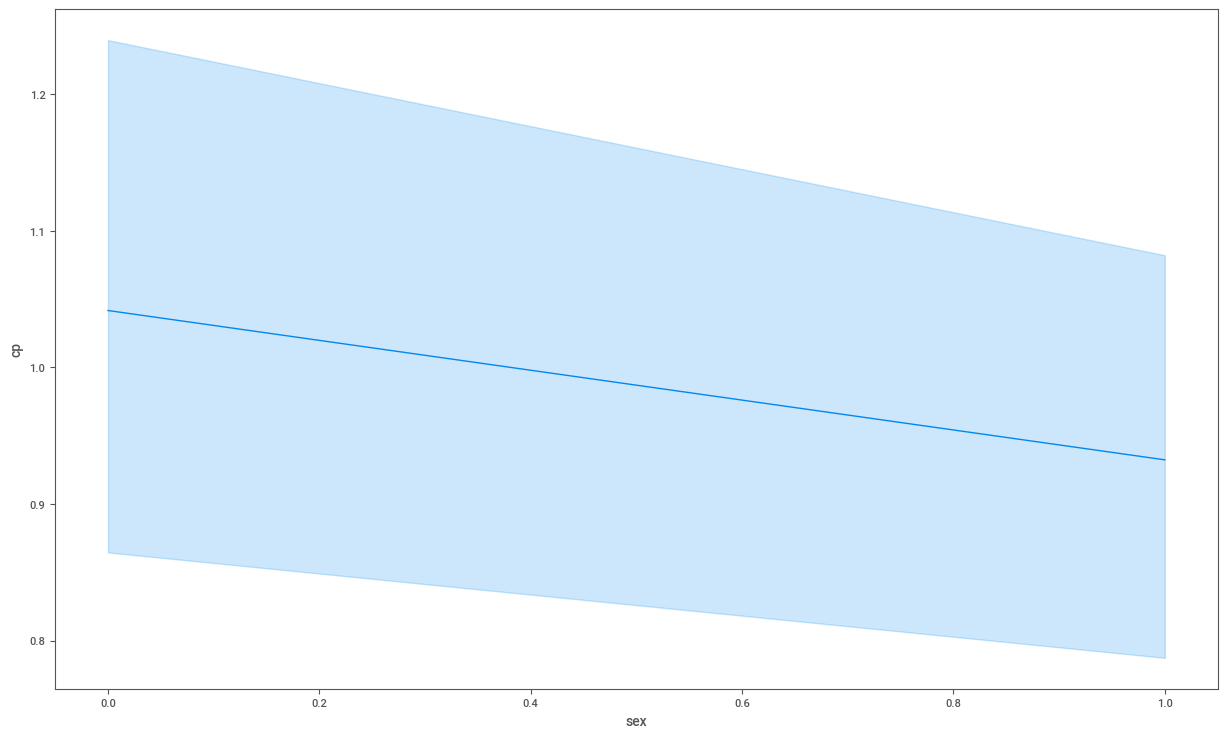

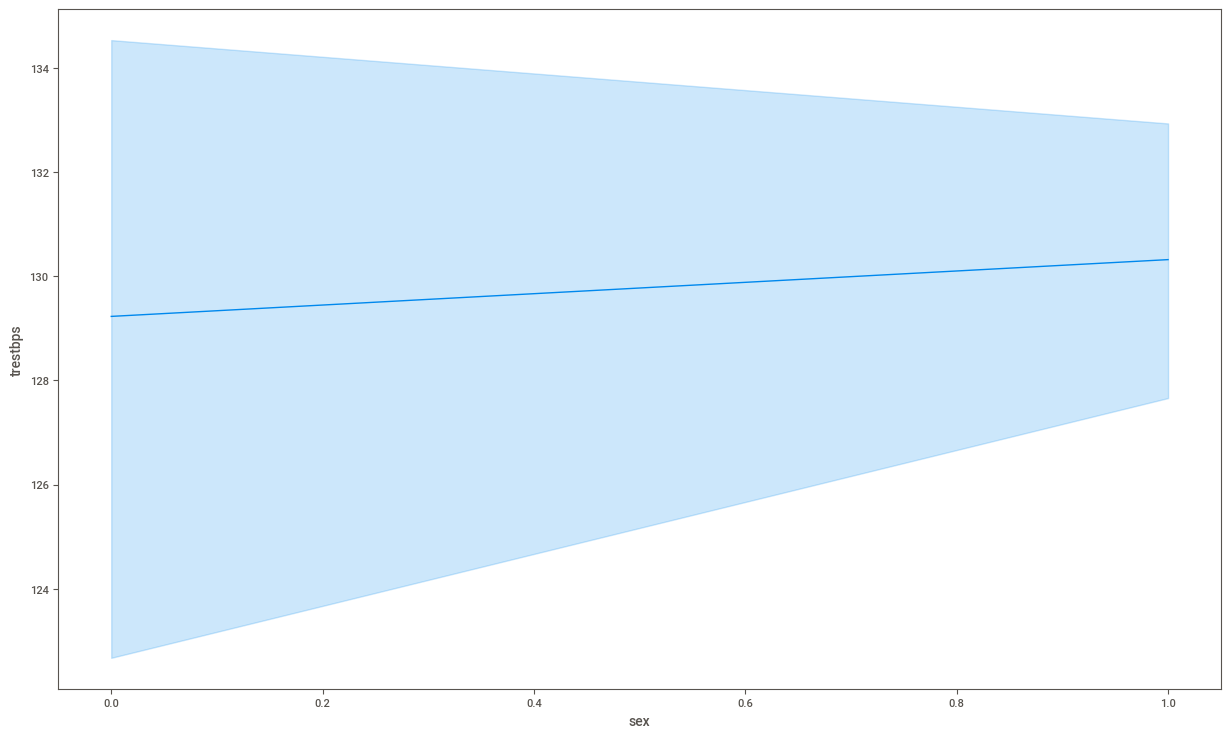

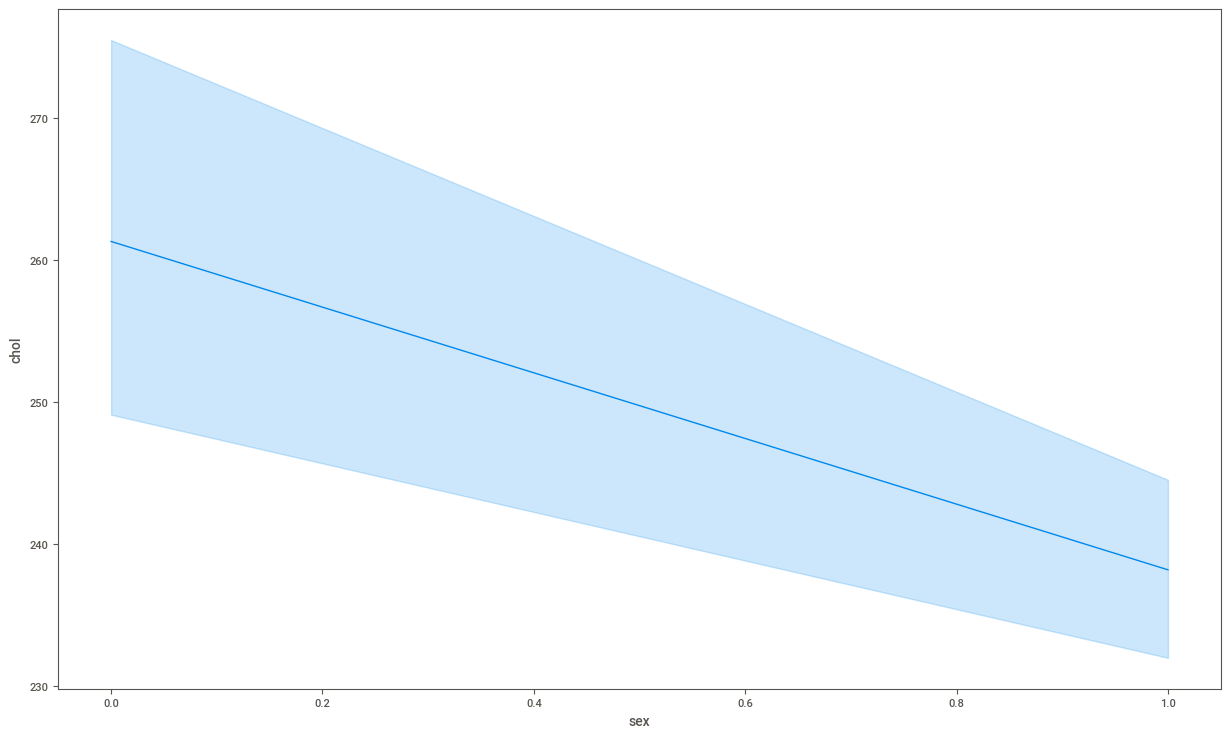

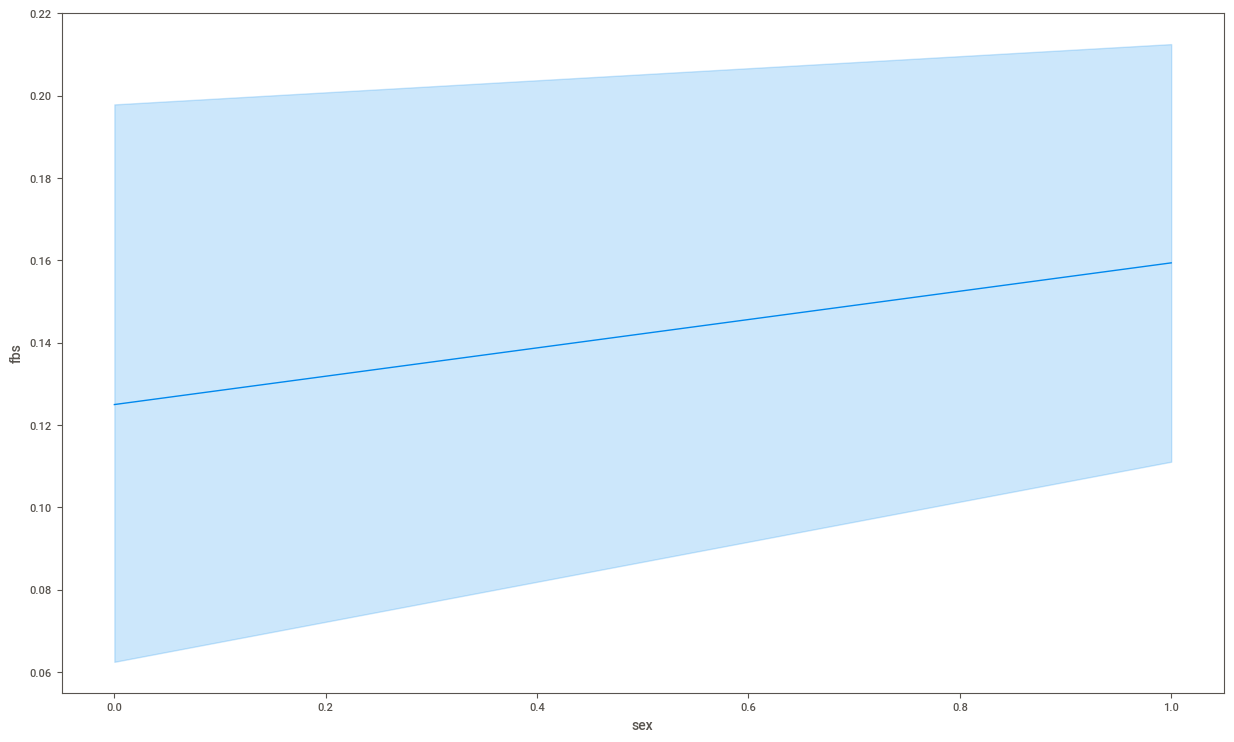

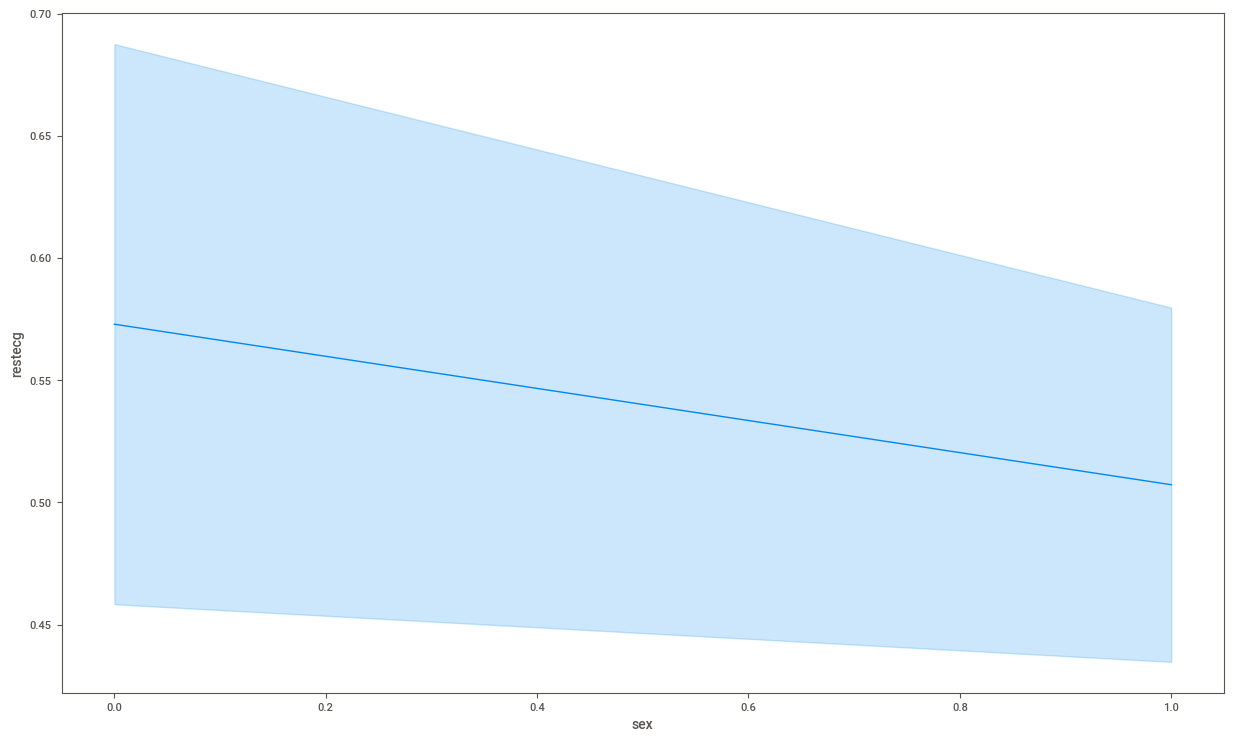

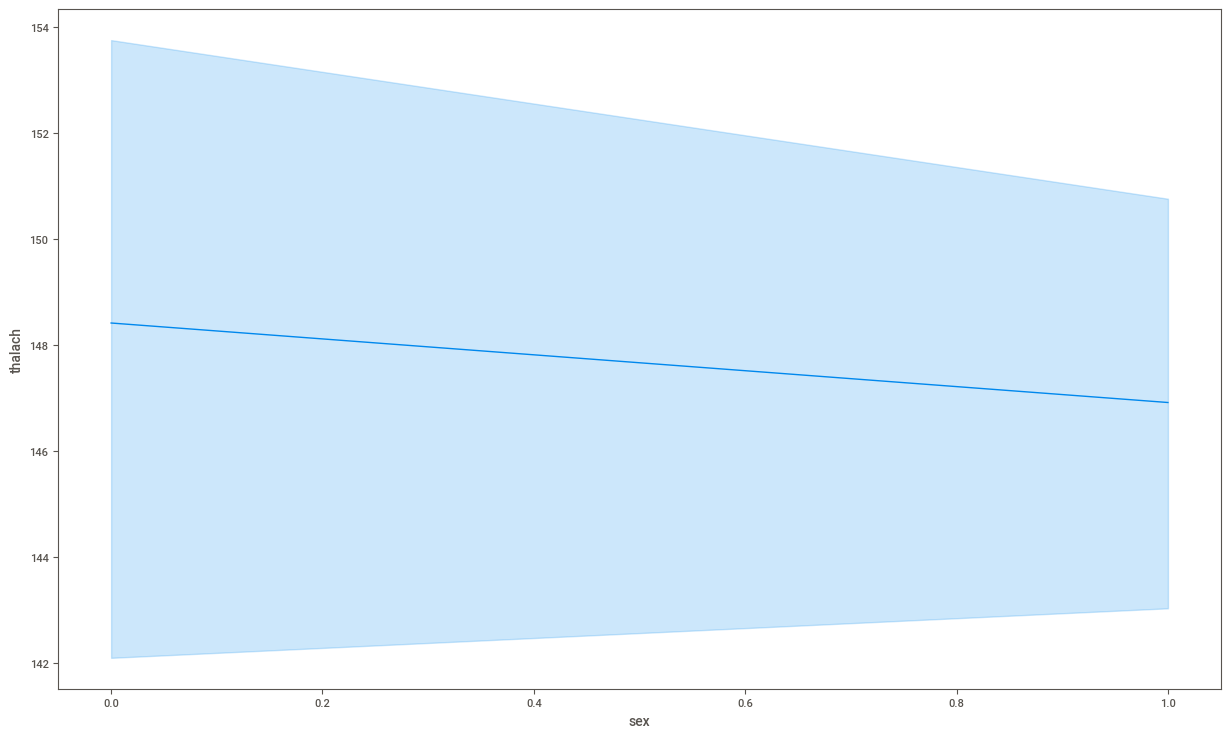

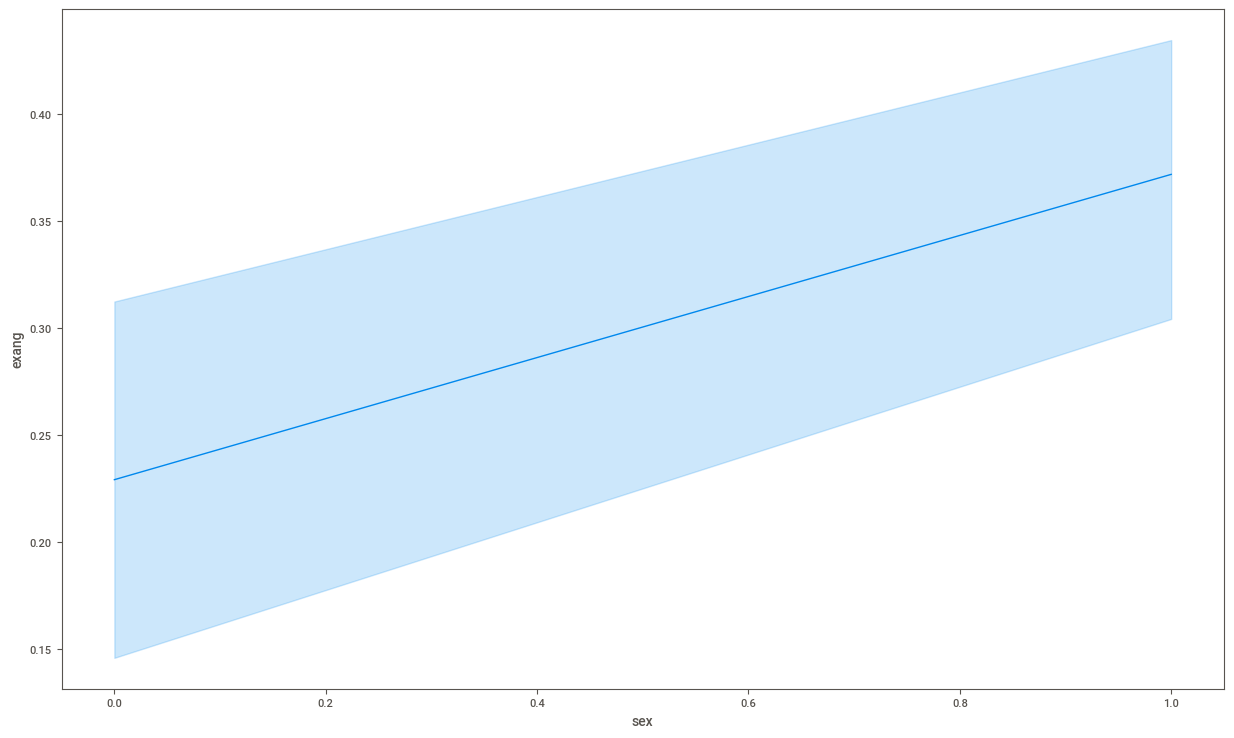

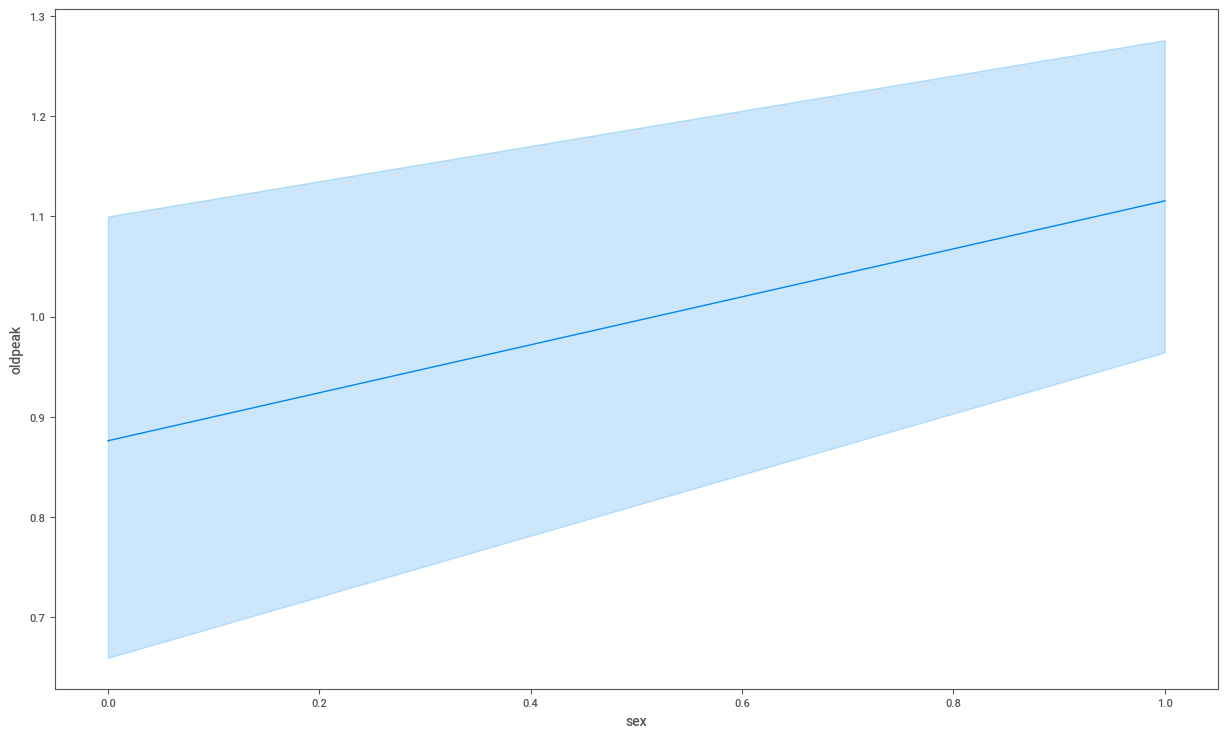

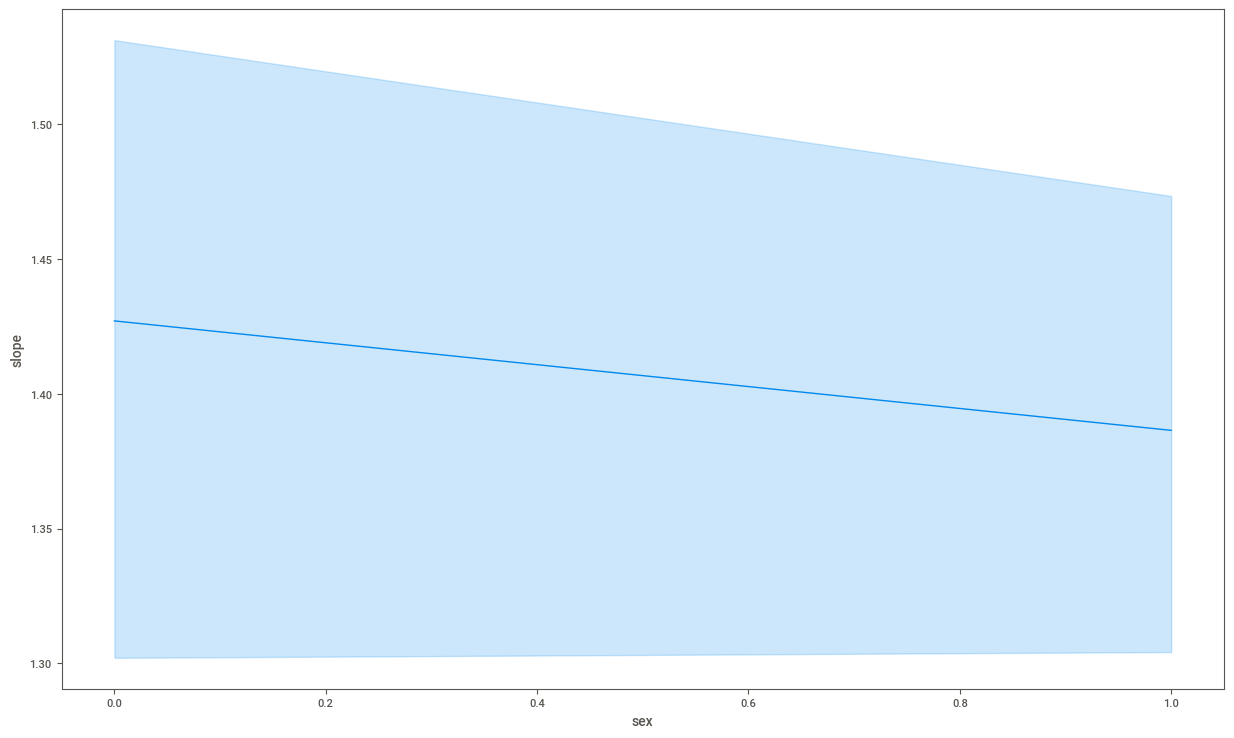

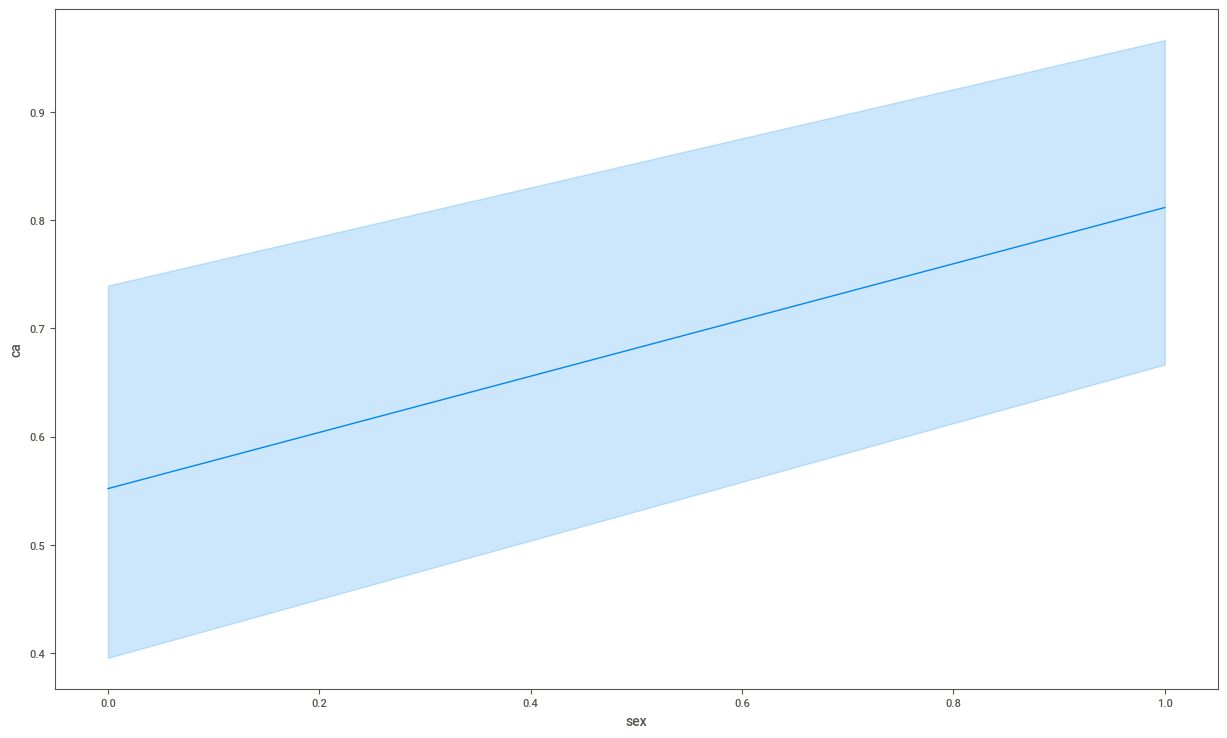

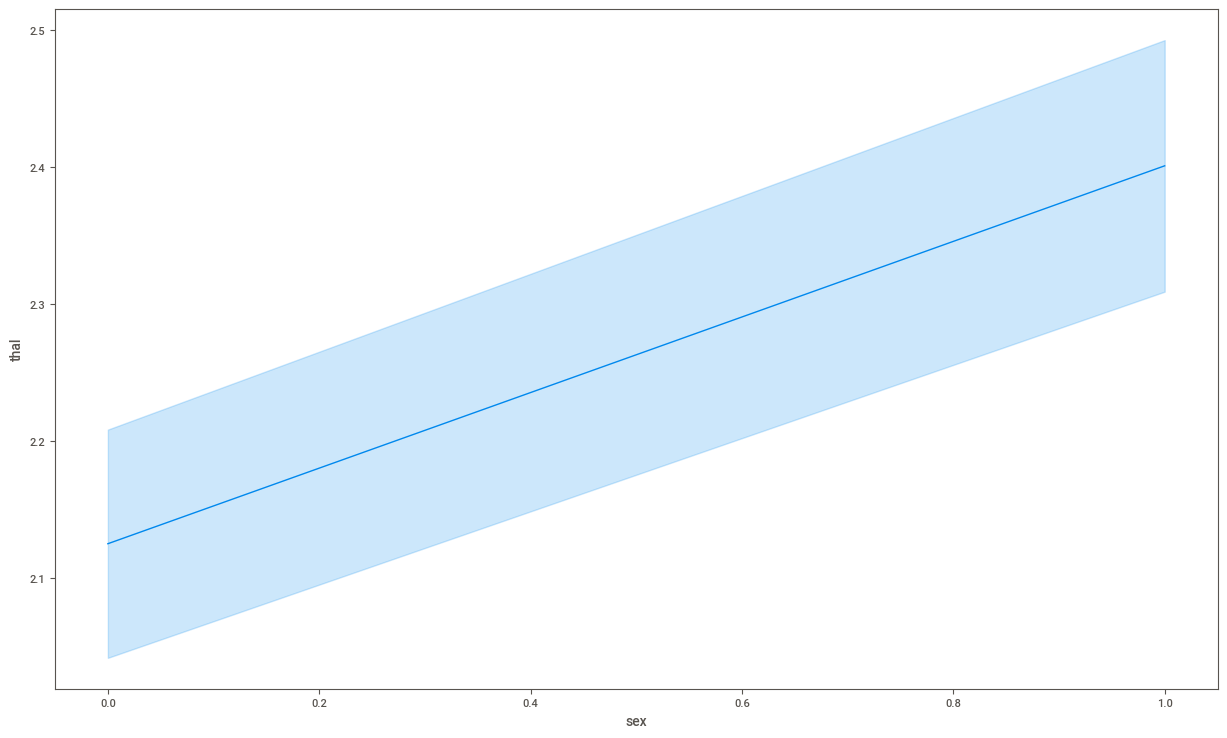

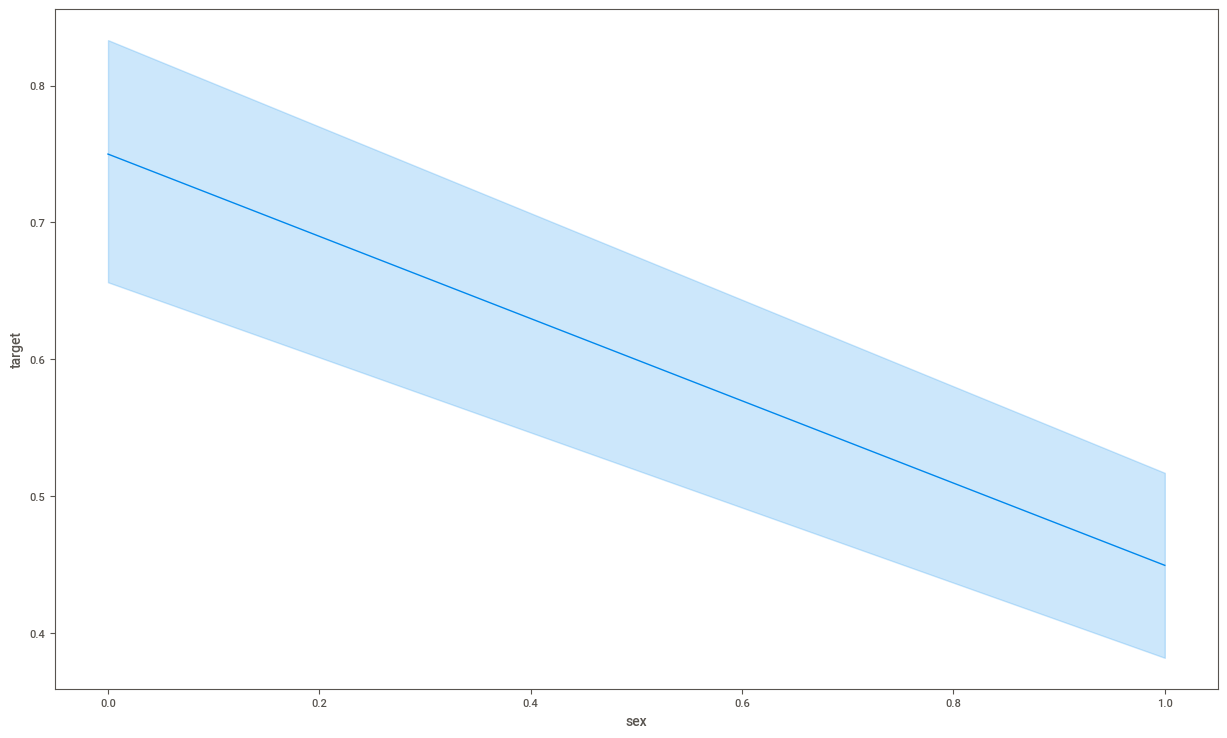

In [127]:
for i in ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']:
    plt.figure(figsize=(15,9))
    sns.lineplot(x=df.sex,y=df[i],data=df,linewidth=1)
    plt.show()

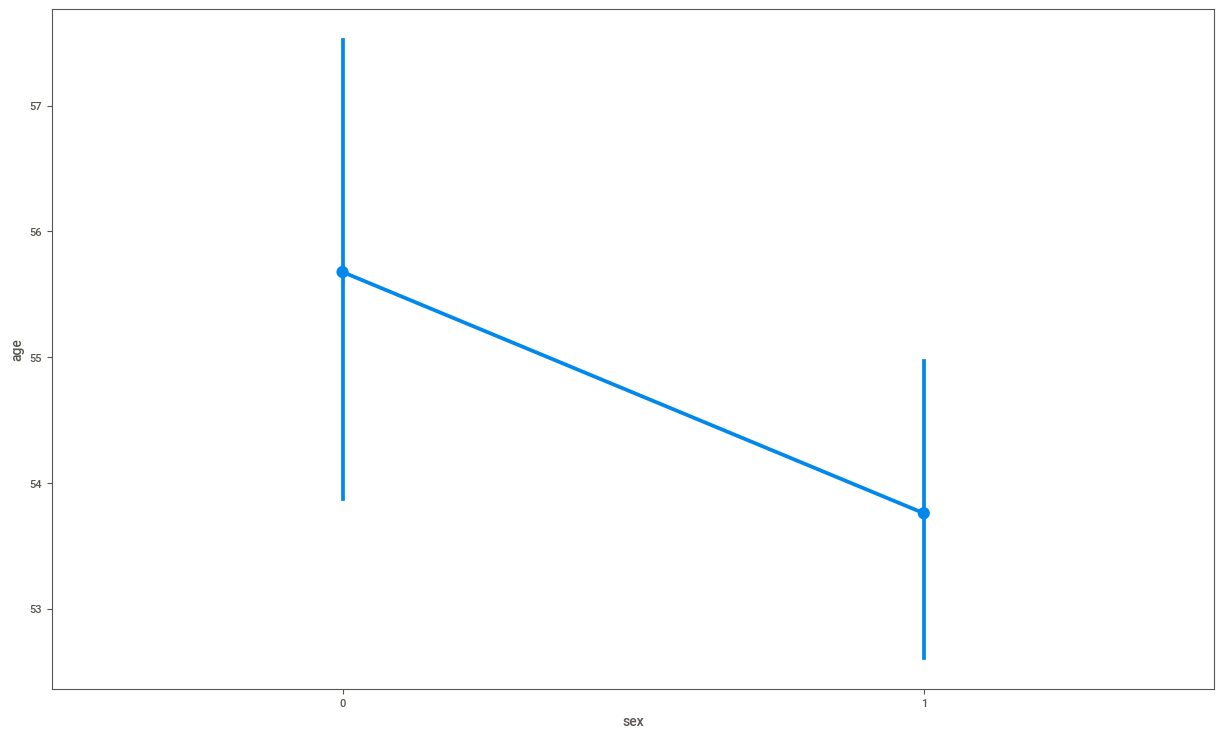

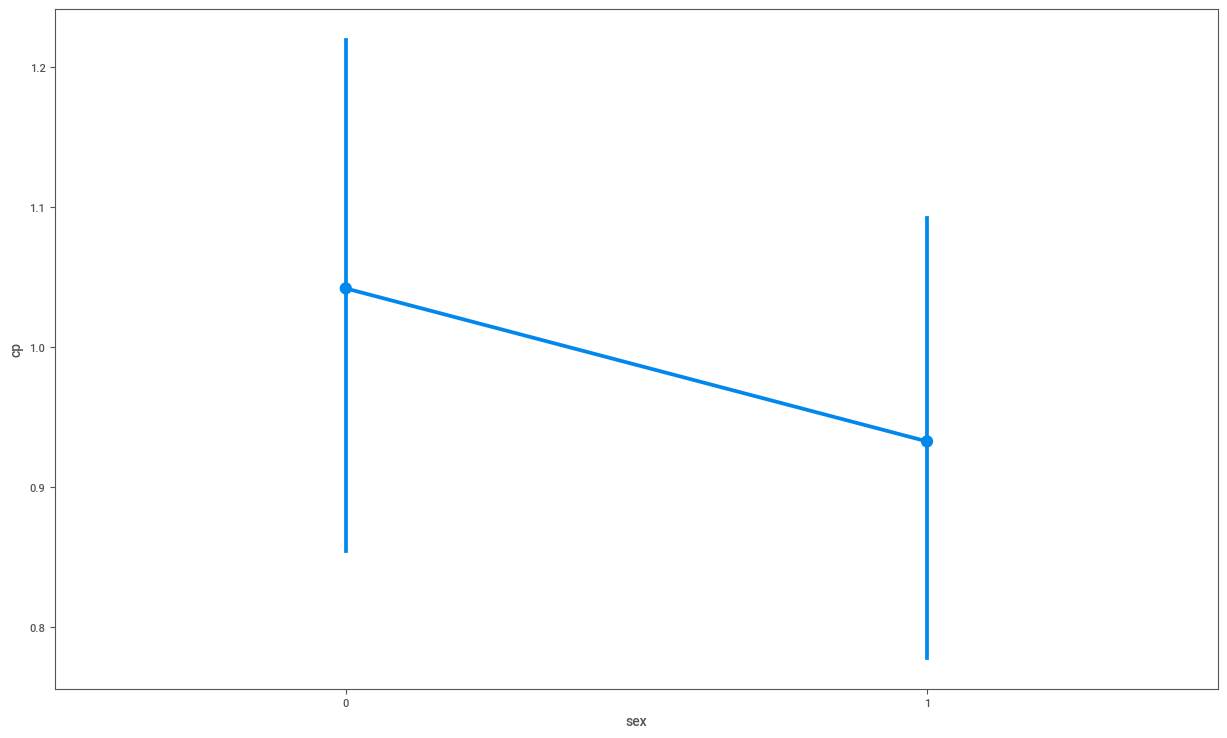

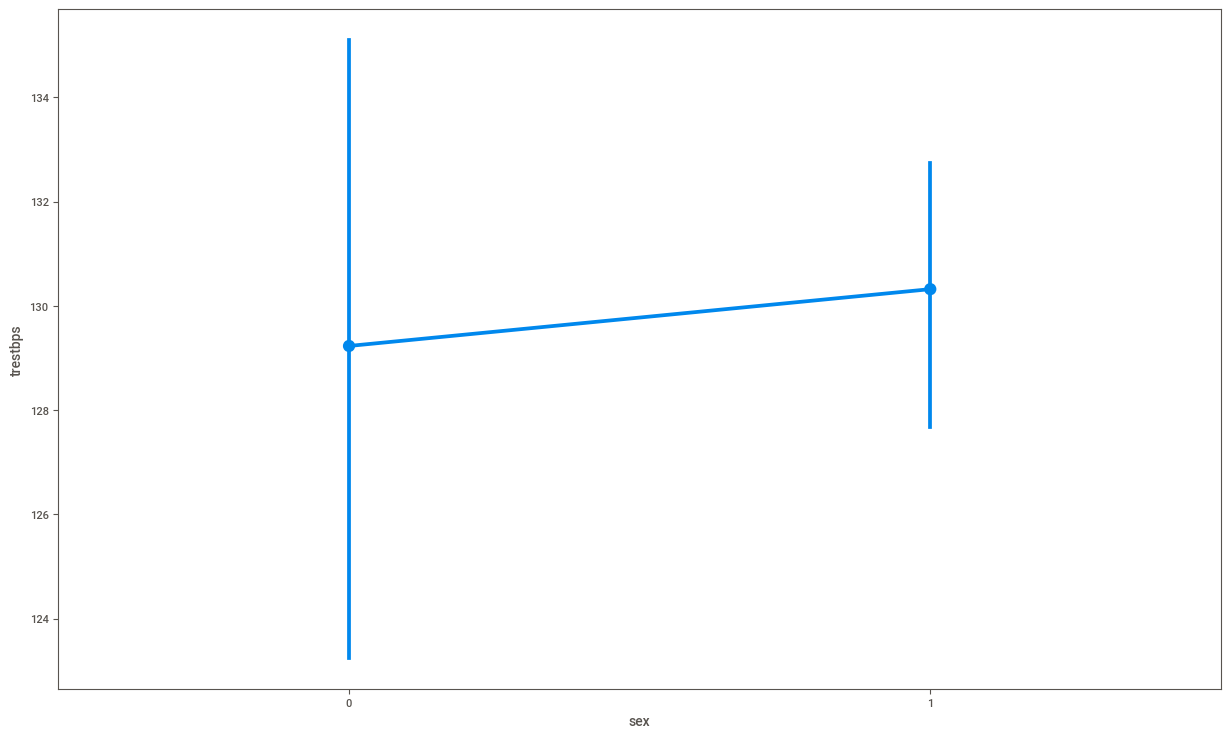

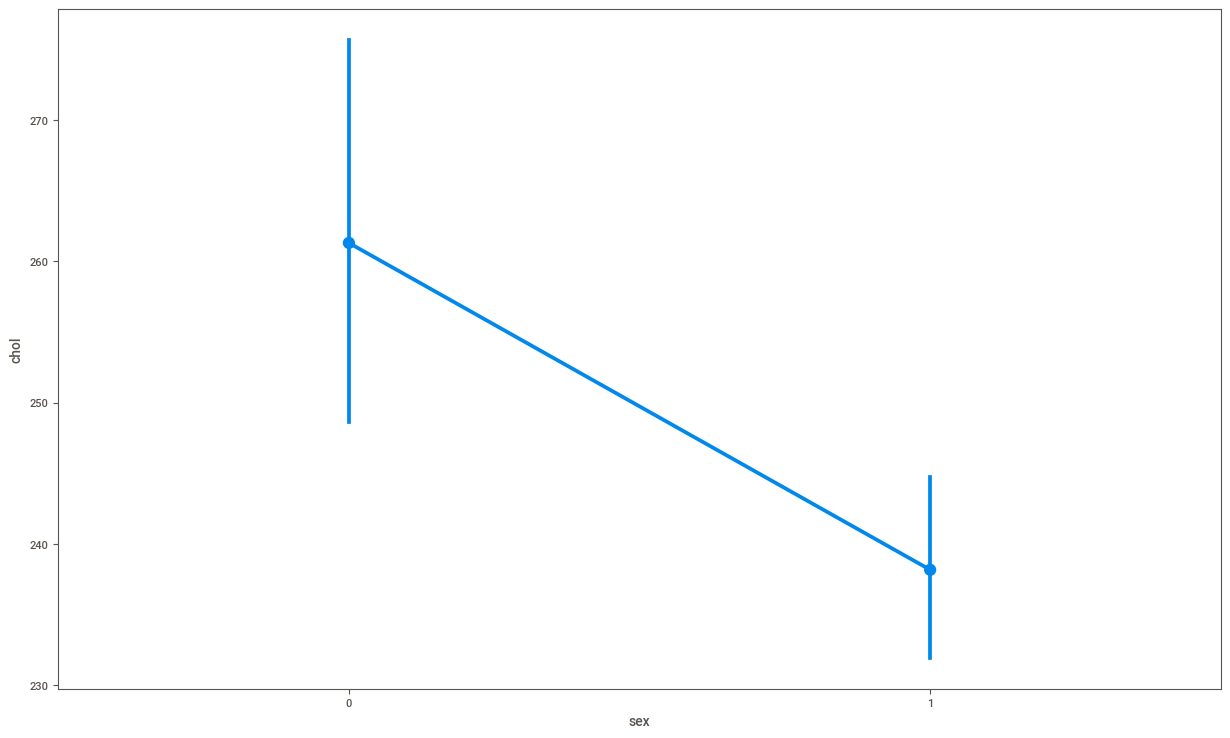

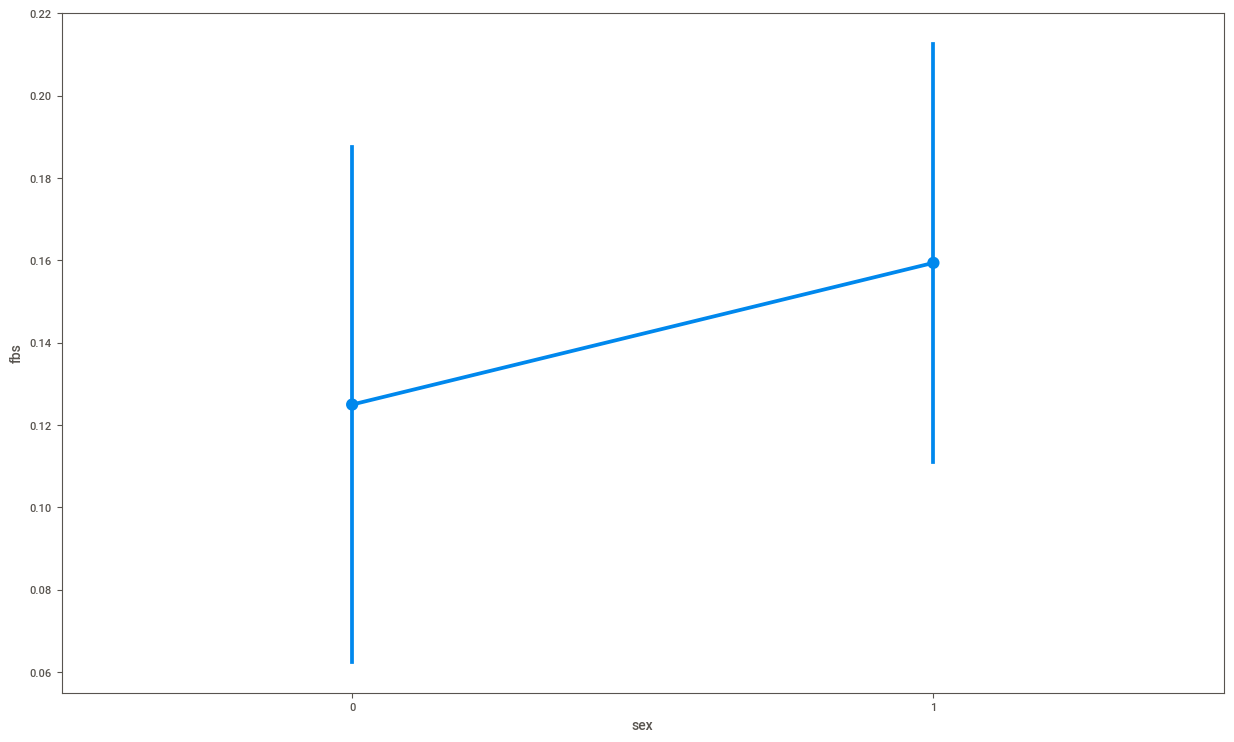

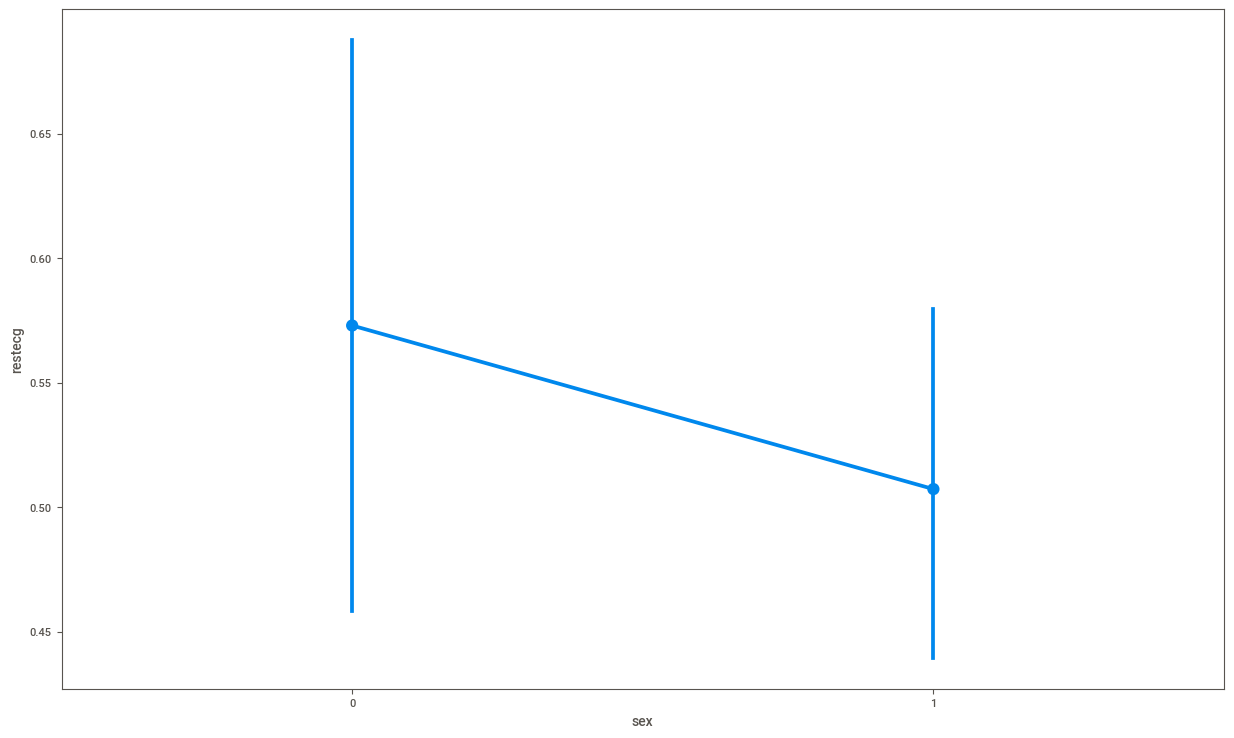

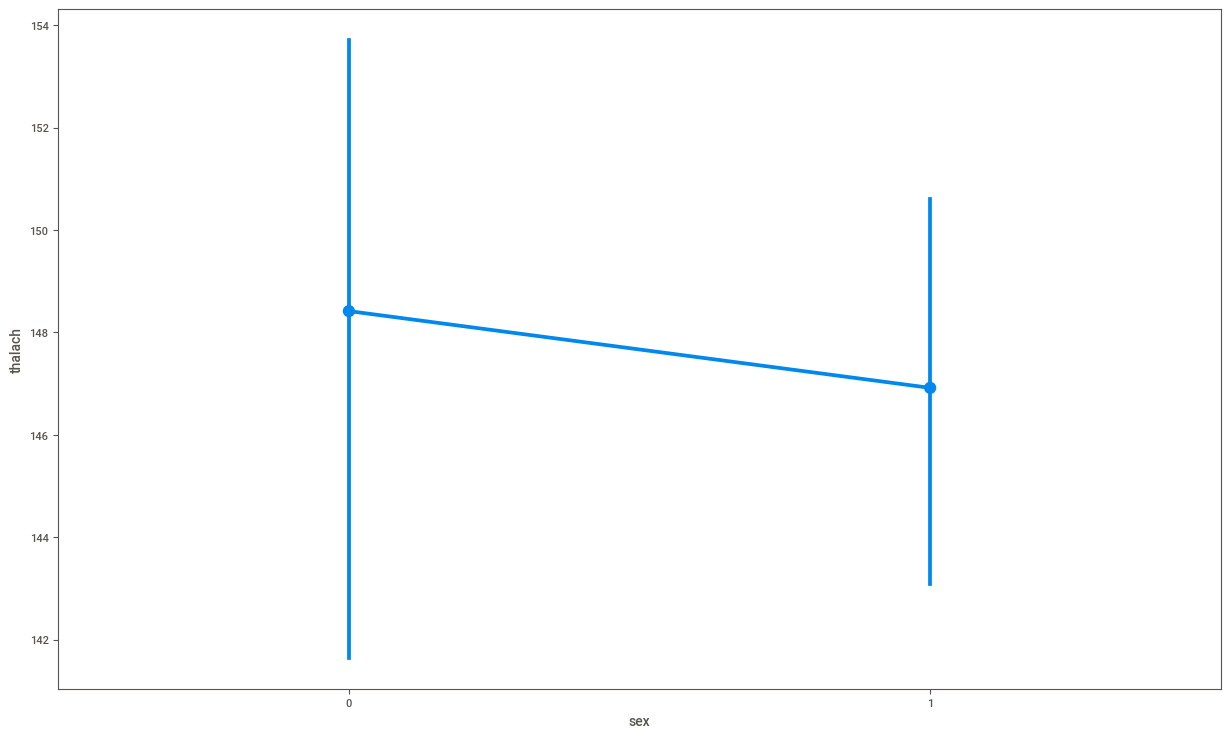

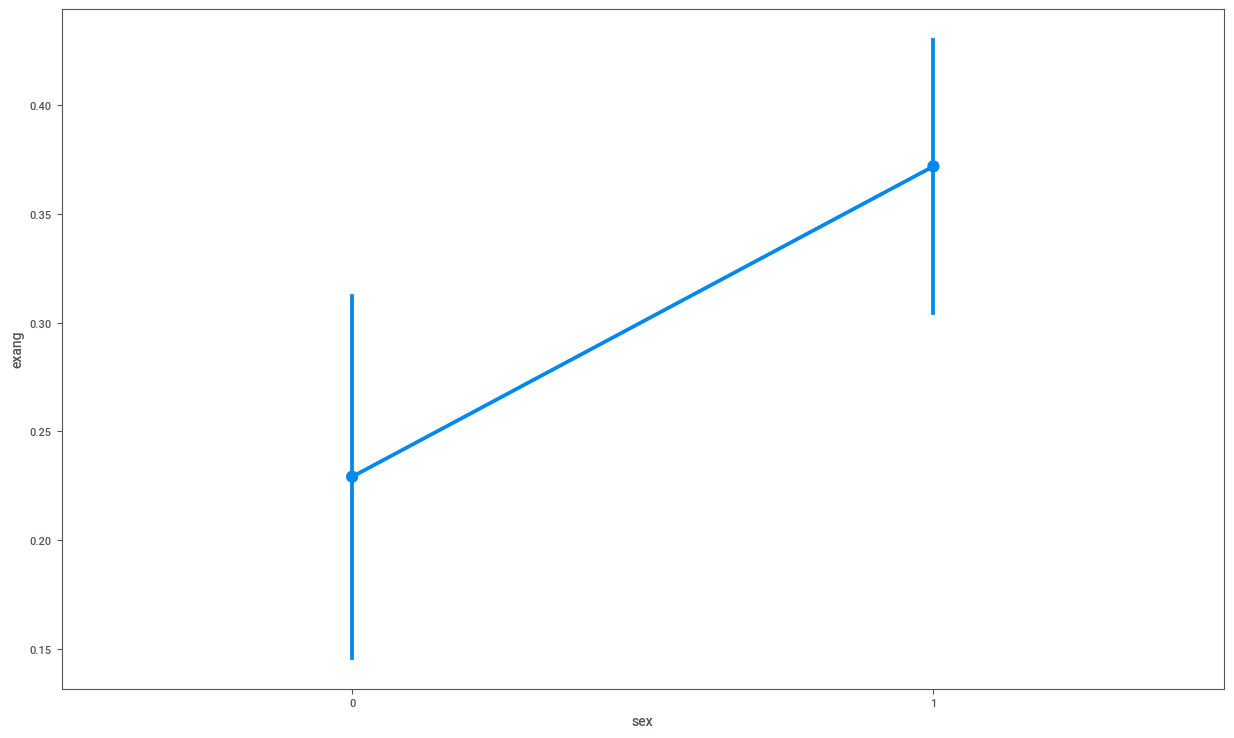

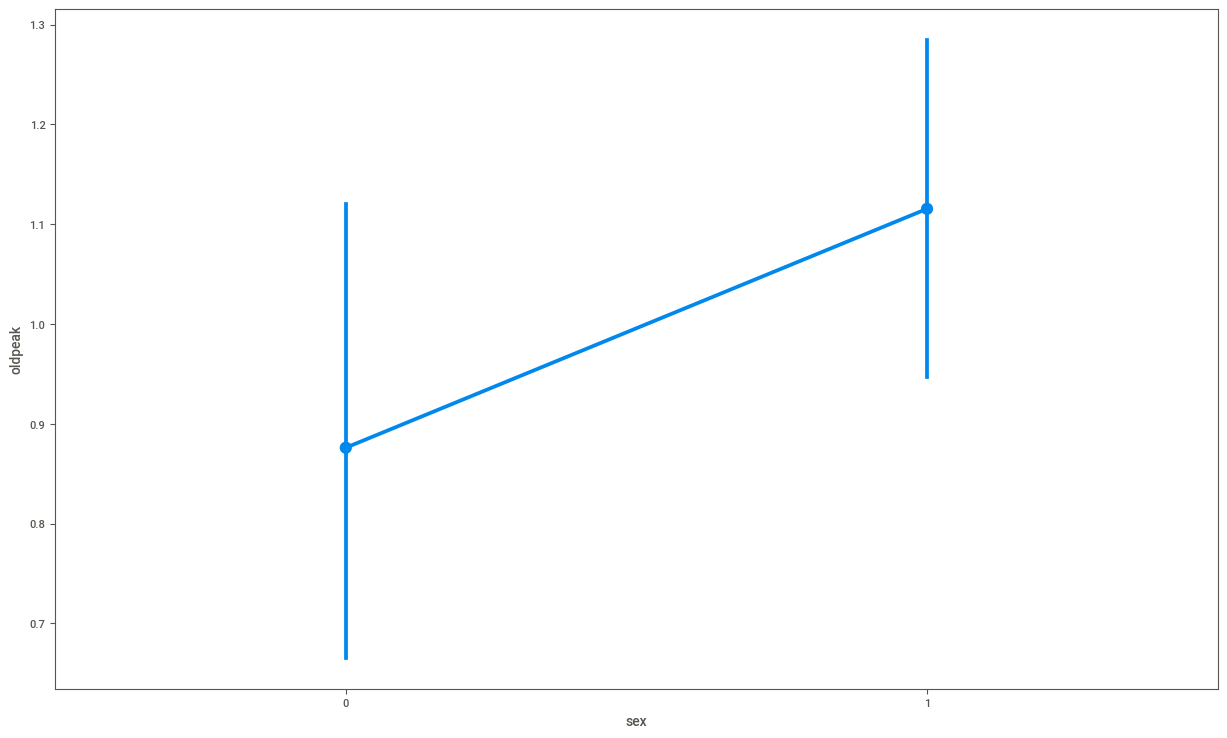

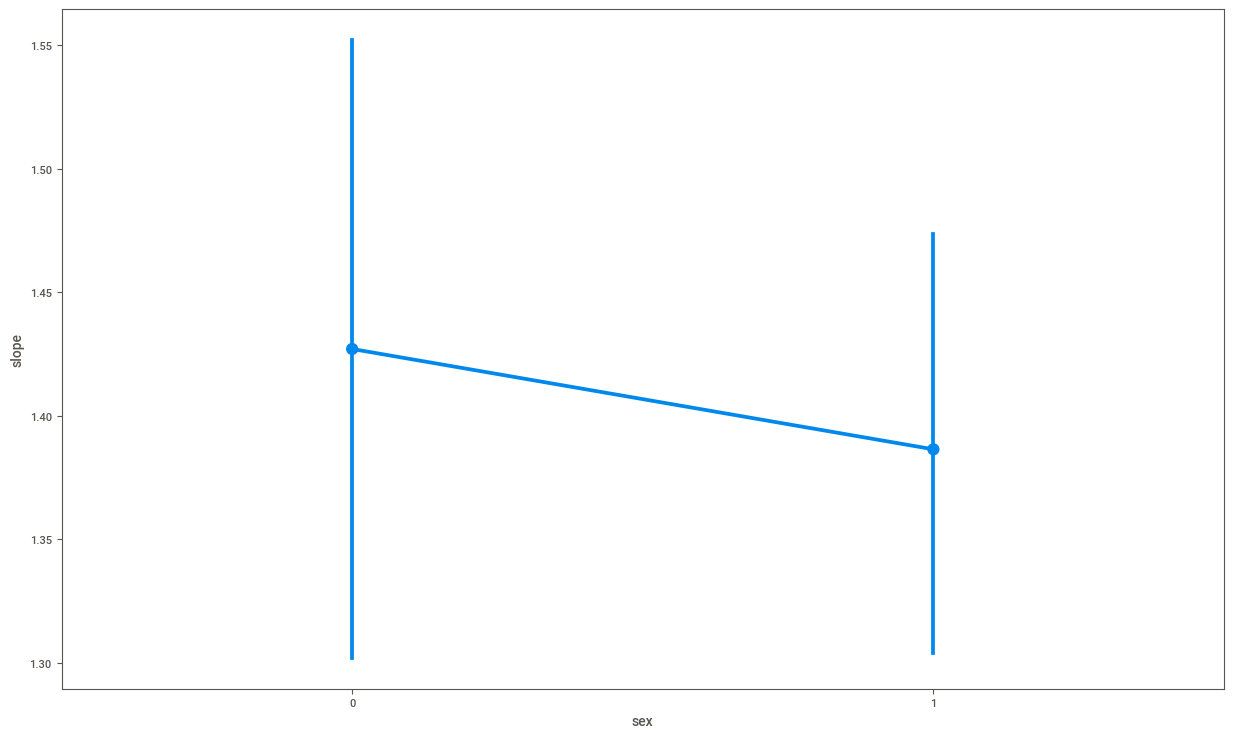

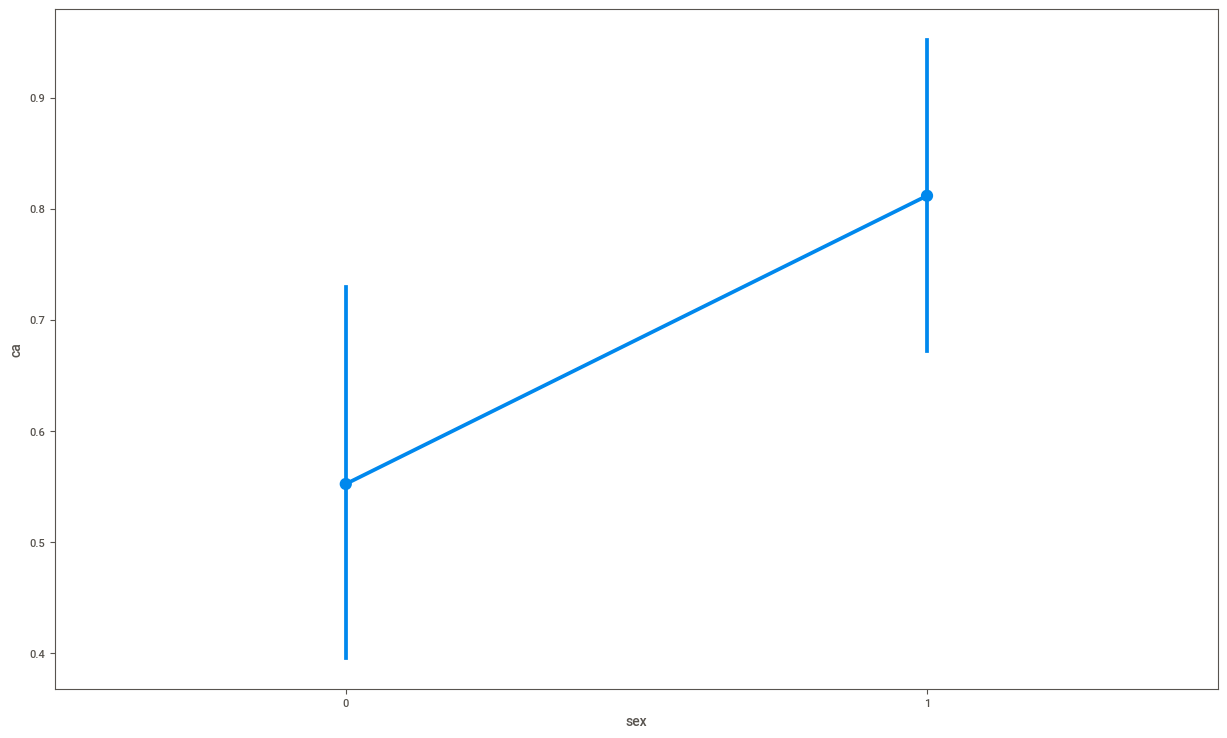

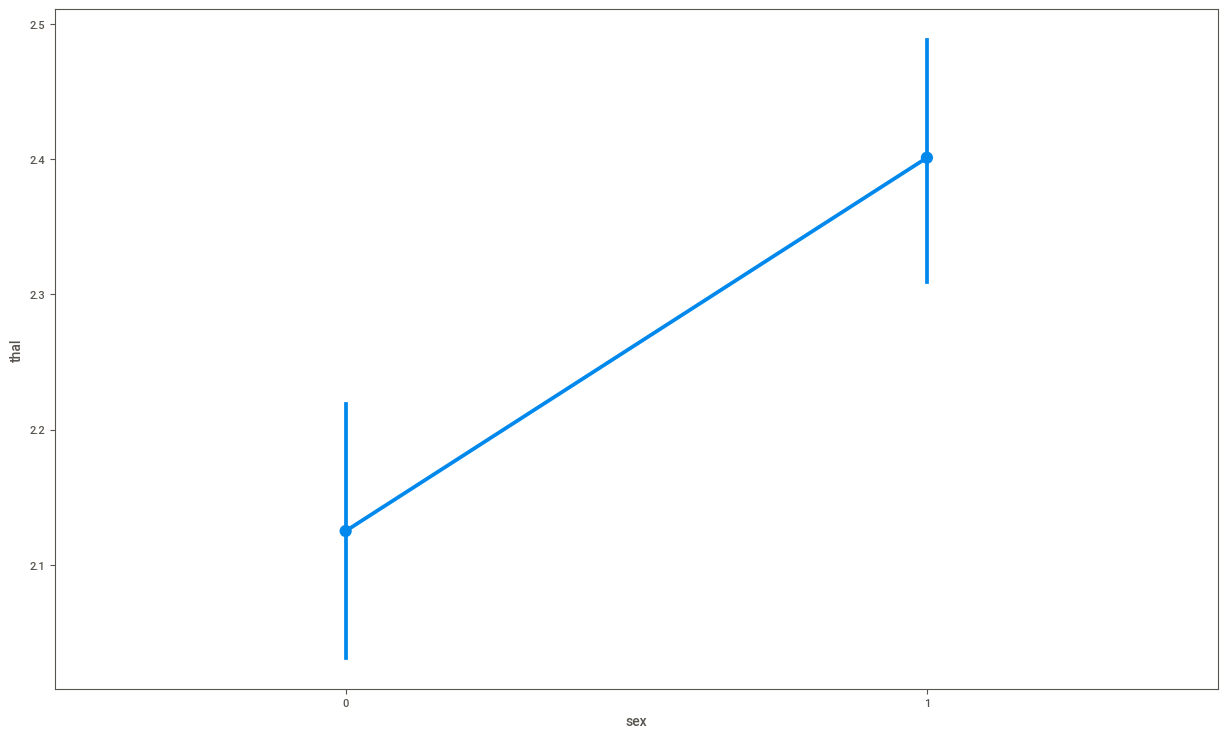

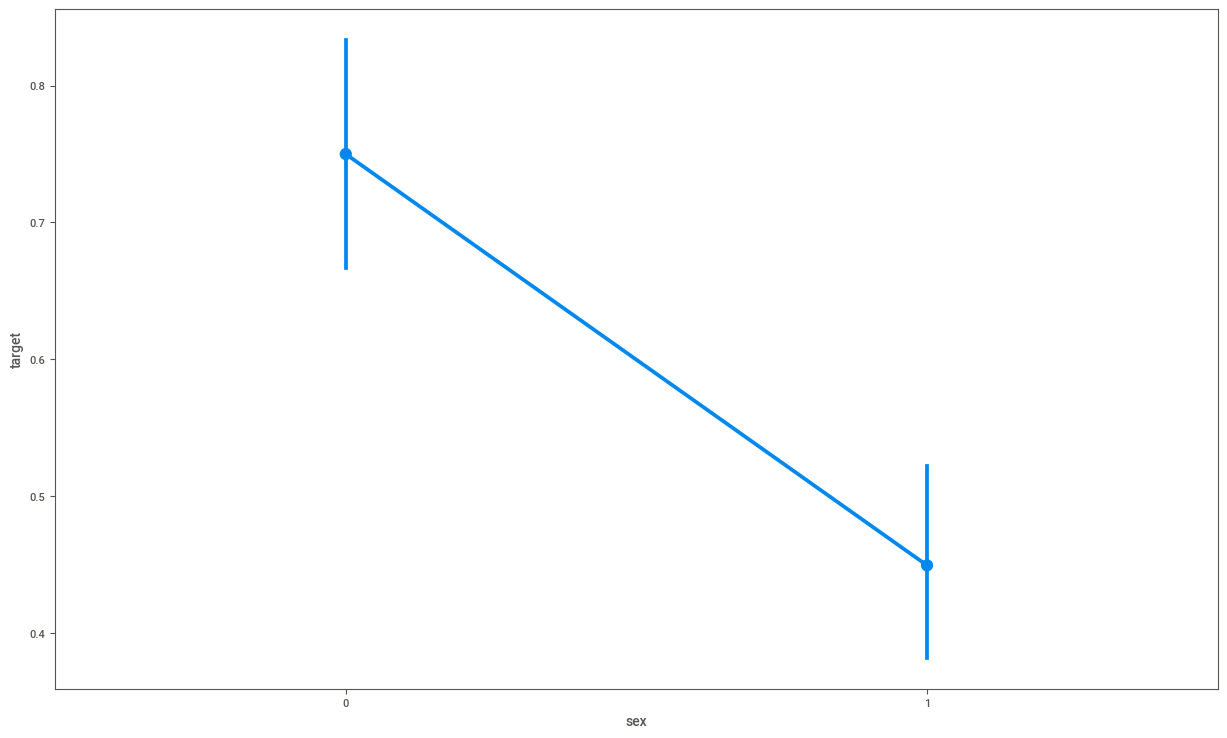

In [128]:
for i in ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']:
    plt.figure(figsize=(15,9))
    sns.pointplot(x=df.sex,y=df[i],data=df,linewidth=1)
    plt.show()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


<Figure size 1500x900 with 0 Axes>

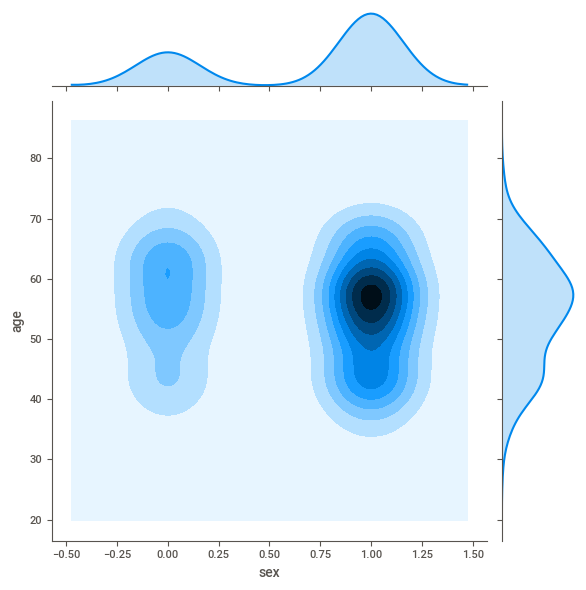

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


<Figure size 1500x900 with 0 Axes>

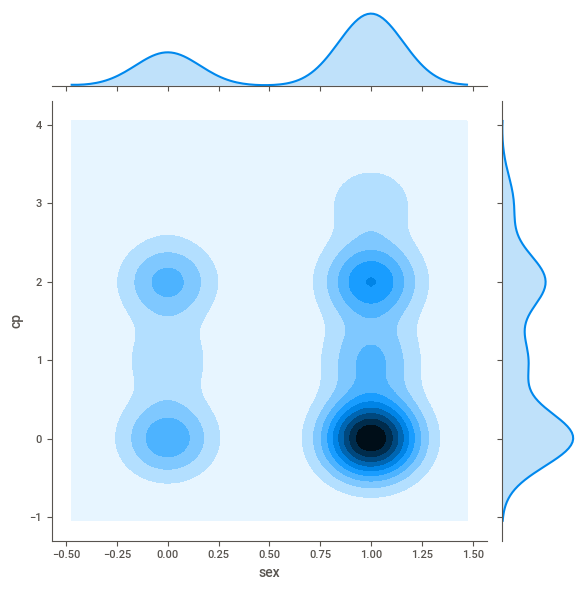

FloatingPointError: underflow encountered in exp

<Figure size 1500x900 with 0 Axes>

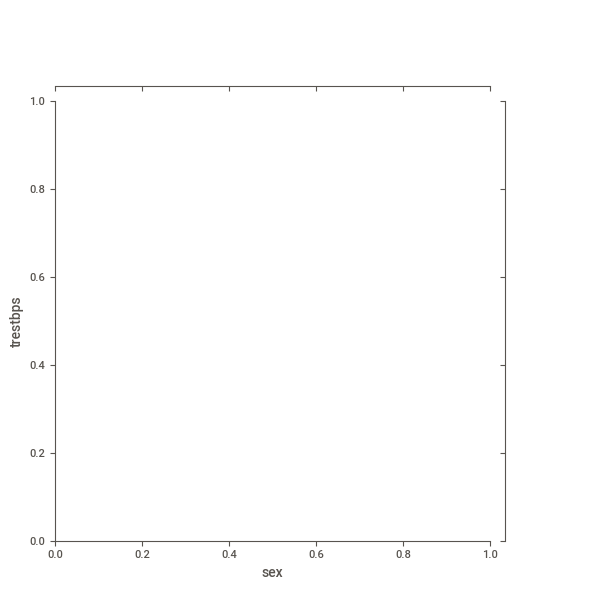

In [129]:
for i in ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']:
    plt.figure(figsize=(15,9))
    sns.jointplot(x=df.sex,y=df[i],data=df,kind='kde',linewidth=1)
    plt.show()

In [131]:
df.head()

age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   63    1   3     145.0  233.0    1        0    150.0      0      2.3   
1   37    1   2     130.0  250.0    0        1    187.0      0      3.5   
2   41    0   1     130.0  204.0    0        0    172.0      0      1.4   
3   56    1   1     120.0  236.0    0        1    178.0      0      0.8   
4   57    0   0       0.0  354.0    0        1    163.0      1      0.6   

   slope  ca  thal  target  
0      0   0     1       1  
1      0   0     2       1  
2      2   0     2       1  
3      2   0     2       1  
4      2   0     2       1